# **Descripción del proyecto: Optimización de gastos de marketing de Showz**

La empresa Showz dedicada a la venta de entradas para eventos requiere optimizar los gastos de marketing.

Se cuenta con:

* Registros del servidor con datos sobre las visitas a Showz desde enero de 2017 hasta diciembre de 2018.
* Un archivo con los pedidos en este periodo.
* Estadísticas de gastos de marketing.


**Tienes que identificar:**

* ¿Cómo los clientes usan el servicio?
* ¿Cuándo empiezan a comprar?
* ¿Cuánto dinero aporta cada cliente a la compañía?
* ¿Cuándo los ingresos cubren el costo de adquisición de los clientes?


## **Diccionario de datos**

Descripción de los datos por dataset:

**1. visits_log_us**, registros del servidor con datos sobre las visitas al sitio web:

* Uid: identificador único del usuario.
* Device: dispositivo del usuario.
* Start Ts: fecha y hora de inicio de la sesión.
* End Ts: fecha y hora de término de la sesión.
* Source Id: identificador de la fuente de anuncios de la que proviene el usuario.

**2. orders**, datos sobre pedidos:

* Uid: identificador único del usuario que realiza un pedido.
* Buy Ts: fecha y hora del pedido. Revenue: el ingreso de Showz por el pedido.

**3. costs**, datos sobre gastos de marketing:

* source_id: identificador de la fuente de anuncios.
* dt: fecha.
* costs: gastos en esta fuente de anuncios en este día.


# **Objetivo**

Crear las estrategias de optimización de los recursos de marketing basados en el análisis del comportamiento de los usuarios, los ingresos y costos históricos.

## **Etapas:**

1.  Revisión y análisis de las bases de datos.
2.  Procesamiento de bases de datos: revisión de estilo snake_case, validación de tipo de datos por dataset, valores duplicados explícitos e intrínsecos, valores ausentes, acciones tomadas para valores ausentes.
3.  Uniones y/o agrupaciones en caso de ser requeridas para los análisis.
4. Análisis general de las bases de datos: gráficos y estadísticas descriptivas.
5. Análisis estadístico: definición de hipótesis, pruebas de probabilidad, recomendaciones estadísticas.
6. Conclusiones

# **Revisión y análisis de las bases de datos.**

## **Carga de librerías**

In [359]:
try:

    import pandas as pd
    import numpy as np
    import seaborn as sns
    from math import factorial
    from scipy import stats as st
    from matplotlib import pyplot as plt
    print('Librerías cargadas correctamente')

except Exception as error:

    print('Error al cargar las librerías:\n\n', error)

Librerías cargadas correctamente


## **Carga de datasets**

In [360]:
# Carga de los datasets

try:

    visits = pd.read_csv('visits_log_us.csv')
    print('Dataframe "visits" cargados correctamente')

    orders = pd.read_csv('orders_log_us.csv')
    print('Dataframe "orders" cargados correctamente')

    costs = pd.read_csv('costs_us.csv')
    print('Dataframe "costs" cargados correctamente')

except:
    print('Error al cargar los datos')

Dataframe "visits" cargados correctamente
Dataframe "orders" cargados correctamente
Dataframe "costs" cargados correctamente


## **Revisión de los datasets**

### **Dataset: visits**

In [361]:
# Info

print('Info DatFrame "visits":')
print()
print(visits.info())

Info DatFrame "visits":

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None


In [362]:
# Muestra de los datos del DataFrame

print('Muestra de los datos del DataFrame "visits":')
print()
print(visits.head(10))

Muestra de los datos del DataFrame "visits":

    Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   
5  desktop  2017-09-03 21:36:00          5  2017-09-03 21:35:00   
6  desktop  2018-01-30 12:09:00          1  2018-01-30 11:13:00   
7    touch  2017-11-05 15:15:00          3  2017-11-05 15:14:00   
8  desktop  2017-07-19 10:44:00          3  2017-07-19 10:41:00   
9  desktop  2017-11-08 13:43:00          5  2017-11-08 13:42:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168  
5  16007536194108375387  
6   6661610529277171451  
7  11423

In [363]:
# Valores únicos del la columna 'device'

print('Valores únicos del DataFrame "visits - device":')
print()
print(visits['Device'].unique())

Valores únicos del DataFrame "visits - device":

['touch' 'desktop']


In [364]:
# Valores ausentes del dataset

print('Valores ausentes del dataset "visits":')
print()
print(visits.isna().sum())

Valores ausentes del dataset "visits":

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64


In [365]:
# Valores dupliados del dataset

print('Valores duplicados del dataset "visits":')
print()
print(visits.duplicated().sum())

Valores duplicados del dataset "visits":

0


**Observaciones del dataset: visits**

* 5 columnas, 359,400 filas
* Los encabezados no están en formato snake_case, se debe aplicar el cambio
* Las columnas ‘End Ts’ y ‘Start Ts’ se encuentran en formato tipo objeto, deben cambiarse por datetime, ya que son datos de fechas.
* No se encuentran valores ausentes.
* No se encuentran valores duplicados.

Se agregaron las siguientes columnas:

* year_visit: año de la visita
* month_visit mes de la visita
* week_visit: semana de la visita
* date_visit: fechas de la visita
* hour_visit: hora de la visita


**Ajustes al dataset: visits**

In [366]:
# Formato snake_case en encabezados de columnas

visits.columns = visits.columns.str.lower()

visits.columns = visits.columns.str.replace(' ', '_')

print('Encabezados de columnas en formato snake_case:')
print()
print(visits.head())

Encabezados de columnas en formato snake_case:

    device               end_ts  source_id             start_ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168  


In [367]:
# Cambio de tipo de datos datetime

visits['end_ts'] = pd.to_datetime(visits['end_ts'])

visits['start_ts'] = pd.to_datetime(visits['start_ts'])

print('Tipo de datos de las columnas "end_ts" y "start_ts":')

print(visits[['end_ts', 'start_ts']].dtypes)

print()

print(visits.info())

Tipo de datos de las columnas "end_ts" y "start_ts":
end_ts      datetime64[ns]
start_ts    datetime64[ns]
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB
None


In [368]:
# Agregar columnas por año, mes, semana, fecha y hora de sesion

visits['year_visit'] = visits['start_ts'].dt.isocalendar().year   # Año

visits['month_visit'] = visits['start_ts'].dt.month  # Mes

visits['week_visit'] = visits['start_ts'].dt.isocalendar().week  # Semana

visits['date_visit'] = visits['start_ts'].dt.date   # Fecha

visits['hour_visit'] = visits['start_ts'].dt.hour # Hora

print('Columnas agregadas al DataFrame "visits":')
print()
print(visits.head())

Columnas agregadas al DataFrame "visits":

    device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid  year_visit  month_visit  week_visit  date_visit  \
0  16879256277535980062        2017           12          51  2017-12-20   
1    104060357244891740        2018            2           8  2018-02-19   
2   7459035603376831527        2017            7          26  2017-07-01   
3  16174680259334210214        2018            5          20  2018-05-20   
4   9969694820036681168        2017           12          52  2017-12-27   

   hour_visit  
0          17  
1          16  
2           1  
3          10  
4          14  


### **Dataset: orders**

In [369]:
# Info

print('Info DatFrame "orders":')
print()
print(orders.info())

Info DatFrame "orders":

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None


In [370]:
# Muestra de los datos del DataFrame

print('Muestra de los datos del DataFrame "orders":')
print()
print(orders.head(10))

Muestra de los datos del DataFrame "orders":

                Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450
5  2017-06-01 08:43:00     0.18  10402394430196413321
6  2017-06-01 08:54:00     1.83  12464626743129688638
7  2017-06-01 09:22:00     1.22   3644482766749211722
8  2017-06-01 09:22:00     3.30  17542070709969841479
9  2017-06-01 09:23:00     0.37   1074355127080856382


In [371]:
# Valores ausentes del dataset

print('Valores ausentes del dataset "orders":')
print()
print(orders.isna().sum())

Valores ausentes del dataset "orders":

Buy Ts     0
Revenue    0
Uid        0
dtype: int64


In [372]:
# Valores dupliados del dataset

print('Valores duplicados del dataset "orders":')
print()
print(orders.duplicated().sum())

Valores duplicados del dataset "orders":

0


In [373]:
# Valores mínimos y máximos de la columna 'revenue'

print('Valores mínimos y máximos de la columna "Revenue":')

print('Valor mínimo:', orders['Revenue'].min())

print('Valor máximo:', orders['Revenue'].max())

Valores mínimos y máximos de la columna "Revenue":
Valor mínimo: 0.0
Valor máximo: 2633.28


**Observaciones del dataset: orders**

* 3 columnas, 50,415 filas
* Los encabezados no están en formato snake_case, se debe aplicar el cambio
* La columna ‘Buy Ts’ se encuentra en formato tipo objeto, deben cambiarse por datetime, ya que son datos de fechas.
* No se encuentran valores ausentes.
* No se encuentran valores duplicados. 
* Existen valores $0 en la columna revenue, pero no se eliminan ya que pueden ser pedidos cancelados, se definirá en cada calculo posterior que hacer con ellos según sea el caso.

Se agregaron las siguientes columnas:

* order_visit: año de la orden
* order_visit mes de la orden
* order_visit: semana de la orden
* order_visit: fechas de la orden
* order_visit: hora de la orden

**Ajustes al dataset: orders**

In [374]:
# Formato snake_case en encabezados de columnas

orders.columns = orders.columns.str.lower()

orders.columns = orders.columns.str.replace(' ', '_')

print('Encabezados de columnas en formato snake_case:')

print(orders.head())


Encabezados de columnas en formato snake_case:
                buy_ts  revenue                   uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450


In [375]:
# Cambio de tipo de datos datetime

orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])

print('Tipo de datos de la columna "buy_ts":')
print(orders['buy_ts'].dtypes)
print()
print(orders.info())

Tipo de datos de la columna "buy_ts":
datetime64[ns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
None


In [376]:
# Agregar columnas por año, mes, semana, fecha y hora de sesion

orders['year_order'] = orders['buy_ts'].dt.isocalendar().year   # Año

orders['month_order'] = orders['buy_ts'].dt.month  # Mes

orders['week_order'] = orders['buy_ts'].dt.isocalendar().week  # Semana

orders['date_order'] = orders['buy_ts'].dt.date   # Fecha

orders['hour_order'] = orders['buy_ts'].dt.hour  # Hora

orders['date_order'] = pd.to_datetime(orders['date_order'])

print('Columnas agregadas al DataFrame "orders":')
print()
print(orders.head())
print()
print(orders.info())

Columnas agregadas al DataFrame "orders":

               buy_ts  revenue                   uid  year_order  month_order  \
0 2017-06-01 00:10:00    17.00  10329302124590727494        2017            6   
1 2017-06-01 00:25:00     0.55  11627257723692907447        2017            6   
2 2017-06-01 00:27:00     0.37  17903680561304213844        2017            6   
3 2017-06-01 00:29:00     0.55  16109239769442553005        2017            6   
4 2017-06-01 07:58:00     0.37  14200605875248379450        2017            6   

   week_order date_order  hour_order  
0          22 2017-06-01           0  
1          22 2017-06-01           0  
2          22 2017-06-01           0  
3          22 2017-06-01           0  
4          22 2017-06-01           7  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   buy_ts       50415 non-n

### **Dataset: costs**

In [377]:
# Info

print('Info DatFrame "costs":')
print()
print(costs.info())

Info DatFrame "costs":

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None


In [378]:
# Muestra de los datos del DataFrame

print('Muestra de los datos del DataFrame "costs":')
print()
print(costs.head(10))

Muestra de los datos del DataFrame "costs":

   source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08
5          1  2017-06-06  40.39
6          1  2017-06-07  40.59
7          1  2017-06-08  56.63
8          1  2017-06-09  40.16
9          1  2017-06-10  43.24


In [379]:
# Valores ausentes del dataset

print('Valores ausentes del dataset "costs":')
print()
print(costs.isna().sum())

Valores ausentes del dataset "costs":

source_id    0
dt           0
costs        0
dtype: int64


In [380]:
# Valores dupliados del dataset

print('Valores duplicados del dataset "costs":')
print()
print(costs.duplicated().sum())

Valores duplicados del dataset "costs":

0


**Observaciones del dataset: costs**

* 3 columnas, 2,542 filas.
* Los encabezados están en formato snake_case.
* La columna ‘dt’ se encuentra en formato tipo objeto, deben cambiarse por date, ya que son datos de fechas.
* Se cambia el nombre de la columna ‘dt’ por ‘costs_date’ para hacerla más claro su entendimiento.
* No se encuentran valores ausentes.
* No se encuentran valores duplicados. 

**Ajustes al dataset: costs**

In [381]:
# Cambio de tipo de datos date

costs['dt'] = pd.to_datetime(costs['dt'])

print('Tipo de datos de la columna "dt":')
print(costs['dt'].dtypes)
print()
print(costs.info())
print()
print(costs.head())

Tipo de datos de la columna "dt":
datetime64[ns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB
None

   source_id         dt  costs
0          1 2017-06-01  75.20
1          1 2017-06-02  62.25
2          1 2017-06-03  36.53
3          1 2017-06-04  55.00
4          1 2017-06-05  57.08


In [382]:
# Cambio de nombre de columna 'dt' por 'costs_date'

costs.rename(columns={'dt': 'costs_date'}, inplace=True)

print(costs.head())

   source_id costs_date  costs
0          1 2017-06-01  75.20
1          1 2017-06-02  62.25
2          1 2017-06-03  36.53
3          1 2017-06-04  55.00
4          1 2017-06-05  57.08


# **Análisis de las bases de datos: gráficos y estadísticas descriptivas.**

## **Análisis: visits**

#### **Visitas totales y por device**

Visitas totales: 359400

Visitas totales:          device
device         
desktop  262567
touch     96833


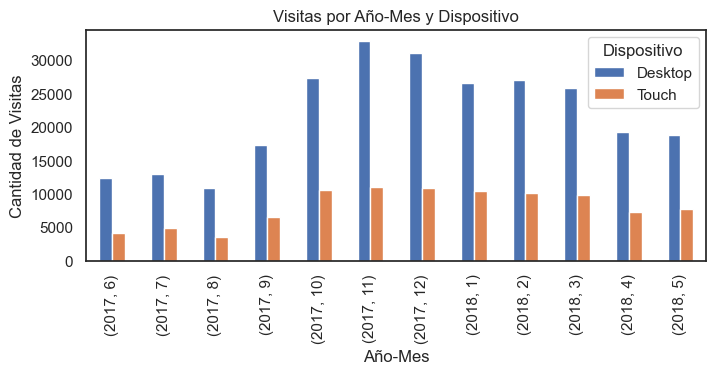

In [383]:
# Gráficas por mes del 'device' usado para la sesión

visits_device = visits.groupby(['year_visit','month_visit', 'device']).agg({
    'device': 'count'}).unstack()

ax = visits_device.plot(kind='bar', figsize=(8, 3))

plt.title('Visitas por Año-Mes y Dispositivo')
plt.xlabel('Año-Mes')
plt.ylabel('Cantidad de Visitas')
plt.xticks(rotation=90)
plt.legend(['Desktop', 'Touch'], title='Dispositivo')

# Visitas totales y por dispositivo

visits_total = visits['device'].count()

print('Visitas totales:', visits_total)
print()

visits_total_device = visits.groupby('device').agg({'device': 'count'})

print('Visitas totales:', visits_total_device)

#### **Visitas por source_id**

Ranking de fuentes de origen de visitas acumuladas:
           source_count
source_id              
4                101794
3                 85610
5                 66905
2                 47626
1                 34121
9                 13277
10                10025
7                    36
6                     6


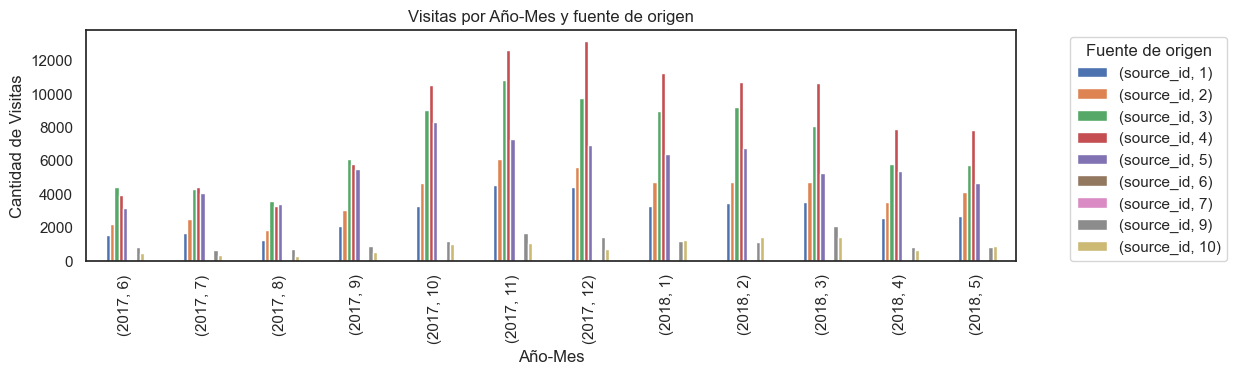

In [384]:
# Gráficas por mes de 'source_id' para identificar la fuente origen de la visita

visits_source = visits.groupby(['year_visit', 'month_visit', 'source_id']).agg({
    'source_id': 'count'}).unstack()

ax = visits_source.plot(kind='bar', figsize=(12, 3))

plt.title('Visitas por Año-Mes y fuente de origen')
plt.xlabel('Año-Mes')
plt.ylabel('Cantidad de Visitas')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1),
           loc='upper left', title='Fuente de origen')

# Ranking de fuentes de origen acumuladas

visits_source_rank = visits.groupby('source_id').agg({'source_id': 'count'})

visits_source_rank.columns = ['source_count']

print('Ranking de fuentes de origen de visitas acumuladas:')

print(visits_source_rank.sort_values(by='source_count', ascending=False))


#### **Usuarios activos**

In [385]:
# MAU (Monthly Active Users)

mau_visits = round(visits.groupby(['year_visit', 'month_visit']).agg({'uid': 'nunique'}).mean(),0)

print('MAU (Monthly Active Users):', mau_visits)
print()

# WAU (Monthly Active Users)

wau_visits = round(visits.groupby(
    ['year_visit', 'week_visit']).agg({'uid': 'nunique'}).mean(), 0)

print('WAU (Weekly Active Users):', wau_visits)
print()

# DAU (Daily Active Users)

dau_visits = round(visits.groupby('date_visit').agg({'uid': 'nunique'}).mean(), 0)

print('DAU (Daily Active Users):', wau_visits)
print()

# Sticky Factor (Factor de adherencia)

sticky_mau = round(dau_visits / mau_visits * 100,2)

print('Sticky Factor Mensual (Factor de adherencia %):', sticky_mau)

sticky_wau = round(dau_visits / wau_visits * 100, 2)

print('Sticky Factor Semanal (Factor de adherencia %):', sticky_wau)

MAU (Monthly Active Users): uid    23228.0
dtype: float64

WAU (Weekly Active Users): uid    5716.0
dtype: float64

DAU (Daily Active Users): uid    5716.0
dtype: float64

Sticky Factor Mensual (Factor de adherencia %): uid    3.91
dtype: float64
Sticky Factor Semanal (Factor de adherencia %): uid    15.89
dtype: float64


#### **Visitas por día**

In [386]:
# Visitas por día

visitas_diarias = visits.groupby('date_visit').agg({'uid': 'count'})

print('Sesiones por día:')
print()
print(visitas_diarias)
print()

# Visitas promedio por dia

visitas_prom_diarias = round(visitas_diarias['uid'].mean(), 0)

print('Sesiones promedio por día:', visitas_prom_diarias)
print()

# Top 10 días con mayor cantidad de visitas

top_10_dias = visitas_diarias.sort_values(by='uid', ascending=False).head(10)

print('Top 10 días con mayor cantidad de sesiones:')
print()
print(top_10_dias)

Sesiones por día:

             uid
date_visit      
2017-06-01   664
2017-06-02   658
2017-06-03   477
2017-06-04   510
2017-06-05   893
...          ...
2018-05-27   672
2018-05-28  1156
2018-05-29  1035
2018-05-30  1410
2018-05-31  2256

[364 rows x 1 columns]

Sesiones promedio por día: 987.0

Top 10 días con mayor cantidad de sesiones:

             uid
date_visit      
2017-11-24  4042
2018-05-31  2256
2017-11-25  2089
2018-02-01  1878
2018-03-26  1796
2017-11-27  1774
2017-11-16  1757
2017-11-28  1746
2018-03-27  1734
2018-03-25  1703


#### **Visitas mensuales por usuario**

In [387]:
# Visitas mensuales por usuario

visitas_mensuales = visits.groupby(['year_visit', 'month_visit']).agg({'uid': ['count','nunique']})

visitas_mensuales.columns = ['visitas', 'usuarios_unicos']

visitas_mensuales['visitas_por_usuario'] = round(visitas_mensuales['visitas'] / visitas_mensuales['usuarios_unicos'],2)

print('Visitas mensuales por usuario:')
print()
print(visitas_mensuales)
print()


# Promedio visitas por usuario

visitas_promedio_usuario = round(visitas_mensuales['visitas_por_usuario'].mean(),2)

print('Promedio de visitas por usuario:', visitas_promedio_usuario)

Visitas mensuales por usuario:

                        visitas  usuarios_unicos  visitas_por_usuario
year_visit month_visit                                               
2017       6              16505            13259                 1.24
           7              17828            14183                 1.26
           8              14355            11631                 1.23
           9              23907            18975                 1.26
           10             37903            29692                 1.28
           11             43969            32797                 1.34
           12             41983            31557                 1.33
2018       1              36939            28716                 1.29
           2              37182            28749                 1.29
           3              35679            27473                 1.30
           4              26515            21008                 1.26
           5              26635            20701          

#### **ASL**

In [388]:
# ASL (Average Session Length) - Duración promedio de la visita

visits['visit_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

print('Duración promedio de la visita (ASL):', round(visits['visit_duration_sec'].mean(),2),'segundos.')
print()

print('Duración promedio de la visita (ASL):', round((
    visits['visit_duration_sec'].mean() / 60), 2), 'minutos.')
print()

Duración promedio de la visita (ASL): 643.51 segundos.

Duración promedio de la visita (ASL): 10.73 minutos.



#### **Histograma duración visita**

Text(0, 0.5, 'Frecuencia')

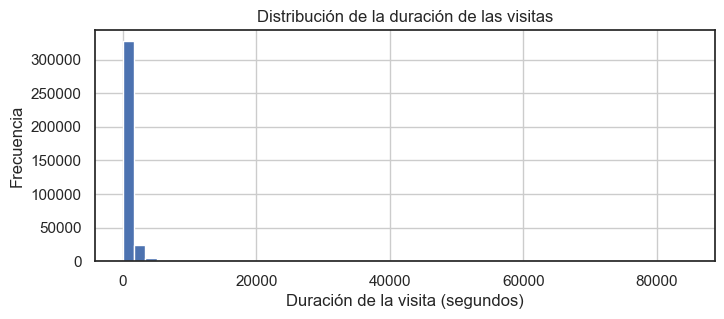

In [389]:
# Histograma de la distribución de la duración de las visitas

visits['visit_duration_sec'].hist(bins=50, figsize=(8, 3))

plt.title('Distribución de la duración de las visitas')
plt.xlabel('Duración de la visita (segundos)') 
plt.ylabel('Frecuencia')

#### **Boxplot duración visitas**

Text(0, 0.5, 'Duración de la visita (segundos)')

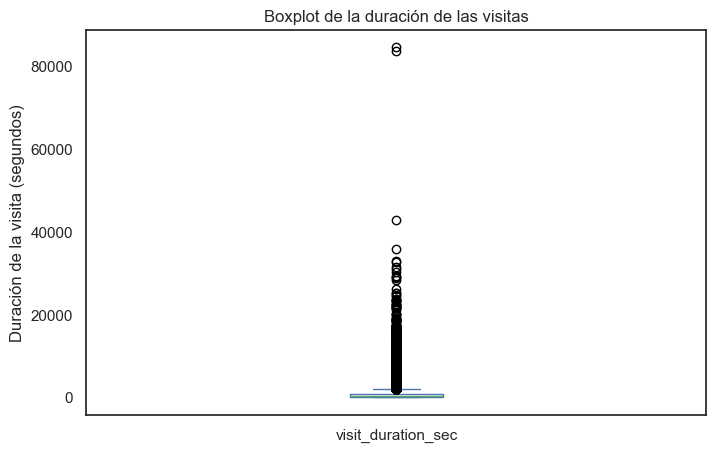

In [390]:
# boxplot de la duración de las visitas

visits['visit_duration_sec'].plot(kind='box', figsize=(8, 5))

plt.title('Boxplot de la duración de las visitas')
plt.ylabel('Duración de la visita (segundos)')

#### **Moda duración de la visita**

In [391]:
# Calculo de la moda de la duración de las visitas

moda_visitas = visits['visit_duration_sec'].mode()

print('Moda de la duración de las visitas:', moda_visitas, 'segundos.')

Moda de la duración de las visitas: 0    60
Name: visit_duration_sec, dtype: int32 segundos.


#### **Moda de la hora de visita**

In [392]:
# Moda de la hora de visita

moda_hora_visits = visits['hour_visit'].mode()

print('Hora mas común de la conexión de los usuarios (moda):', moda_hora_visits)
print()

# Top 5 horas del día con mayor cantidad de visitas

top_5_horas = visits.groupby('hour_visit').agg({'uid': 'count'}).sort_values(by='uid', ascending=False).head(5)

print('Top 5 horas del día con mayor cantidad de visitas:')

print(top_5_horas)
print()


Hora mas común de la conexión de los usuarios (moda): 0    13
Name: hour_visit, dtype: int32

Top 5 horas del día con mayor cantidad de visitas:
              uid
hour_visit       
13          24446
12          24367
14          24139
15          23723
11          23537



Cantidad de sesiones por hora:

              uid
hour_visit       
0           11701
1            6034
2            3010
3            1594
4            1029
5            1037
6            1847
7            3933
8            8727
9           15251
10          21224
11          23537
12          24367
13          24446
14          24139
15          23723
16          23122
17          21395
18          19268
19          18805
20          20340
21          21653
22          21843
23          17375


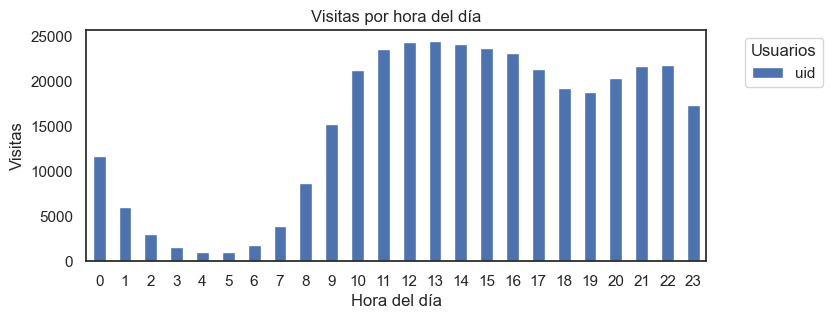

In [393]:
# Cantidad de visitas por hora

visits_por_hora = visits.groupby('hour_visit').agg({'uid': 'count'})

print('Cantidad de sesiones por hora:')
print()
print(visits_por_hora)

# Gráfica de la cantidad de visitas por hora

visits_por_hora.plot(kind='bar', figsize=(8, 3))

plt.title('Visitas por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Visitas')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1),
           loc='upper left', title='Usuarios')


### **Análisis: visits por device**

#### **Visit device: Desktop**

##### **Visitas por source_id**

Desktop: ranking de fuentes de origen de visitas acumuladas:
           source_count
source_id              
4                 67640
3                 65777
5                 50069
2                 35661
1                 25901
9                 10119
10                 7367
7                    28
6                     5


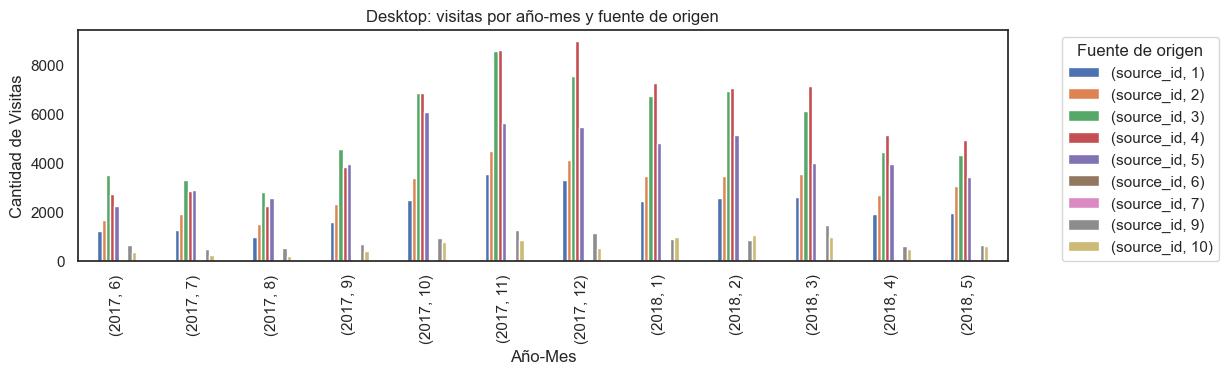

In [394]:
# Visits device: Desktop

# Gráficas por mes de 'source_id' para identificar la fuente origen de la visita

visits_desktop = visits[visits['device'] == 'desktop']

visits_source_desktop = visits_desktop.groupby(['year_visit', 'month_visit', 'source_id']).agg({
    'source_id': 'count'}).unstack()

ax = visits_source_desktop.plot(kind='bar', figsize=(12, 3))

plt.title('Desktop: visitas por año-mes y fuente de origen')
plt.xlabel('Año-Mes')
plt.ylabel('Cantidad de Visitas')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1),
           loc='upper left', title='Fuente de origen')

# Ranking de fuentes de origen acumuladas por Desktop

visits_source_desktop_rank = visits_desktop.groupby('source_id').agg({'source_id': 'count'})

visits_source_desktop_rank.columns = ['source_count']

print('Desktop: ranking de fuentes de origen de visitas acumuladas:')

print(visits_source_desktop_rank.sort_values(by='source_count', ascending=False))


##### **Usuarios activos**

In [395]:
# Visits device: Desktop

# MAU (Monthly Active Users)

mau_visits_desktop = round(visits_desktop.groupby(['year_visit', 'month_visit']).agg({'uid': 'nunique'}).mean(),0)

print('Desktop: MAU (Monthly Active Users):', mau_visits_desktop)
print()

# WAU (Monthly Active Users)

wau_visits_desktop = round(visits_desktop.groupby(
    ['year_visit', 'week_visit']).agg({'uid': 'nunique'}).mean(), 0)

print('Desktop: WAU (Weekly Active Users):', wau_visits_desktop)
print()

# DAU (Daily Active Users)

dau_visits_desktop = round(visits_desktop.groupby('date_visit').agg({'uid': 'nunique'}).mean(), 0)

print('Desktop: DAU (Daily Active Users):', wau_visits_desktop)
print()

# Sticky Factor (Factor de adherencia)

sticky_mau_desktop = round(dau_visits_desktop / mau_visits_desktop * 100,2)

print('Desktop: sticky Factor Mensual (Factor de adherencia %):', sticky_mau_desktop)

sticky_wau_desktop = round(dau_visits_desktop / wau_visits_desktop * 100, 2)

print('Desktop: sticky Factor Semanal (Factor de adherencia %):', sticky_wau_desktop)

Desktop: MAU (Monthly Active Users): uid    16725.0
dtype: float64

Desktop: WAU (Weekly Active Users): uid    4130.0
dtype: float64

Desktop: DAU (Daily Active Users): uid    4130.0
dtype: float64

Desktop: sticky Factor Mensual (Factor de adherencia %): uid    3.94
dtype: float64
Desktop: sticky Factor Semanal (Factor de adherencia %): uid    15.96
dtype: float64


##### **Visitas por día**

In [396]:
# Visits device: Desktop

# Visitas por día

visits_diarias_desktop = visits_desktop.groupby(
    'date_visit').agg({'uid': 'count'})

print('Desktop visitas por día:')
print()
print(visits_diarias_desktop)
print()

# Visitas promedio por dia

visits_prom_diarias_desktop = round(visits_diarias_desktop['uid'].mean(), 0)

print('Desktop visitas promedio por día:', visits_prom_diarias_desktop)
print()

# Top 10 días con mayor cantidad de visitas

top_10_dias_desktop = visits_diarias_desktop.sort_values(
    by='uid', ascending=False).head(10)

print('Desktop top 10 días con mayor cantidad de sesiones:')
print()
print(top_10_dias_desktop)

Desktop visitas por día:

             uid
date_visit      
2017-06-01   501
2017-06-02   498
2017-06-03   329
2017-06-04   349
2017-06-05   693
...          ...
2018-05-27   426
2018-05-28   835
2018-05-29   751
2018-05-30   989
2018-05-31  1544

[364 rows x 1 columns]

Desktop visitas promedio por día: 721.0

Desktop top 10 días con mayor cantidad de sesiones:

             uid
date_visit      
2017-11-24  3152
2018-05-31  1544
2017-11-25  1409
2018-02-01  1408
2017-11-16  1365
2018-03-26  1357
2017-11-27  1351
2017-11-28  1340
2017-12-13  1275
2017-12-07  1268


##### **Visitas mensuales por usuario**

In [397]:
# Visits device: Desktop

# Visitas mensuales por usuario

visits_mensuales_desktop = visits_desktop.groupby(
    ['year_visit', 'month_visit']).agg({'uid': ['count', 'nunique']})

visits_mensuales_desktop.columns = ['visitas', 'usuarios_unicos']

visits_mensuales_desktop['visitas_por_usuario'] = round(
    visits_mensuales_desktop['visitas'] / visits_mensuales_desktop['usuarios_unicos'], 2)

print('Desktop visitas mensuales por usuario:')
print()
print(visits_mensuales_desktop)
print()

# Promedio visitas por usuario

visits_promedio_usuario_desktop = round(
    visits_mensuales_desktop['visitas_por_usuario'].mean(), 2)

print('Promedio de visitas por usuario:', visits_promedio_usuario_desktop)

Desktop visitas mensuales por usuario:

                        visitas  usuarios_unicos  visitas_por_usuario
year_visit month_visit                                               
2017       6              12358             9761                 1.27
           7              12950            10145                 1.28
           8              10854             8611                 1.26
           9              17356            13509                 1.28
           10             27392            21286                 1.29
           11             32917            24439                 1.35
           12             31112            23294                 1.34
2018       1              26577            20350                 1.31
           2              27077            20574                 1.32
           3              25861            19574                 1.32
           4              19231            14844                 1.30
           5              18882            14312  

##### **ASL**

In [398]:
# Visits device: Desktop

# ASL (Average Session Length) - Duración promedio de la visita

visits_desktop['visit_duration_sec'] = (
    visits_desktop['end_ts'] - visits_desktop['start_ts']).dt.seconds

print('Desktop duración promedio de la visita (ASL):', round(
    visits_desktop['visit_duration_sec'].mean(), 2), 'segundos.')
print()

print('Desktop duración promedio de la visita (ASL):', round((
    visits_desktop['visit_duration_sec'].mean() / 60), 2), 'minutos.')
print()

Desktop duración promedio de la visita (ASL): 703.95 segundos.

Desktop duración promedio de la visita (ASL): 11.73 minutos.



C:\Users\the_o\AppData\Local\Temp\ipykernel_5104\1791746602.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visits_desktop['visit_duration_sec'] = (


##### **Histograma duración de las visitas**

Text(0, 0.5, 'Frecuencia')

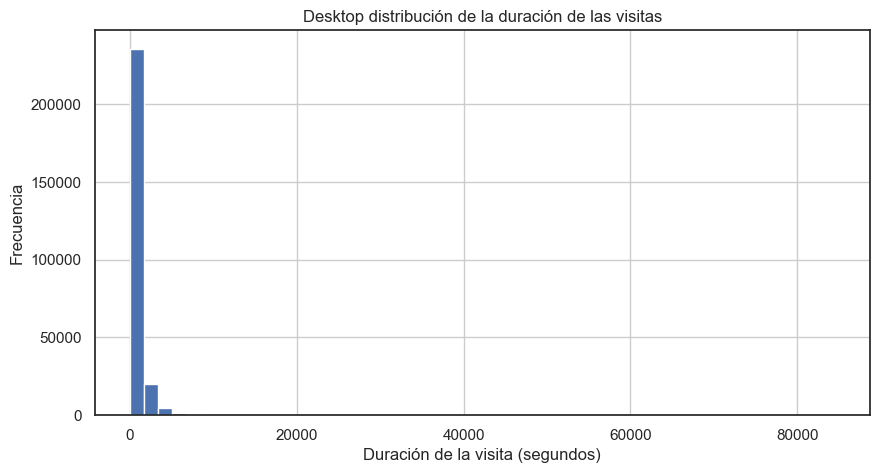

In [399]:
# Visits device: Desktop

# Histograma de la distribución de la duración de las visitas

visits_desktop['visit_duration_sec'].hist(bins=50, figsize=(10, 5))

plt.title('Desktop distribución de la duración de las visitas')
plt.xlabel('Duración de la visita (segundos)') 
plt.ylabel('Frecuencia')

##### **Boxplot duración de las visitas**

Text(0, 0.5, 'Duración de la visita (segundos)')

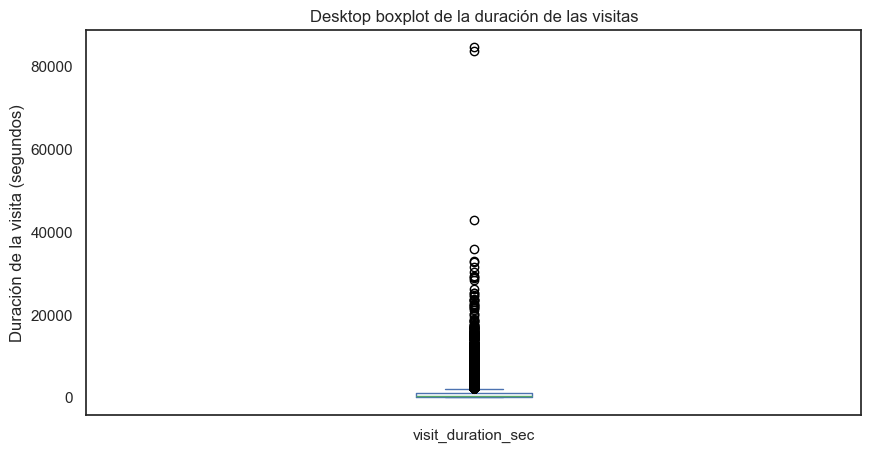

In [400]:
# Visits device: Desktop

# boxplot de la duración de las visitas

visits_desktop['visit_duration_sec'].plot(kind='box', figsize=(10, 5))

plt.title('Desktop boxplot de la duración de las visitas')
plt.ylabel('Duración de la visita (segundos)')

##### **Moda duración de las visitas**

In [401]:
# Visits device: Desktop

# Calculo de la moda de la duración de las visitas

moda_visits_desktop = visits_desktop['visit_duration_sec'].mode()

print('Moda de la duración de las visitas:', moda_visits_desktop, 'segundos.')

Moda de la duración de las visitas: 0    60
Name: visit_duration_sec, dtype: int32 segundos.


##### **Moda de la hora de visita**

In [402]:
# Visits device: Desktop

# Moda de la hora de visita

moda_hora_visits_desktop = visits_desktop['hour_visit'].mode()

print('Hora mas común de la conexión de los usuarios (moda) en desktop:',
      moda_hora_visits_desktop)
print()

# Top 5 horas del día con mayor cantidad de visitas

top_5_horas_desktop = visits_desktop.groupby('hour_visit').agg(
    {'uid': 'count'}).sort_values(by='uid', ascending=False).head(5)

print('Top 5 horas del día con mayor cantidad de visitas en desktop:')

print(top_5_horas_desktop)
print()

Hora mas común de la conexión de los usuarios (moda) en desktop: 0    12
Name: hour_visit, dtype: int32

Top 5 horas del día con mayor cantidad de visitas en desktop:
              uid
hour_visit       
12          19120
13          18984
14          18752
15          18539
11          18529



Cantidad de visitas por hora en desktop:

              uid
hour_visit       
0            7643
1            3920
2            1938
3            1042
4             655
5             635
6            1079
7            2139
8            5408
9           11056
10          16418
11          18529
12          19120
13          18984
14          18752
15          18539
16          17894
17          16248
18          13805
19          13115
20          14252
21          15116
22          14802
23          11478


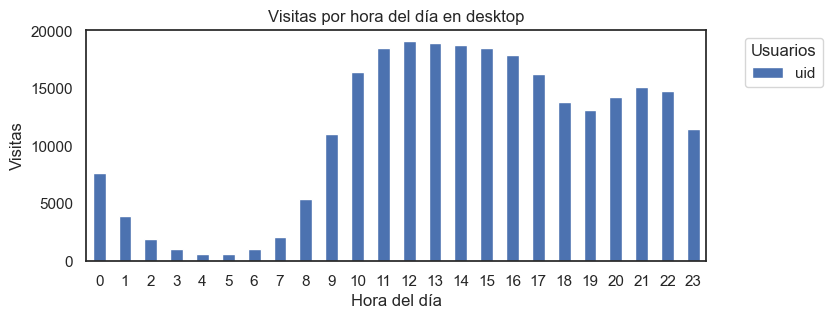

In [403]:
# Visits device: Desktop

# Cantidad de visitas por hora

visits_por_hora_desktop = visits_desktop.groupby(
    'hour_visit').agg({'uid': 'count'})

print('Cantidad de visitas por hora en desktop:')
print()
print(visits_por_hora_desktop)

# Gráfica de la cantidad de visitas por hora

visits_por_hora_desktop.plot(kind='bar', figsize=(8, 3))

plt.title('Visitas por hora del día en desktop')
plt.xlabel('Hora del día')
plt.ylabel('Visitas')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1),
           loc='upper left', title='Usuarios')

#### **Visit device: Touch**

##### **Visitas por source_id**

Touch: ranking de fuentes de origen de visitas acumuladas:
           source_count
source_id              
4                 34154
3                 19833
5                 16836
2                 11965
1                  8220
9                  3158
10                 2658
7                     8
6                     1


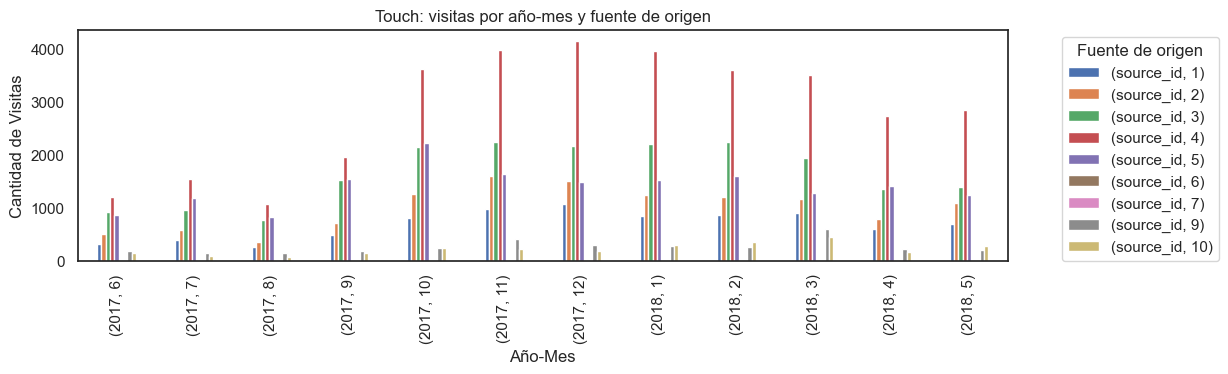

In [404]:
# Visits device: Touch

# Gráficas por mes de 'source_id' para identificar la fuente origen de la visita

visits_touch = visits[visits['device'] == 'touch']

visits_source_touch = visits_touch.groupby(['year_visit', 'month_visit', 'source_id']).agg({
    'source_id': 'count'}).unstack()

ax = visits_source_touch.plot(kind='bar', figsize=(12, 3))

plt.title('Touch: visitas por año-mes y fuente de origen')
plt.xlabel('Año-Mes')
plt.ylabel('Cantidad de Visitas')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1),
           loc='upper left', title='Fuente de origen')

# Ranking de fuentes de origen acumuladas por Desktop

visits_source_touch_rank = visits_touch.groupby(
    'source_id').agg({'source_id': 'count'})

visits_source_touch_rank.columns = ['source_count']

print('Touch: ranking de fuentes de origen de visitas acumuladas:')

print(visits_source_touch_rank.sort_values(by='source_count', ascending=False))

##### **Usuarios activos**

In [405]:
# Visits device: Touch

# MAU (Monthly Active Users)

mau_visits_touch = round(visits_touch.groupby(['year_visit', 'month_visit']).agg({'uid': 'nunique'}).mean(),0)

print('Touch MAU (Monthly Active Users):', mau_visits_touch)
print()

# WAU (Monthly Active Users)

wau_visits_touch = round(visits_touch.groupby(
    ['year_visit', 'week_visit']).agg({'uid': 'nunique'}).mean(), 0)

print('Touch: WAU (Weekly Active Users):', wau_visits_touch)
print()

# DAU (Daily Active Users)

dau_visits_touch = round(visits_touch.groupby(
    'date_visit').agg({'uid': 'nunique'}).mean(), 0)

print('Touch: DAU (Daily Active Users):', wau_visits_touch)
print()

# Sticky Factor (Factor de adherencia)

sticky_mau_touch = round(dau_visits_touch / mau_visits_touch * 100, 2)

print('Touch: sticky Factor Mensual (Factor de adherencia %):', sticky_mau_touch)

sticky_wau_touch = round(dau_visits_touch / wau_visits_touch * 100, 2)

print('Touch: sticky Factor Semanal (Factor de adherencia %):', sticky_wau_touch)

Touch MAU (Monthly Active Users): uid    6826.0
dtype: float64

Touch: WAU (Weekly Active Users): uid    1635.0
dtype: float64

Touch: DAU (Daily Active Users): uid    1635.0
dtype: float64

Touch: sticky Factor Mensual (Factor de adherencia %): uid    3.71
dtype: float64
Touch: sticky Factor Semanal (Factor de adherencia %): uid    15.47
dtype: float64


##### **Visitas por día**

In [406]:
# Visits device: Touch

# Visitas por día

visits_diarias_touch = visits_touch.groupby(
    'date_visit').agg({'uid': 'count'})

print('Touch visitas por día:')
print()
print(visits_diarias_touch)
print()

# Visitas promedio por dia

visits_prom_diarias_touch = round(visits_diarias_touch['uid'].mean(), 0)

print('Touch visitas promedio por día:', visits_prom_diarias_touch)
print()

# Top 10 días con mayor cantidad de visitas

top_10_dias_touch = visits_diarias_touch.sort_values(
    by='uid', ascending=False).head(10)

print('Touch top 10 días con mayor cantidad de sesiones:')
print()
print(top_10_dias_touch)

Touch visitas por día:

            uid
date_visit     
2017-06-01  163
2017-06-02  160
2017-06-03  148
2017-06-04  161
2017-06-05  200
...         ...
2018-05-27  246
2018-05-28  321
2018-05-29  284
2018-05-30  421
2018-05-31  712

[363 rows x 1 columns]

Touch visitas promedio por día: 267.0

Touch top 10 días con mayor cantidad de sesiones:

            uid
date_visit     
2017-11-24  890
2018-05-31  712
2017-11-25  680
2018-03-25  613
2018-01-03  542
2018-01-04  527
2018-01-02  507
2018-02-01  470
2018-03-27  467
2018-02-10  467


##### **Visitas mensuales por usuario**

In [407]:
# Visits device: Touch

# Visitas mensuales por usuario

visits_mensuales_touch = visits_touch.groupby(
    ['year_visit', 'month_visit']).agg({'uid': ['count', 'nunique']})

visits_mensuales_touch.columns = ['visitas', 'usuarios_unicos']

visits_mensuales_touch['visitas_por_usuario'] = round(
    visits_mensuales_touch['visitas'] / visits_mensuales_touch['usuarios_unicos'], 2)

print('Touch visitas mensuales por usuario:')
print()
print(visits_mensuales_touch)
print()


# Promedio visitas por usuario

visits_promedio_usuario_touch = round(
    visits_mensuales_touch['visitas_por_usuario'].mean(), 2)

print('Promedio de visitas por usuario:', visits_promedio_usuario_touch)

Touch visitas mensuales por usuario:

                        visitas  usuarios_unicos  visitas_por_usuario
year_visit month_visit                                               
2017       6               4147             3655                 1.13
           7               4878             4223                 1.16
           8               3501             3132                 1.12
           9               6551             5679                 1.15
           10             10511             8856                 1.19
           11             11052             8913                 1.24
           12             10871             8785                 1.24
2018       1              10362             8741                 1.19
           2              10105             8590                 1.18
           3               9818             8303                 1.18
           4               7284             6387                 1.14
           5               7753             6647    

##### **ASL**

In [408]:
# Visits device: Touch

# ASL (Average Session Length) - Duración promedio de la visita

visits_touch['visit_duration_sec'] = (
    visits_touch['end_ts'] - visits_touch['start_ts']).dt.seconds

print('Touch duración promedio de la visita (ASL):', round(
    visits_touch['visit_duration_sec'].mean(), 2), 'segundos.')
print()

print('Touch duración promedio de la visita (ASL):', round((
    visits_touch['visit_duration_sec'].mean() / 60), 2), 'minutos.')
print()

Touch duración promedio de la visita (ASL): 479.62 segundos.

Touch duración promedio de la visita (ASL): 7.99 minutos.



C:\Users\the_o\AppData\Local\Temp\ipykernel_5104\2298838474.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visits_touch['visit_duration_sec'] = (


##### **Histograma duración de las visitas**

Text(0, 0.5, 'Frecuencia')

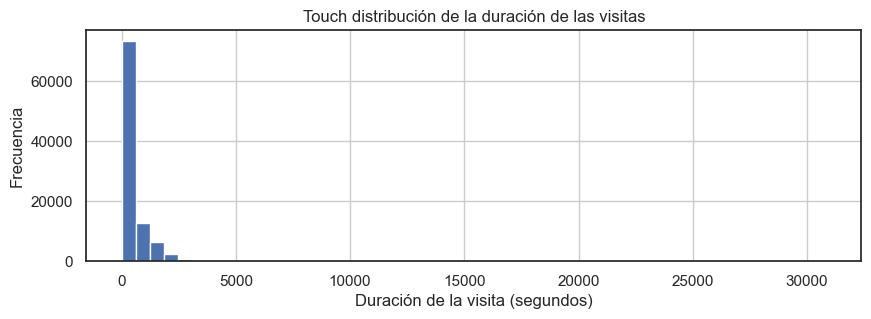

In [409]:
# Visits device: Touch

# Histograma de la distribución de la duración de las visitas

visits_touch['visit_duration_sec'].hist(bins=50, figsize=(10, 3))

plt.title('Touch distribución de la duración de las visitas')
plt.xlabel('Duración de la visita (segundos)') 
plt.ylabel('Frecuencia')

##### **Boxplot duración de las visitas**

Text(0, 0.5, 'Duración de la visita (segundos)')

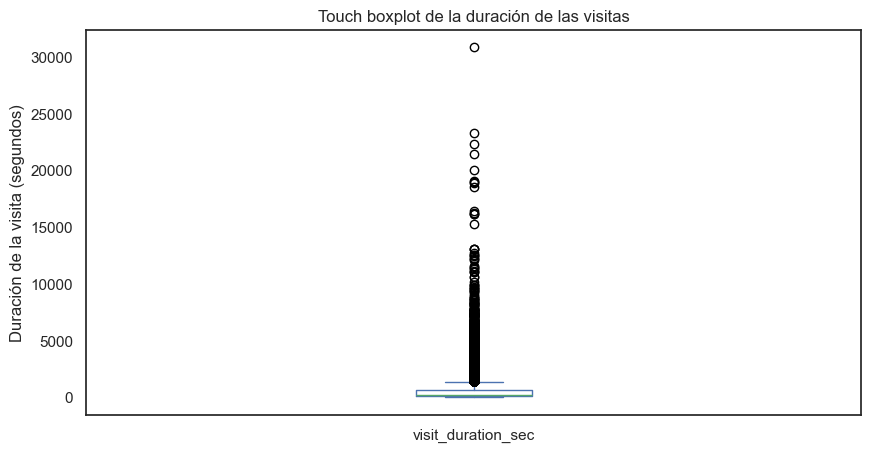

In [410]:
# Visits device: Touch

# boxplot de la duración de las visitas

visits_touch['visit_duration_sec'].plot(kind='box', figsize=(10, 5))

plt.title('Touch boxplot de la duración de las visitas')
plt.ylabel('Duración de la visita (segundos)')

##### **Moda duración de la visita**

In [411]:
# Visits device: Touch

# Calculo de la moda de la duración de las visitas

moda_visits_touch = visits_touch['visit_duration_sec'].mode()

print('Touch moda de la duración de las visitas:',
      moda_visits_touch, 'segundos.')

Touch moda de la duración de las visitas: 0    60
Name: visit_duration_sec, dtype: int32 segundos.


##### **Moda de la hora de visita**

In [412]:
# Visits device: Touch

# Moda de la hora de visita

moda_hora_visits_touch = visits_touch['hour_visit'].mode()

print('Hora mas común de la conexión de los usuarios (moda) en touch:',
      moda_hora_visits_touch)
print()

# Top 5 horas del día con mayor cantidad de visitas

top_5_horas_touch = visits_touch.groupby('hour_visit').agg(
    {'uid': 'count'}).sort_values(by='uid', ascending=False).head(5)

print('Top 5 horas del día con mayor cantidad de visitas en touch:')

print(top_5_horas_touch)
print()

Hora mas común de la conexión de los usuarios (moda) en touch: 0    22
Name: hour_visit, dtype: int32

Top 5 horas del día con mayor cantidad de visitas en touch:
             uid
hour_visit      
22          7041
21          6537
20          6088
23          5897
19          5690



Cantidad de visitas por hora en touch:

             uid
hour_visit      
0           4058
1           2114
2           1072
3            552
4            374
5            402
6            768
7           1794
8           3319
9           4195
10          4806
11          5008
12          5247
13          5462
14          5387
15          5184
16          5228
17          5147
18          5463
19          5690
20          6088
21          6537
22          7041
23          5897


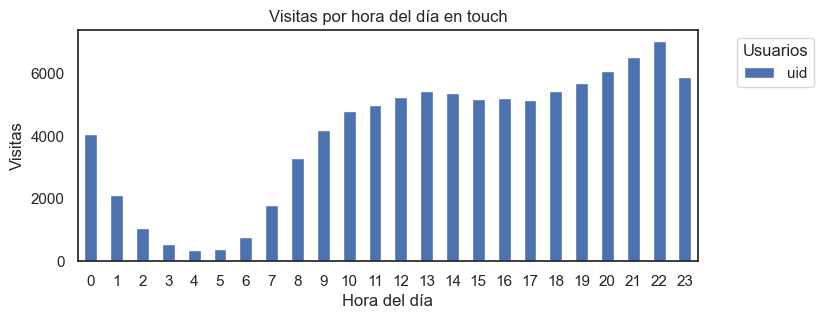

In [413]:
# Visits device: Touch

# Cantidad de visitas por hora

visits_por_hora_touch = visits_touch.groupby(
    'hour_visit').agg({'uid': 'count'})

print('Cantidad de visitas por hora en touch:')
print()
print(visits_por_hora_touch)

# Gráfica de la cantidad de visitas por hora

visits_por_hora_touch.plot(kind='bar', figsize=(8, 3))

plt.title('Visitas por hora del día en touch')
plt.xlabel('Hora del día')
plt.ylabel('Visitas')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1),
           loc='upper left', title='Usuarios')

#### **Prueba de hipótesis**

**Definición de hipótesis nula e hipótesis alternativa**

* **Hipótesis Nula:** "La duración promedio de las visitas **NO CAMBIA** al utilizar un dispositivo diferente a una desktop".

* **Hipótesis alternativa:** "La duración promedio de las visitas **CAMBIA** al utilizar un dispositivo diferente a una desktop".

La hipótesis nula se formula asumiendo que la duración de las visitas al sitio **NO CAMBIA** al utilizar un dispositivo diferente a una desktop.

La hipótesis alternativa establece la posible variación.

Se aplica una prueba de Levene para verificar la diferencia entre las varianzas.

Se define una prueba de dos colas de variables independientes ya que ninguna variable tiene influencia sobre la otra.

In [414]:
# Estádisticas básicas de variables

print('Estádisticas básicas "duración de visita en desktop":')
print()

print(visits_desktop['visit_duration_sec'].describe())
print()

print('Estádisticas básicas "sabado_sin_lluvia":')
print()

print(visits_touch['visit_duration_sec'].describe())
print()

Estádisticas básicas "duración de visita en desktop":

count    262567.000000
mean        703.946977
std        1091.545596
min           0.000000
25%         120.000000
50%         360.000000
75%         900.000000
max       84480.000000
Name: visit_duration_sec, dtype: float64

Estádisticas básicas "sabado_sin_lluvia":

count    96833.000000
mean       479.619407
std        752.531533
min          0.000000
25%         60.000000
50%        180.000000
75%        600.000000
max      30840.000000
Name: visit_duration_sec, dtype: float64



In [415]:
# Visitas con duración 0

visitas_0_desktop = visits_desktop[visits_desktop['visit_duration_sec'] == 0]

print('Desktop visitas duración 0:')

print(visitas_0_desktop['visit_duration_sec'].count())
print()

visitas_0_touch = visits_touch[visits_touch['visit_duration_sec'] == 0]

print('Touch visitas duración 0:')

print(visitas_0_touch['visit_duration_sec'].count())

Desktop visitas duración 0:
23689

Touch visitas duración 0:
12105


In [416]:
# Filtro de valores atipicos con método IQR de visitas por tipo de device

# Desktop

Q1_duration_desktop = visits_desktop['visit_duration_sec'].quantile(0.25)  # Definir cuartil 1

Q3_duration_desktop = visits_desktop['visit_duration_sec'].quantile(0.75)   # Definir cuartil 3

IQR_duration_desktop = Q3_duration_desktop - Q1_duration_desktop    # Definir rango intercualtil

limite_inferior_desktop = Q1_duration_desktop - (1.5 * IQR_duration_desktop)  # Limite inferior

limite_superior_desktop = Q3_duration_desktop + (1.5 * IQR_duration_desktop)  # Limite superior

duracion_sin_atipicas_desktop = visits_desktop[(visits_desktop['visit_duration_sec'] > limite_inferior_desktop) & (visits_desktop['visit_duration_sec'] < limite_superior_desktop)]

print('Desktop visitas sin duración atípica:')

print(duracion_sin_atipicas_desktop['visit_duration_sec'].describe())

print()

# Touch

Q1_duration_touch = visits_touch['visit_duration_sec'].quantile(
    0.25)  # Definir cuartil 1

Q3_duration_touch = visits_touch['visit_duration_sec'].quantile(
    0.75)   # Definir cuartil 3

IQR_duration_touch = Q3_duration_touch - \
    Q1_duration_desktop    # Definir rango intercualtil

limite_inferior_touch = Q1_duration_touch - \
    (1.5 * IQR_duration_touch)  # Limite inferior

limite_superior_touch = Q3_duration_touch + \
    (1.5 * IQR_duration_touch)  # Limite superior

duracion_sin_atipicas_touch = visits_touch[(visits_touch['visit_duration_sec'] > limite_inferior_touch) & (
    visits_touch['visit_duration_sec'] < limite_superior_touch)]

print('Touch visitas sin duración atípica:')

print(duracion_sin_atipicas_touch['visit_duration_sec'].describe())

Desktop visitas sin duración atípica:
count    243733.000000
mean        485.161738
std         505.390261
min           0.000000
25%         120.000000
50%         300.000000
75%         720.000000
max        2040.000000
Name: visit_duration_sec, dtype: float64

Touch visitas sin duración atípica:
count    86893.000000
mean       291.217313
std        314.759098
min          0.000000
25%         60.000000
50%        180.000000
75%        420.000000
max       1260.000000
Name: visit_duration_sec, dtype: float64


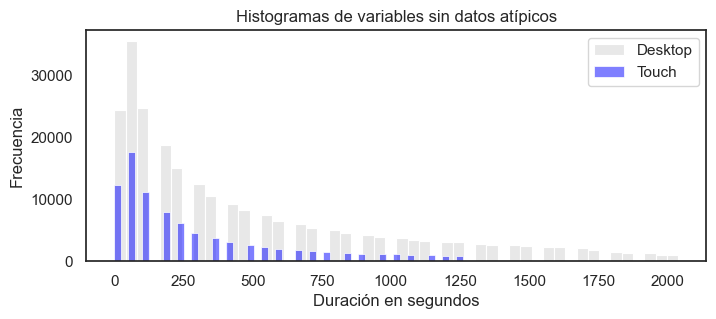

In [417]:
# Histograma de variables sin datos atipicos

plt.figure(figsize=(8, 3))

sns.histplot(duracion_sin_atipicas_desktop['visit_duration_sec'], color='lightgray', bins=50, alpha=0.5)

sns.histplot(
    duracion_sin_atipicas_touch['visit_duration_sec'], color='blue', bins=50, alpha=0.5)

plt.title('Histogramas de variables sin datos atípicos')
plt.xlabel('Duración en segundos')
plt.ylabel('Frecuencia')
plt.legend(['Desktop', 'Touch'])

plt.show()

In [418]:
# Prueba de Levene de igualdad de varianzas

print('Prueba de Levene para comparación de varianzas:')

print()

alpha = 0.05  # Nivel de significancia

# Realizar la prueba
stat, p = st.levene(
    duracion_sin_atipicas_desktop['visit_duration_sec'], duracion_sin_atipicas_touch['visit_duration_sec'])

# Imprimir los resultados
print('Estadístico de prueba:', stat)
print('Valor p:', p)
print()

# Si el valor p es menor que un nivel de significancia predefinido (por ejemplo, 0.05), se rechaza la hipótesis nula y se concluye que las varianzas son significativamente diferentes.

if p < alpha:
    print('Las varianzas son significativamente diferentes')
else:
    print('Las varianzas NO son significativamente diferentes')

Prueba de Levene para comparación de varianzas:

Estadístico de prueba: 11674.699057131282
Valor p: 0.0

Las varianzas son significativamente diferentes


In [419]:
# Prueba de hipótesis

# Las varianzas SI son diferentes

stat, p = st.ttest_ind(
    duracion_sin_atipicas_desktop['visit_duration_sec'], duracion_sin_atipicas_touch['visit_duration_sec'], equal_var=False)

print('Estadístico de prueba:', stat)
print('Valor p:', p)
print()

# Si el "valor p" es menor a "alpha" rechazaremos la hipótesis

if p < alpha:
    print("Rechazamos la hipótesis nula: La duración promedio de las visitas **NO CAMBIA** al utilizar un dispositivo diferente a una desktop.")
else:
    print("No podemos rechazar la hipótesis nula: La duración promedio de las visitas **NO CAMBIA** al utilizar un dispositivo diferente a una desktop.")

Estadístico de prueba: 131.11169776795998
Valor p: 0.0

Rechazamos la hipótesis nula: La duración promedio de las visitas **NO CAMBIA** al utilizar un dispositivo diferente a una desktop.


### **Análisis: visits por source_id**

#### **Identificar que 'source_id' aporta el 80% de las visitas**

Pareto de fuentes de origen de visitas (%):
source_id
4      28.0
3      52.0
5      71.0
2      84.0
1      94.0
9      97.0
10    100.0
7     100.0
6     100.0
Name: source_count, dtype: float64 2


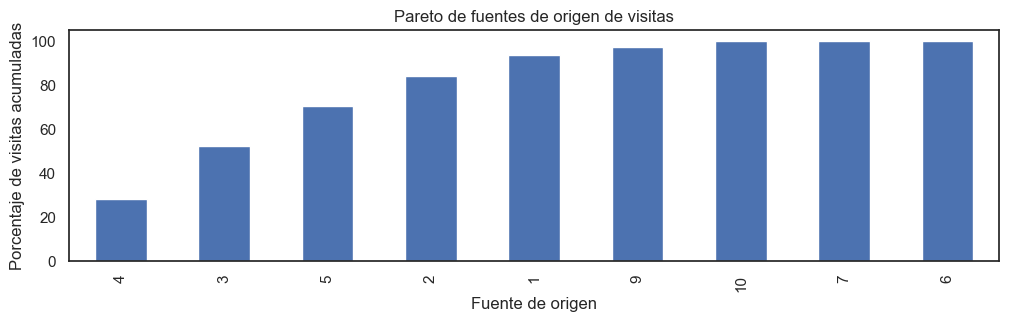

In [420]:
# Visits: pareto de fuentes de origen

visits_source_pareto = visits_source_rank['source_count'].sort_values(ascending=False)

visits_source_pareto_cumsum = visits_source_pareto.cumsum()

visits_source_pareto_cumsum_percent = visits_source_pareto_cumsum / visits_source_pareto.sum() * 100

visits_source_pareto_cumsum_percent.plot(kind='bar', figsize=(12, 3))

print('Pareto de fuentes de origen de visitas (%):')

print(round(visits_source_pareto_cumsum_percent),2)

plt.title('Pareto de fuentes de origen de visitas')

plt.xlabel('Fuente de origen')

plt.ylabel('Porcentaje de visitas acumuladas')

plt.xticks(rotation=90)

plt.show()



#### **Duración promedio de sesiones de acuerdo a su 'source_id'**

Se analizaran las 3 primeras 'source_id' que mas visitas aportan.

In [421]:
# Filtro de visitas por top 3 source_id

top_visits_source = visits[visits['source_id'].isin(visits_source_pareto.head(3).index)]

print(top_visits_source['source_id'].unique())  # Validación de filtro

# Duración promedio de la visita por fuente de origen

visits_source_duration = round(top_visits_source.groupby('source_id').agg({'visit_duration_sec': 'mean'}),2)

print('Duración promedio de la visita por fuente de origen:')

print(visits_source_duration.sort_values(by='visit_duration_sec', ascending=False))

[4 5 3]
Duración promedio de la visita por fuente de origen:
           visit_duration_sec
source_id                    
3                      573.28
4                      559.84
5                      526.74


#### **Visitas mensuales por source_id**

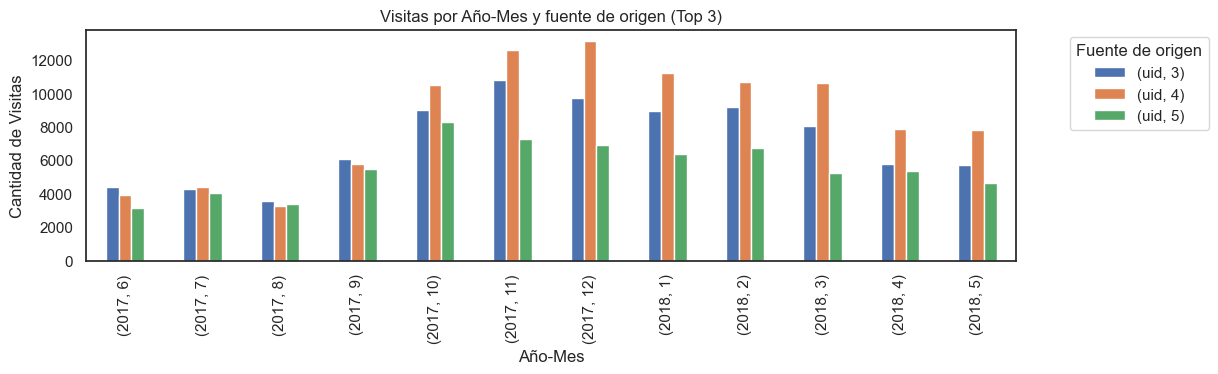

In [422]:
# Grafica de barras de visitas de top 3 source_id

top_visits_source_group = top_visits_source.groupby(['year_visit', 'month_visit', 'source_id']).agg({'uid': 'count'}).unstack()

ax = top_visits_source_group.plot(kind='bar', figsize=(12, 3))

plt.title('Visitas por Año-Mes y fuente de origen (Top 3)')

plt.xlabel('Año-Mes')

plt.ylabel('Cantidad de Visitas')

plt.xticks(rotation=90)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Fuente de origen')

plt.show()

#### **Estadísticas por source_id**

In [423]:
# Estadistícas descritpivas de la duración de la visita por fuente de origen top 3

print('Estadísticas descriptivas de la duración de la visita por fuente de origen top 3:')

print()

print(top_visits_source.groupby('source_id').agg({'visit_duration_sec': 'describe'}))


Estadísticas descriptivas de la duración de la visita por fuente de origen top 3:

          visit_duration_sec                                                   \
                       count        mean         std  min   25%    50%    75%   
source_id                                                                       
3                    85610.0  573.283705  895.778360  0.0  60.0  240.0  720.0   
4                   101794.0  559.841042  793.031810  0.0  60.0  240.0  720.0   
5                    66905.0  526.742187  755.123075  0.0  60.0  240.0  660.0   

                    
               max  
source_id           
3          84480.0  
4          22860.0  
5          18360.0  


#### **Visitas duración 0 por source_id**

In [424]:
# Visitas duracion 0 por fuente de origen top 3

visits_0_top_source = top_visits_source[top_visits_source['visit_duration_sec'] == 0]

print('Visitas duración 0 por fuente de origen (top 3):')
print()

print(visits_0_top_source.groupby('source_id').agg({'visit_duration_sec': 'count'}))

Visitas duración 0 por fuente de origen (top 3):

           visit_duration_sec
source_id                    
3                        9025
4                       10898
5                        7385


#### **Histogramas duración de las visitas por source_id**

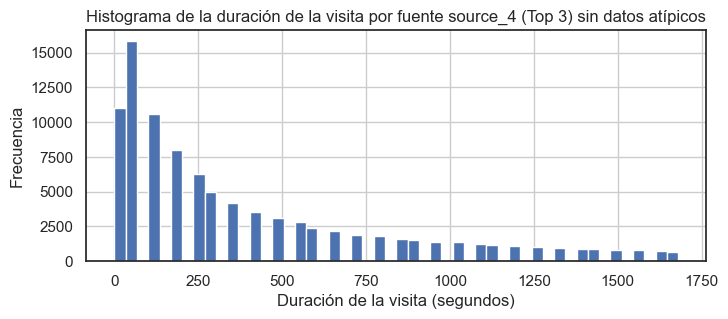

In [425]:
# Histograma de la duración de la visita por fuente de origen top 3

# source_id 4

visits_source_4 = top_visits_source[top_visits_source['source_id'] == 4]

# Eliminar valores atípicos

Q1_duration_source_4 = visits_source_4['visit_duration_sec'].quantile(0.25)  # Definir cuartil 1

Q3_duration_source_4 = visits_source_4['visit_duration_sec'].quantile(0.75)   # Definir cuartil 3

IQR_duration_source_4 = Q3_duration_source_4 - Q1_duration_source_4    # Definir rango intercualtil

limite_inferior_source_4 = Q1_duration_source_4 - (1.5 * IQR_duration_source_4)  # Limite inferior

limite_superior_source_4 = Q3_duration_source_4 + (1.5 * IQR_duration_source_4)  # Limite superior

duracion_sin_atipicas_source_4 = visits_source_4[(visits_source_4['visit_duration_sec'] > limite_inferior_source_4) & (visits_source_4['visit_duration_sec'] < limite_superior_source_4)]

# Histograma

duracion_sin_atipicas_source_4['visit_duration_sec'].hist(bins=50, figsize=(8, 3))

plt.title('Histograma de la duración de la visita por fuente source_4 (Top 3) sin datos atípicos')

plt.xlabel('Duración de la visita (segundos)')

plt.ylabel('Frecuencia')

plt.show()




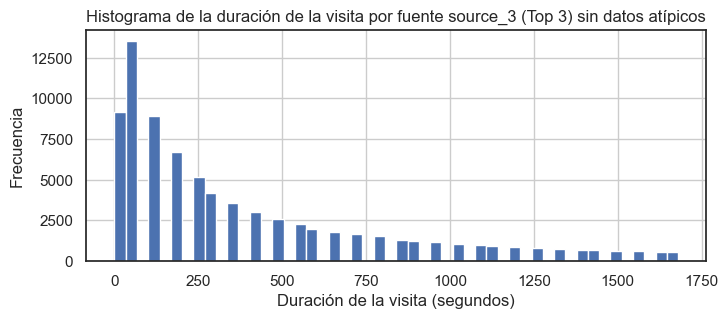

In [426]:
# Histograma de la duración de la visita por fuente de origen top 3

# source_id 3

visits_source_3 = top_visits_source[top_visits_source['source_id'] == 3]

# Eliminar valores atípicos

Q1_duration_source_3 = visits_source_3['visit_duration_sec'].quantile(
    0.25)  # Definir cuartil 1

Q3_duration_source_3 = visits_source_3['visit_duration_sec'].quantile(
    0.75)   # Definir cuartil 3

IQR_duration_source_3 = Q3_duration_source_3 - \
    Q1_duration_source_3    # Definir rango intercualtil

limite_inferior_source_3 = Q1_duration_source_3 - \
    (1.5 * IQR_duration_source_3)  # Limite inferior

limite_superior_source_3 = Q3_duration_source_3 + \
    (1.5 * IQR_duration_source_3)  # Limite superior

duracion_sin_atipicas_source_3 = visits_source_3[(visits_source_3['visit_duration_sec'] > limite_inferior_source_3) & (
    visits_source_3['visit_duration_sec'] < limite_superior_source_3)]

# Histograma

duracion_sin_atipicas_source_3['visit_duration_sec'].hist(
    bins=50, figsize=(8, 3))

plt.title('Histograma de la duración de la visita por fuente source_3 (Top 3) sin datos atípicos')

plt.xlabel('Duración de la visita (segundos)')

plt.ylabel('Frecuencia')

plt.show()

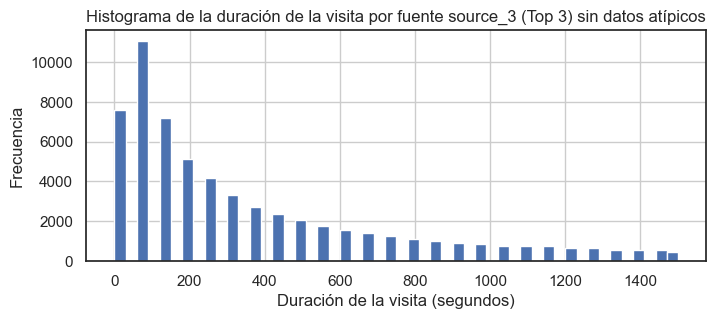

In [427]:
# Histograma de la duración de la visita por fuente de origen top 3

# source_id 5

visits_source_5 = top_visits_source[top_visits_source['source_id'] == 5]

# Eliminar valores atípicos

Q1_duration_source_5 = visits_source_5['visit_duration_sec'].quantile(
    0.25)  # Definir cuartil 1

Q3_duration_source_5 = visits_source_5['visit_duration_sec'].quantile(
    0.75)   # Definir cuartil 3

IQR_duration_source_5 = Q3_duration_source_5 - \
    Q1_duration_source_5    # Definir rango intercualtil

limite_inferior_source_5 = Q1_duration_source_5 - \
    (1.5 * IQR_duration_source_5)  # Limite inferior

limite_superior_source_5 = Q3_duration_source_5 + \
    (1.5 * IQR_duration_source_5)  # Limite superior

duracion_sin_atipicas_source_5 = visits_source_5[(visits_source_5['visit_duration_sec'] > limite_inferior_source_5) & (
    visits_source_5['visit_duration_sec'] < limite_superior_source_5)]

# Histograma

duracion_sin_atipicas_source_5['visit_duration_sec'].hist(
    bins=50, figsize=(8, 3))

plt.title('Histograma de la duración de la visita por fuente source_3 (Top 3) sin datos atípicos')

plt.xlabel('Duración de la visita (segundos)')

plt.ylabel('Frecuencia')

plt.show()

### **Conclusiones dataset: visits**

Visitas totales: 359,400

Visitas por ‘device’:

* Desktop 262,567
* Touch 96,833


De junio 2017 a mayo 2018 el dispositivo mas utilizado para visitar el sitio es ‘desktop’, presentando sus puntos máximos en los meses de noviembre y diciembre 2017, seguidos los meses de febrero y marzo 2018.

Los dispositivos ‘touch’ mejoraron su uso para visitar el sitio a partir de octubre de 2017, presentando visitas estables hasta el mes de abril de 2018 que presenta una ligera caída.

**Para los usuarios activos totales se presentan los siguientes indicadores:**

* MAU (Monthly Active Users): 23,228
* WAU (Weekly Active Users): 5,716
* DAU (Daily Active Users): 5,716

Usuarios activos en  ‘desktop’:

* MAU (Monthly Active Users): 16,725
* WAU (Weekly Active Users): 4,130
* DAU (Daily Active Users): 4,130

Usuarios activos en ‘touch’:

* MAU (Monthly Active Users): 6,826
* WAU (Weekly Active Users): 1,635
* DAU (Daily Active Users): 1,635

**El factor de Adherencia (Sticky Factor) total:**

* Mensual: 3.91%
* Semanal: 15.89%

En ‘desktop:

* Mensual: 3.94%
* Semanal: 15.96%

En ‘touch’:

* Mensual: 3.71%
* Semanal: 15.47%

Como se muestra el factor de adherencia es mejor en ‘desktop’ en general.

**Sesiones promedio por día total: 987**

* ‘desktop’: 721
* ‘touch’: 267

**Se identificó el top 5 de los días con mayor número de visitas:**

* 2017-11-24:  4042
* 2018-05-31:  2256
* 2017-11-25 : 2089
* 2018-02-01 : 1878
* 2018-03-26 : 1796

El promedio de visitas por usuario total es de 1.28, con su mejor indicador en el mes de noviembre de 2017 con el 1.34. En ‘desktop’ el promedio es de 1.3 y su mejor mes, noviembre 2017 con 1.35. En ‘touch’ es de 1.17 y su mejor indicador se presento en los meses de noviembre y diciembre de 2017 con 1.24.

La duración promedio de la visita (ASL) total es de 11 minutos, en ‘desktop’ se presenta la misma duración de 11 minutos y en ‘touch’ de 8 minutos.

Los tiempos de duración de la visita presentan una distribución no normal, y la moda es del tiempo de ’60 segundos (1 minuto)’.

La hora de visita general es a las 13 horas, sin embargo, hay una diferencia importante entre las horas de visita más comunes entre dispositivos, en ‘desktop’ la hora mas común es a las 12 horas y en ‘touch’ es a las 22 horas. 

**Revisando a más detalle encontramos que los usuarios de ‘desktop’ se conectan regularmente entre las 11 y 15 horas, siendo estas las horas que presentan el mayor número de visitas en este dispositivo. En cuanto a ‘touch’, los usuarios visitan el sitio entre las 19 y 23 horas.**

Se detectaron visitas con duración de ‘0 segundos’, estas no se eliminaron ya que se realizó el calculó por IQR de valores atípicos, y por otra parte, (a falta de comprobarse) se supone que pueden ser visitas que se realizan al dar click en un anuncio por parte de un cliente, pero su intención no es visitar el sitio en ese momento, por lo tanto sale de inmediato.

**Se realizó una prueba de hipótesis para comprobar la siguiente hipótesis nula:**

**Hipótesis Nula:** "La duración promedio de las visitas **NO CAMBIA** al utilizar un dispositivo diferente a una desktop".

Variables:

* Duración de la visita en dispositivo ‘desktop’.
* Duración de la visita en dispositivo ‘touch’.

Se eliminaron los valores atípicos antes de realizar las pruebas y se encontró por medio de prueba de Levene que las varianzas son significativamente diferentes.

De acuerdo con la prueba de variables independientes que:

**Rechazamos la hipótesis nula: La duración promedio de las visitas **NO CAMBIA** al utilizar un dispositivo diferente a una desktop.**

En cuanto a las fuentes de las visitas (‘source_id’), en general las ‘source’ 4, 3, 5 y 2 son las 4 fuentes con mayor número de visitas, representan el 84% del total de las visitas, analizándolo por ‘device’ ambos dispositivos presentan en el mismo orden las fuentes de visitas como las mejores.

Se analizaron a detalle las 3 primeras ‘source_id’ de las visitas (4,3,5), encontrando lo siguiente:

La ‘source_id_4’ es la fuente de visitas mis relevante en el último año, a partir del mes de octubre de 2017 a mayo 2018 fue la fuente más importante de visitas. Teniendo su pico máximo en diciembre de 2017.

La ‘source_id_3_’ es la segunda fuente más importante siguiendo muy de cerca los resultados de la ‘source_id_4’
Cabe mencionar que la ‘source_id_3’ es la que presenta la duración promedio de visita con 573 segundos.

Las distribuciones de los tiempos de duración de las 3 ‘source_id’ analizadas no son normales.


## **Análisis: orders (ventas)**

### **Ventas totales en el período de los datos**

In [428]:
# Ventas totales

orders_total = round(orders['revenue'].sum(),2)

print('Ventas totales:', orders_total)

print()

print('Cantidad de usuarios haciendo compras:', orders['uid'].nunique())
print()

# Ventas por mes

orders_mes = orders.groupby(['year_order', 'month_order']).agg({'revenue': 'sum'})

print('Ventas por mes:')
print()
print(orders_mes)

# Meses con mayores ventas

top_3_meses_ventas = orders_mes.sort_values(by='revenue', ascending=False).head(3)

print('Top 3 meses con mayores ventas:')

print(top_3_meses_ventas)

Ventas totales: 252057.2

Cantidad de usuarios haciendo compras: 36523

Ventas por mes:

                         revenue
year_order month_order          
2017       6             9557.49
           7            12539.47
           8             8758.78
           9            18345.51
           10           27987.70
           11           27069.93
           12           36388.60
2018       1            19417.13
           2            25560.54
           3            28834.59
           4            16858.06
           5            20735.98
           6                3.42
Top 3 meses con mayores ventas:
                         revenue
year_order month_order          
2017       12           36388.60
2018       3            28834.59
2017       10           27987.70


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '(2017, 6)'),
  Text(1, 0, '(2017, 7)'),
  Text(2, 0, '(2017, 8)'),
  Text(3, 0, '(2017, 9)'),
  Text(4, 0, '(2017, 10)'),
  Text(5, 0, '(2017, 11)'),
  Text(6, 0, '(2017, 12)'),
  Text(7, 0, '(2018, 1)'),
  Text(8, 0, '(2018, 2)'),
  Text(9, 0, '(2018, 3)'),
  Text(10, 0, '(2018, 4)'),
  Text(11, 0, '(2018, 5)'),
  Text(12, 0, '(2018, 6)')])

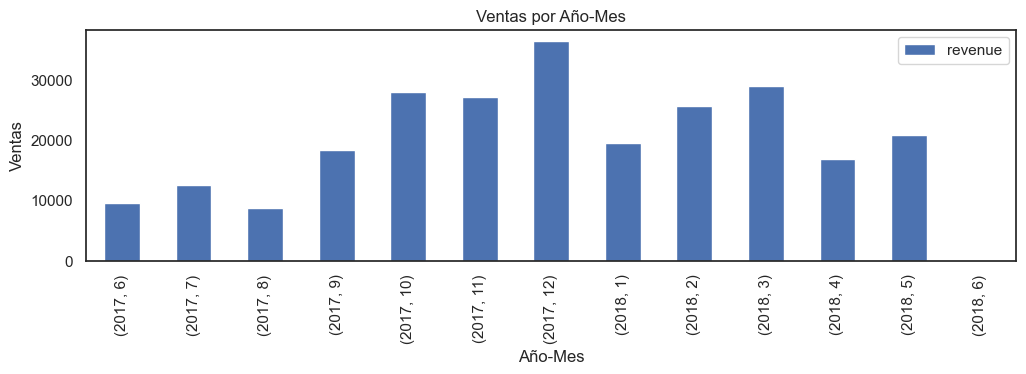

In [429]:
# Gráfica de ventas mensuales

orders_mes.plot(kind='bar', figsize=(12, 3))

plt.title('Ventas por Año-Mes')
plt.xlabel('Año-Mes')
plt.ylabel('Ventas')
plt.xticks(rotation=90)



### **Compras totales y promedio por usuario**

In [430]:
# Compras totales por usuario

orders_usuario = orders.groupby('uid').agg({'revenue': 'sum'}).sort_values(by='revenue', ascending=False)

print('Compras totales por usuario:')

print(orders_usuario)
print()

# Compras promedio por usuario

orders_promedio_usuario = round(orders_usuario['revenue'].mean(),2)

print('Compras promedio por usuario:', orders_promedio_usuario)

Compras totales por usuario:
                       revenue
uid                           
5539673724080479777   11810.18
11149926373378902217  10519.46
17999372575896145244   1979.33
6731421022966725351    1450.68
3644482766749211722    1444.29
...                        ...
6538135401269860305       0.00
1149062814762747892       0.00
2636645662067512510       0.00
9971607959588724150       0.00
15254206642996645755      0.00

[36523 rows x 1 columns]

Compras promedio por usuario: 6.9


### **Conteo de registros con revenue valor $0**

In [431]:
# Revenue valor cero

orders_0 = orders[orders['revenue'] == 0]

print('Compras con valor cero:', orders_0['revenue'].count())

Compras con valor cero: 51


Text(0, 0.5, 'Frecuencia')

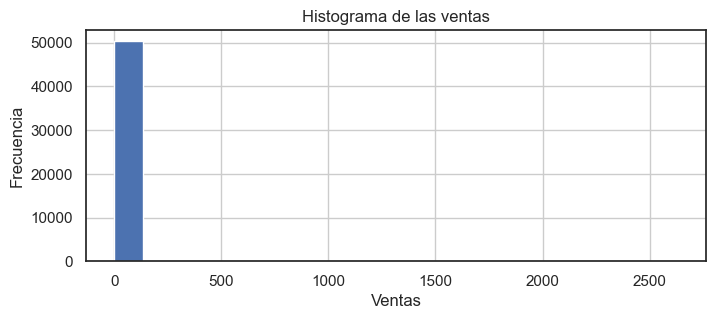

In [432]:
# Histograma de las ventas

orders['revenue'].hist(bins=20, figsize=(8, 3))

plt.title('Histograma de las ventas')
plt.xlabel('Ventas')
plt.ylabel('Frecuencia')


### **Tasa de conversión por source_id**

In [433]:
# Dataset para calculo de Conversion rate

visits['date_visit'] = pd.to_datetime(visits['date_visit'])

orders_source =  orders.merge(visits, left_on=['uid', 'date_order'], right_on=['uid', 'date_visit'], how='inner')

print(orders_source.head(3))

               buy_ts  revenue                   uid  year_order  month_order  \
0 2017-06-01 00:10:00    17.00  10329302124590727494        2017            6   
1 2017-06-01 00:25:00     0.55  11627257723692907447        2017            6   
2 2017-06-01 00:27:00     0.37  17903680561304213844        2017            6   

   week_order date_order  hour_order   device              end_ts  source_id  \
0          22 2017-06-01           0  desktop 2017-06-01 00:11:00          1   
1          22 2017-06-01           0  desktop 2017-06-01 00:25:00          2   
2          22 2017-06-01           0  desktop 2017-06-01 00:34:00          2   

             start_ts  year_visit  month_visit  week_visit date_visit  \
0 2017-06-01 00:09:00        2017            6          22 2017-06-01   
1 2017-06-01 00:14:00        2017            6          22 2017-06-01   
2 2017-06-01 00:25:00        2017            6          22 2017-06-01   

   hour_visit  visit_duration_sec  
0           0            

In [434]:
# Ordenes por source_id

source_orders = orders_source.groupby('source_id').agg({'source_id':'count'})

source_orders.columns=['source_orders']

print(source_orders)

           source_orders
source_id               
1                   9921
2                   8775
3                  10338
4                  11750
5                  11568
7                      1
9                   1180
10                  1495


In [435]:
# Visitas por source

source_visits = visits.groupby('source_id').agg({'source_id':'count'})

source_visits.columns = ['visits_count']

print(source_visits)

           visits_count
source_id              
1                 34121
2                 47626
3                 85610
4                101794
5                 66905
6                     6
7                    36
9                 13277
10                10025


In [436]:
# Calculo de conversion rate

# Unión de datasets

conv_rate_source = source_orders.merge(source_visits, on='source_id')

conv_rate_source['conv_rate_%'] = round((conv_rate_source['source_orders'] / conv_rate_source['visits_count']) * 100,2)

print(conv_rate_source)

           source_orders  visits_count  conv_rate_%
source_id                                          
1                   9921         34121        29.08
2                   8775         47626        18.42
3                  10338         85610        12.08
4                  11750        101794        11.54
5                  11568         66905        17.29
7                      1            36         2.78
9                   1180         13277         8.89
10                  1495         10025        14.91


In [437]:
# Ingreso por source

source_revenue =  orders_source.groupby('source_id').agg(

    revenue = ('revenue','sum'),

    revenue_mean = ('revenue','mean') )

print(source_revenue)

            revenue  revenue_mean
source_id                        
1          63165.14      6.366812
2          69169.15      7.882524
3          42124.75      4.074749
4          48314.91      4.111907
5          57089.68      4.935138
7              1.22      1.220000
9           3802.81      3.222720
10          4367.69      2.921532


In [438]:
# Tabla completa de conversion rate y revenue por source

conv_rate_revenue = conv_rate_source.merge(source_revenue, on='source_id')

print('Conversion Rate y Revenue por source_id:')

print()

print(conv_rate_revenue)

Conversion Rate y Revenue por source_id:

           source_orders  visits_count  conv_rate_%   revenue  revenue_mean
source_id                                                                  
1                   9921         34121        29.08  63165.14      6.366812
2                   8775         47626        18.42  69169.15      7.882524
3                  10338         85610        12.08  42124.75      4.074749
4                  11750        101794        11.54  48314.91      4.111907
5                  11568         66905        17.29  57089.68      4.935138
7                      1            36         2.78      1.22      1.220000
9                   1180         13277         8.89   3802.81      3.222720
10                  1495         10025        14.91   4367.69      2.921532


### **Prueba de hipótesis**

**Definición de hipótesis nula e hipótesis alternativa**

* **Hipótesis Nula:** "Los ingresos **NO CAMBIAN** cuando los usuarios llegan por una 'source_id' diferente a las 3 de mayor tasa de conversión (1,2,5)".

* **Hipótesis alternativa:** "Los ingresos **CAMBIAN** cuando los usuarios llegan por una 'source_id' diferente a las 3 de mayor tasa de conversión (1,2,5)".

La hipótesis nula se formula asumiendo que los ingresos **NO CAMBIAN** cuando el usuario llega de una 'source_id' diferente a las 3 de mayor tasa de conversión (1,2,5)".

La hipótesis alternativa establece la posible variación.

Se aplica una prueba de Levene para verificar la diferencia entre las varianzas.

Se define una prueba de dos colas de variables independientes ya que ninguna variable tiene influencia sobre la otra.

In [439]:
# Preparar los datos

tasa_top = [1,2,5]

variable_sources_125 = orders_source[orders_source['source_id'].isin(tasa_top)]

variable_sources_others = orders_source[~orders_source['source_id'].isin(tasa_top)]

print(variable_sources_125['source_id'].unique())

print(variable_sources_others['source_id'].unique())

[1 2 5]
[ 3  4  9 10  7]


In [440]:
# Estádisticas básicas de variables

print('Estádisticas básicas "revenue de sources 1, 2, 5":')
print()

print(variable_sources_125['revenue'].describe())
print()

print('Estádisticas básicas "revenue de sources no 1, 2,5.":')
print()

print(variable_sources_others['revenue'].describe())
print()

Estádisticas básicas "revenue de sources 1, 2, 5":

count    30264.000000
mean         6.259053
std         26.482937
min          0.000000
25%          1.470000
50%          2.920000
75%          5.550000
max       2633.280000
Name: revenue, dtype: float64

Estádisticas básicas "revenue de sources no 1, 2,5.":

count    24764.000000
mean         3.982046
std          7.603309
min          0.000000
25%          1.220000
50%          2.440000
75%          4.580000
max        550.000000
Name: revenue, dtype: float64



In [441]:
# Filtro de valores atipicos con método IQR de visitas por tipo de device

# Desktop

Q1_125 = variable_sources_125['revenue'].quantile(0.25)  # Definir cuartil 1

Q3_125 = variable_sources_125['revenue'].quantile(
    0.75)   # Definir cuartil 3

IQR_125 = Q3_125 - Q1_125    # Definir rango intercualtil

limite_inferior_125= Q1_125 - (1.5 * IQR_125)  # Limite inferior

limite_superior_125 = Q3_125 + (1.5 * IQR_125)  # Limite superior

revenue_sin_atipicas_125 = variable_sources_125[(variable_sources_125['revenue'] > limite_inferior_125) & (variable_sources_125['revenue'] < limite_superior_125)]

print('Revenue sources 1, 2, 5 sin valores atípicos:')

print(revenue_sin_atipicas_125['revenue'].describe())

print()

# Others

Q1_others = variable_sources_others['revenue'].quantile(0.25)  # Definir cuartil 1

Q3_others = variable_sources_others['revenue'].quantile(
    0.75)   # Definir cuartil 3

IQR_others = Q3_others - Q1_others    # Definir rango intercualtil

limite_inferior_others = Q1_others - (1.5 * IQR_others)  # Limite inferior

limite_superior_others = Q3_others + (1.5 * IQR_others)  # Limite superior

revenue_sin_atipicas_others = variable_sources_others[(variable_sources_others['revenue'] > limite_inferior_others) & (
    variable_sources_others['revenue'] < limite_superior_others)]

print('Revenue sources NO 1, 2, 5 sin valores atípicos:')

print(revenue_sin_atipicas_others['revenue'].describe())

Revenue sources 1, 2, 5 sin valores atípicos:
count    27392.000000
mean         3.256849
std          2.558266
min          0.000000
25%          1.220000
50%          2.440000
75%          4.580000
max         11.610000
Name: revenue, dtype: float64

Revenue sources NO 1, 2, 5 sin valores atípicos:
count    22838.000000
mean         2.772237
std          2.130284
min          0.000000
25%          1.160000
50%          2.200000
75%          3.670000
max          9.620000
Name: revenue, dtype: float64


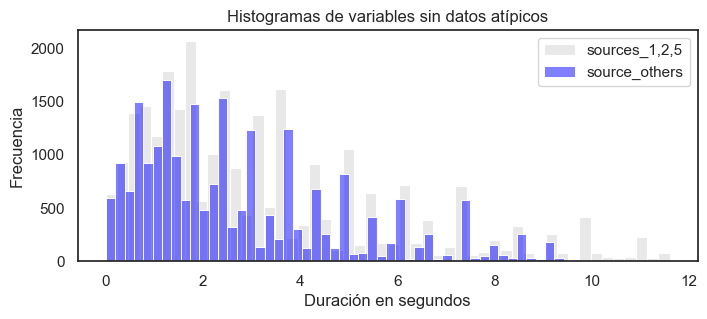

In [442]:
# Histograma de variables sin datos atipicos

plt.figure(figsize=(8, 3))

sns.histplot(revenue_sin_atipicas_125['revenue'], color='lightgray', bins=50, alpha=0.5)

sns.histplot(
    revenue_sin_atipicas_others['revenue'], color='blue', bins=50, alpha=0.5)

plt.title('Histogramas de variables sin datos atípicos')
plt.xlabel('Duración en segundos')
plt.ylabel('Frecuencia')
plt.legend(['sources_1,2,5', 'source_others'])

plt.show()

In [443]:
# Prueba de Levene de igualdad de varianzas

print('Prueba de Levene para comparación de varianzas:')

print()

alpha = 0.05  # Nivel de significancia

# Realizar la prueba
stat, p = st.levene(
    revenue_sin_atipicas_125['revenue'], revenue_sin_atipicas_others['revenue'])

# Imprimir los resultados
print('Estadístico de prueba:', stat)
print('Valor p:', p)
print()

# Si el valor p es menor que un nivel de significancia predefinido (por ejemplo, 0.05), se rechaza la hipótesis nula y se concluye que las varianzas son significativamente diferentes.

if p < alpha:
    print('Las varianzas son significativamente diferentes')
else:
    print('Las varianzas NO son significativamente diferentes')

Prueba de Levene para comparación de varianzas:

Estadístico de prueba: 387.0527697740572
Valor p: 7.644358096959833e-86

Las varianzas son significativamente diferentes


In [444]:
# Prueba de hipótesis

# Las varianzas SI son diferentes

stat, p = st.ttest_ind(
    revenue_sin_atipicas_125['revenue'], revenue_sin_atipicas_others['revenue'], equal_var=False)

print('Estadístico de prueba:', stat)
print('Valor p:', p)
print()

# Si el "valor p" es menor a "alpha" rechazaremos la hipótesis

if p < alpha:
    print("Rechazamos la hipótesis nula: Los ingresos NO CAMBIAN cuando los usuarios llegan por una 'source_id' diferente a las 3 de mayor tasa de conversión (1,2,5).")
else:
    print("No podemos rechazar la hipótesis nula: Los ingresos NO CAMBIAN cuando los usuarios llegan por una 'source_id' diferente a las 3 de mayor tasa de conversión (1,2,5).")

Estadístico de prueba: 23.165260974074332
Valor p: 4.25708730438051e-118

Rechazamos la hipótesis nula: Los ingresos NO CAMBIAN cuando los usuarios llegan por una 'source_id' diferente a las 3 de mayor tasa de conversión (1,2,5).


### **Definición de cohortes de ventas**

**Definición de cohortes**

Se crearán 4 cohortes generales:

* 1.	Conversión_1d: Usuarios que realizan compra el mismo día que se registran. 
* 2.	Conversion_7d: Usuarios que realizan compra en los siguientes 6 días a su registro (no se considera el día de registro).
* 3.	Conversion_30d: Usuarios que realizan compra en los siguientes 30 días a su registro (no se considera el día de registro, ni la primera semana transcurrida a partir del registro).
* 4.	Conversion_mas_30d: Usuarios que realizan compra en más de 30 días a su registro (no se considera el día de registro, ni los primeros 30 días a partir del registro).

Para todos los casos se omiten los pedidos con revenue $0.

Adicional a lo anterior el análisis de cada cohorte contendrá los siguientes comportamientos, ejemplo:

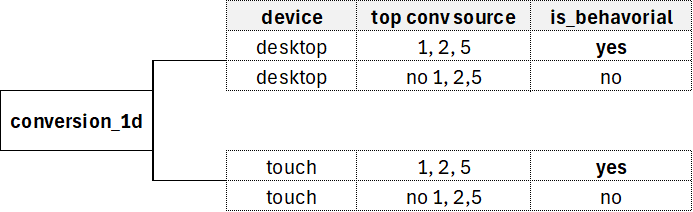

Los datasets serán guardados con los siguientes nombres, ejemplo:

"top_conv_sources": son las sources_id que tienen mejor tasa de conversión e ingreso promedio en sus compras.

* **conversion_1d_desktop_si** = Usuarios que realizan compra el mismo día que se registran, usan ‘desktop’ y llegaron por ‘top_conv_sources’ 1, 2, 5. 

* **conversion_1d_desktop_no** = Usuarios que realizan compra el mismo día que se registran, usan ‘desktop’ y NO llegaron por ‘top_conv_sources’ 1, 2, 5.



#### **Fecha de primer visita**

In [445]:
# Definir la fecha de la primer visita

primera_visit = visits.groupby('uid').agg({'date_visit': 'min'}).reset_index()

print('Fecha de la primer visita:')

print(primera_visit.head())

# Cambiar el nombre de la columna a 'fecha_primera_visita'

primera_visit.columns = ['uid', 'fecha_primera_visita']

print()

print(primera_visit.head())

Fecha de la primer visita:
               uid date_visit
0   11863502262781 2018-03-01
1   49537067089222 2018-02-06
2  297729379853735 2017-06-07
3  313578113262317 2017-09-18
4  325320750514679 2017-09-30

               uid fecha_primera_visita
0   11863502262781           2018-03-01
1   49537067089222           2018-02-06
2  297729379853735           2017-06-07
3  313578113262317           2017-09-18
4  325320750514679           2017-09-30


In [446]:
# Unir la fecha de la primer visita con el dataframe orders

orders = orders.merge(primera_visit, on='uid')

orders['fecha_primera_visita'] = pd.to_datetime(orders['fecha_primera_visita'])  # Convertir a formato fecha

# Validación de la unión

print(orders.head())

print()

print(orders.info())

               buy_ts  revenue                   uid  year_order  month_order  \
0 2017-06-01 00:10:00    17.00  10329302124590727494        2017            6   
1 2017-06-01 00:25:00     0.55  11627257723692907447        2017            6   
2 2017-06-01 00:27:00     0.37  17903680561304213844        2017            6   
3 2017-06-01 00:29:00     0.55  16109239769442553005        2017            6   
4 2017-06-01 07:58:00     0.37  14200605875248379450        2017            6   

   week_order date_order  hour_order fecha_primera_visita  
0          22 2017-06-01           0           2017-06-01  
1          22 2017-06-01           0           2017-06-01  
2          22 2017-06-01           0           2017-06-01  
3          22 2017-06-01           0           2017-06-01  
4          22 2017-06-01           7           2017-06-01  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 9 columns):
 #   Column                Non-Null Count  D

#### **Fecha del primer compra por usuario**

In [447]:
# Fecha de la primer compra

orders['fecha_primer_orden'] = orders.groupby('uid')['date_order'].transform('min') 

orders['fecha_primer_orden'] = pd.to_datetime(orders['fecha_primer_orden'])

print(orders.head())

               buy_ts  revenue                   uid  year_order  month_order  \
0 2017-06-01 00:10:00    17.00  10329302124590727494        2017            6   
1 2017-06-01 00:25:00     0.55  11627257723692907447        2017            6   
2 2017-06-01 00:27:00     0.37  17903680561304213844        2017            6   
3 2017-06-01 00:29:00     0.55  16109239769442553005        2017            6   
4 2017-06-01 07:58:00     0.37  14200605875248379450        2017            6   

   week_order date_order  hour_order fecha_primera_visita fecha_primer_orden  
0          22 2017-06-01           0           2017-06-01         2017-06-01  
1          22 2017-06-01           0           2017-06-01         2017-06-01  
2          22 2017-06-01           0           2017-06-01         2017-06-01  
3          22 2017-06-01           0           2017-06-01         2017-06-01  
4          22 2017-06-01           7           2017-06-01         2017-06-01  


#### **Definir el tiempo entre la primer visita y la primer orden**

In [448]:
# Calcular el tiempo entre la primer compra y las siguientes

orders['tiempo_para_compra_1'] = orders['fecha_primer_orden'] - orders['fecha_primera_visita']

print(orders.head())

               buy_ts  revenue                   uid  year_order  month_order  \
0 2017-06-01 00:10:00    17.00  10329302124590727494        2017            6   
1 2017-06-01 00:25:00     0.55  11627257723692907447        2017            6   
2 2017-06-01 00:27:00     0.37  17903680561304213844        2017            6   
3 2017-06-01 00:29:00     0.55  16109239769442553005        2017            6   
4 2017-06-01 07:58:00     0.37  14200605875248379450        2017            6   

   week_order date_order  hour_order fecha_primera_visita fecha_primer_orden  \
0          22 2017-06-01           0           2017-06-01         2017-06-01   
1          22 2017-06-01           0           2017-06-01         2017-06-01   
2          22 2017-06-01           0           2017-06-01         2017-06-01   
3          22 2017-06-01           0           2017-06-01         2017-06-01   
4          22 2017-06-01           7           2017-06-01         2017-06-01   

  tiempo_para_compra_1  
0      

In [449]:
# Mascaras device y source_id

mascara_desktop = visits[visits['device'] == 'desktop']

mascara_touch = visits[visits['device'] == 'touch']

top_sources = [1, 2, 5]

mascara_top_sources = visits[visits['source_id'].isin(top_sources)]

mascara_not_top_sources = visits[~visits['source_id'].isin(top_sources)]

# Validación de las máscaras

print('Mascara "desktop":', mascara_desktop['device'].unique())

print('Mascara "touch":', mascara_touch['device'].unique())

print('Mascara "top_sources":', mascara_top_sources['source_id'].unique())

print('Mascara "no_top_sources":', mascara_not_top_sources['source_id'].unique())

Mascara "desktop": ['desktop']
Mascara "touch": ['touch']
Mascara "top_sources": [2 5 1]
Mascara "no_top_sources": [ 4  9  3 10  7  6]


#### **Cohorte 1: conversion_1d**

Usuarios que realizan compra el mismo día que se registran

Se omiten los pedidos con revenue $0

In [450]:
# Filtro del cohorte

conversion_1d =  orders[(orders['revenue'] != 0) & (orders['tiempo_para_compra_1'] == '0 days')]

print('Muestra cohorte "conversion_1d":', conversion_1d.head())

Muestra cohorte "conversion_1d":                buy_ts  revenue                   uid  year_order  month_order  \
0 2017-06-01 00:10:00    17.00  10329302124590727494        2017            6   
1 2017-06-01 00:25:00     0.55  11627257723692907447        2017            6   
2 2017-06-01 00:27:00     0.37  17903680561304213844        2017            6   
3 2017-06-01 00:29:00     0.55  16109239769442553005        2017            6   
4 2017-06-01 07:58:00     0.37  14200605875248379450        2017            6   

   week_order date_order  hour_order fecha_primera_visita fecha_primer_orden  \
0          22 2017-06-01           0           2017-06-01         2017-06-01   
1          22 2017-06-01           0           2017-06-01         2017-06-01   
2          22 2017-06-01           0           2017-06-01         2017-06-01   
3          22 2017-06-01           0           2017-06-01         2017-06-01   
4          22 2017-06-01           7           2017-06-01         2017-06-01   


In [451]:
# Tamaño del cohorte sin behavior

conversion_1d_size = conversion_1d['uid'].nunique()

print('Validación del tiempo de compra:', 'Min:', conversion_1d['tiempo_para_compra_1'].min(
), 'Max:', conversion_1d['tiempo_para_compra_1'].max())

Validación del tiempo de compra: Min: 0 days 00:00:00 Max: 0 days 00:00:00


In [452]:
# Filtro del cohorte is_behavorial desktop

conversion_1d_desktop_si = conversion_1d[(conversion_1d['uid'].isin(mascara_desktop['uid'])) & (conversion_1d['uid'].isin(mascara_top_sources['uid']))]  

conversion_1d_desktop_no = conversion_1d[~conversion_1d['uid'].isin(mascara_desktop['uid']) & (~conversion_1d['uid'].isin(mascara_top_sources['uid']))]

# Tamaño de los cohortes

print('Tamaño del cohorte "conversion_1d_desktop_si":', conversion_1d_desktop_si['uid'].nunique())

print('Tamaño del cohorte "conversion_1d_desktop_no":', conversion_1d_desktop_no['uid'].nunique())

Tamaño del cohorte "conversion_1d_desktop_si": 10247
Tamaño del cohorte "conversion_1d_desktop_no": 1990


In [453]:
# Filtro del cohorte is_behavorial touch

conversion_1d_touch_si = conversion_1d[conversion_1d['uid'].isin(
    mascara_touch['uid']) & (conversion_1d['uid'].isin(mascara_top_sources['uid']))]

conversion_1d_touch_no = conversion_1d[~conversion_1d['uid'].isin(
    mascara_touch['uid']) & (~conversion_1d['uid'].isin(mascara_top_sources['uid']))]

# Tamaño de los cohortes

print('Tamaño del cohorte "conversion_1d_touch_si":',
      conversion_1d_touch_si['uid'].nunique())

print('Tamaño del cohorte "conversion_1d_touch_no":',
      conversion_1d_touch_no['uid'].nunique())

Tamaño del cohorte "conversion_1d_touch_si": 2813
Tamaño del cohorte "conversion_1d_touch_no": 10449


#### **Cohorte 2: conversion_7d**

Usuarios que realizan compra en los siguientes 6 días a su registro (no se considera el día de registro).

Se omiten los pedidos con revenue $0

In [454]:
# Filtro del cohorte

conversion_7d =  orders[(orders['revenue'] != 0) & (orders['tiempo_para_compra_1'] > '0 days') & (orders['tiempo_para_compra_1'] <= '7 days')]

print('Muestra cohorte "conversion_7d":', conversion_7d.sample(5))

Muestra cohorte "conversion_7d":                    buy_ts  revenue                   uid  year_order  \
41389 2018-03-23 16:38:00     0.49   5464390933675232391        2018   
31128 2018-01-26 11:57:00     0.85  13454960138564339304        2018   
17831 2017-11-16 12:17:00     0.49   7391944494990969025        2017   
20390 2017-11-27 10:10:00     0.12   3263486045884611639        2017   
39711 2018-03-13 10:12:00     1.83   4315332302063390287        2018   

       month_order  week_order date_order  hour_order fecha_primera_visita  \
41389            3          12 2018-03-23          16           2018-02-12   
31128            1           4 2018-01-26          11           2018-01-10   
17831           11          46 2017-11-16          12           2017-11-13   
20390           11          48 2017-11-27          10           2017-06-01   
39711            3          11 2018-03-13          10           2018-03-08   

      fecha_primer_orden tiempo_para_compra_1  
41389         201

In [455]:
# Tamaño del cohorte sin behavior

conversion_7d_size = conversion_7d['uid'].nunique()

print('Validación del tiempo de compra:', 'Min:', conversion_7d['tiempo_para_compra_1'].min(
), 'max:', conversion_7d['tiempo_para_compra_1'].max())

Validación del tiempo de compra: Min: 1 days 00:00:00 max: 7 days 00:00:00


In [456]:
# Filtro del cohorte is_behavorial desktop

conversion_7d_desktop_si = conversion_7d[conversion_7d['uid'].isin(
    mascara_desktop['uid']) & (conversion_7d['uid'].isin(mascara_top_sources['uid']))]

conversion_7d_desktop_no = conversion_7d[~conversion_7d['uid'].isin(
    mascara_desktop['uid']) & (conversion_7d['uid'].isin(mascara_top_sources['uid']))]

# Tamaño de los cohortes

print('Tamaño del cohorte "conversion_7d_desktop_si":',
      conversion_7d_desktop_si['uid'].nunique())

print('Tamaño del cohorte "conversion_7d_desktop_no":',
      conversion_7d_desktop_no['uid'].nunique())

Tamaño del cohorte "conversion_7d_desktop_si": 2233
Tamaño del cohorte "conversion_7d_desktop_no": 543


In [457]:
# Filtro del cohorte is_behavorial touch

conversion_7d_touch_si = conversion_7d[conversion_7d['uid'].isin(
    mascara_touch['uid']) & (conversion_7d['uid'].isin(mascara_top_sources['uid']))]

conversion_7d_touch_no = conversion_7d[~conversion_7d['uid'].isin(
    mascara_touch['uid']) & (conversion_7d['uid'].isin(mascara_top_sources['uid']))]

# Tamaño de los cohortes

print('Tamaño del cohorte "conversion_1d_touch_si":',
      conversion_7d_touch_si['uid'].nunique())

print('Tamaño del cohorte "conversion_1d_touch_no":',
      conversion_7d_touch_no['uid'].nunique())

Tamaño del cohorte "conversion_1d_touch_si": 960
Tamaño del cohorte "conversion_1d_touch_no": 1816


#### **Cohorte 3: conversion_30d**

Usuarios que realizan compra en los siguientes 30 días a su registro (no se considera el día de registro, ni la primer semana transcurrida a partir del registro).

Se omiten los pedidos con revenue $0

In [458]:
# Filtro del cohorte

conversion_30d =  orders[(orders['revenue'] != 0) & (orders['tiempo_para_compra_1'] > '7 days') & (orders['tiempo_para_compra_1'] <= '30 days')]

print('Muestra cohorte "conversion_30d":', conversion_30d.sample(5))

Muestra cohorte "conversion_30d":                    buy_ts  revenue                   uid  year_order  \
7112  2017-09-07 15:09:00     2.20  18125154910681023329        2017   
22277 2017-12-06 11:22:00     2.99   5139615590553126732        2017   
18431 2017-11-19 18:48:00     3.05   9995330795107805910        2017   
31950 2018-01-30 21:04:00     0.87   8714875147958786287        2018   
32243 2018-02-01 11:34:00     1.10   9108241539709466411        2018   

       month_order  week_order date_order  hour_order fecha_primera_visita  \
7112             9          36 2017-09-07          15           2017-08-17   
22277           12          49 2017-12-06          11           2017-06-14   
18431           11          46 2017-11-19          18           2017-10-26   
31950            1           5 2018-01-30          21           2018-01-04   
32243            2           5 2018-02-01          11           2018-01-13   

      fecha_primer_orden tiempo_para_compra_1  
7112          20

In [459]:
# Tamaño del cohorte sin behavior

conversion_30d_size = conversion_30d['uid'].nunique()

print('Validación del tiempo de compra:', 'Min:', conversion_30d['tiempo_para_compra_1'].min(
), 'max:', conversion_30d['tiempo_para_compra_1'].max())

Validación del tiempo de compra: Min: 8 days 00:00:00 max: 30 days 00:00:00


In [460]:
# Filtro del cohorte is_behavorial desktop

conversion_30d_desktop_si = conversion_30d[conversion_30d['uid'].isin(
    mascara_desktop['uid']) & (conversion_30d['uid'].isin(mascara_top_sources['uid']))]

conversion_30d_desktop_no = conversion_30d[~conversion_30d['uid'].isin(
    mascara_desktop['uid']) & (conversion_30d['uid'].isin(mascara_top_sources['uid']))]

# Tamaño de los cohortes

print('Tamaño del cohorte "conversion_30d_desktop_si":',
      conversion_30d_desktop_si['uid'].nunique())

print('Tamaño del cohorte "conversion_30d_desktop_no":',
      conversion_30d_desktop_no['uid'].nunique())

Tamaño del cohorte "conversion_30d_desktop_si": 1250
Tamaño del cohorte "conversion_30d_desktop_no": 254


In [461]:
# Filtro del cohorte is_behavorial touch

conversion_30d_touch_si = conversion_30d[conversion_30d['uid'].isin(
    mascara_touch['uid']) & (conversion_30d['uid'].isin(mascara_top_sources['uid']))]

conversion_30d_touch_no = conversion_30d[~conversion_30d['uid'].isin(
    mascara_touch['uid']) & (conversion_30d['uid'].isin(mascara_top_sources['uid']))]

# Tamaño de los cohortes

print('Tamaño del cohorte "conversion_30d_touch_si":',
      conversion_30d_touch_si['uid'].nunique())

print('Tamaño del cohorte "conversion_30d_touch_no":',
      conversion_30d_touch_no['uid'].nunique())

Tamaño del cohorte "conversion_30d_touch_si": 516
Tamaño del cohorte "conversion_30d_touch_no": 988


#### **Cohorte 4: conversion_mas_30d**

Usuarios que realizan compra en más de 30 días a su registro (no se considera el día de registro, ni los primeros 30 días a partir del registro).

Se omiten los pedidos con revenue $0

In [462]:
# Filtro del cohorte

conversion_mas_30d =  orders[(orders['revenue'] != 0) & (orders['tiempo_para_compra_1'] > '30 days')]

print('Muestra cohorte "conversion_mas_30d":', conversion_mas_30d.sample(5))

Muestra cohorte "conversion_mas_30d":                    buy_ts  revenue                   uid  year_order  \
28393 2018-01-07 09:31:00     3.05  13160389197288431025        2018   
18167 2017-11-17 21:15:00    11.92   6355667023144757126        2017   
29652 2018-01-16 16:24:00     2.20   6121327041270917515        2018   
26823 2017-12-28 23:10:00     3.05  14606984895138911320        2017   
27702 2018-01-02 16:23:00     0.73  14660292361419771918        2018   

       month_order  week_order date_order  hour_order fecha_primera_visita  \
28393            1           1 2018-01-07           9           2017-06-01   
18167           11          46 2017-11-17          21           2017-08-29   
29652            1           3 2018-01-16          16           2017-06-12   
26823           12          52 2017-12-28          23           2017-11-04   
27702            1           1 2018-01-02          16           2017-10-18   

      fecha_primer_orden tiempo_para_compra_1  
28393       

In [463]:
# Tamaño del cohorte sin behavior

conversion_mas_30d_size = conversion_mas_30d['uid'].nunique()

print('Validación del tiempo de compra:', 'Min:', conversion_mas_30d['tiempo_para_compra_1'].min(
), 'max:', conversion_mas_30d['tiempo_para_compra_1'].max())

Validación del tiempo de compra: Min: 31 days 00:00:00 max: 363 days 00:00:00


In [464]:
# Filtro del cohorte is_behavorial desktop

conversion_mas_30d_desktop_si = conversion_mas_30d[conversion_mas_30d['uid'].isin(
    mascara_desktop['uid']) & (conversion_mas_30d['uid'].isin(mascara_top_sources['uid']))]

conversion_mas_30d_desktop_no = conversion_mas_30d[~conversion_mas_30d['uid'].isin(
    mascara_desktop['uid']) & (conversion_mas_30d['uid'].isin(mascara_top_sources['uid']))]

# Tamaño de los cohortes

print('Tamaño del cohorte "conversion_mas_30d_desktop_si":',
      conversion_mas_30d_desktop_si['uid'].nunique())

print('Tamaño del cohorte "conversion_mas_30d_desktop_no":',
      conversion_mas_30d_desktop_no['uid'].nunique())

Tamaño del cohorte "conversion_mas_30d_desktop_si": 2941
Tamaño del cohorte "conversion_mas_30d_desktop_no": 405


In [465]:
# Filtro del cohorte is_behavorial touch

conversion_mas_30d_touch_si = conversion_mas_30d[conversion_mas_30d['uid'].isin(
    mascara_touch['uid']) & (conversion_mas_30d['uid'].isin(mascara_top_sources['uid']))]

conversion_mas_30d_touch_no = conversion_mas_30d[~conversion_mas_30d['uid'].isin(
    mascara_touch['uid']) & (conversion_30d['uid'].isin(mascara_top_sources['uid']))]

# Tamaño de los cohortes

print('Tamaño del cohorte "conversion_mas_30d_touch_si":',
      conversion_mas_30d_touch_si['uid'].nunique())

print('Tamaño del cohorte "conversion_mas_30d_touch_no":',
      conversion_mas_30d_touch_no['uid'].nunique())

Tamaño del cohorte "conversion_mas_30d_touch_si": 1220
Tamaño del cohorte "conversion_mas_30d_touch_no": 0


C:\Users\the_o\AppData\Local\Temp\ipykernel_5104\302675476.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  conversion_mas_30d_touch_no = conversion_mas_30d[~conversion_mas_30d['uid'].isin(


In [466]:
# Ingresos por cohortes


print('Ingreso cohorte conversion_1d: $', round((conversion_1d_desktop_si['revenue'].sum() + conversion_1d_desktop_no['revenue'].sum() +
                                            conversion_1d_touch_si['revenue'].sum() + conversion_1d_desktop_no['revenue'].sum()),2))
      
print('Ingreso cohorte conversion_7d: $', round((conversion_7d_desktop_si['revenue'].sum() + conversion_7d_desktop_no['revenue'].sum() +
                                            conversion_7d_touch_si['revenue'].sum() + conversion_7d_desktop_no['revenue'].sum()),2))
      
print('Ingreso cohorte conversion_30d: $', round((conversion_30d_desktop_si['revenue'].sum() + conversion_30d_desktop_no['revenue'].sum() +
                                            conversion_30d_touch_si['revenue'].sum() + conversion_30d_desktop_no['revenue'].sum()),2))
      
print('Ingreso cohorte conversion_mas_30d: $', round((conversion_mas_30d_desktop_si['revenue'].sum() + conversion_mas_30d_desktop_no['revenue'].sum() +
                                            conversion_mas_30d_touch_si['revenue'].sum() + conversion_mas_30d_desktop_no['revenue'].sum()), 2))

Ingreso cohorte conversion_1d: $ 119187.55
Ingreso cohorte conversion_7d: $ 38218.61
Ingreso cohorte conversion_30d: $ 32650.78
Ingreso cohorte conversion_mas_30d: $ 50785.07


### **Observaciones cohortes a analizar**

Para el análisis de los cohortes a detalle se realizará sobre los 2 cohortes con mayores ingresos de ventas:

1. Cohorte: conversion_1d con ingresos de $119,187.55
2. Cohorte: conversion_mas_30d con ingresos de $50,785.07

Importante: para el caso del cohorte 'conversion_mas_30d', no existieron clientes cumplieran con el comportamiento 'touch - no top sources', es decir, no hay clientes que usaron el dispositivo 'touch' y llegaran de 'source_id' diferentes a 1,2,5.

### **Análisis Cohortes**

#### **Cohorte: conversion_1d_desktop_si**

**conversion_1d_desktop_si** = Usuarios que realizan compra el mismo día que se registran, usan ‘desktop’ y llegaron por ‘sources’ 1, 2, 5. 



##### **Compras realizadas por cohorte**

Número total de compras: 15481

Compras realizadas por mes (conversion_1d_desktop_si):
                        date_order
year_order month_order            
2017       6                   977
           7                   900
           8                   732
           9                  1170
           10                 1999
           11                 1744
           12                 1758
2018       1                  1292
           2                  1376
           3                  1399
           4                   908
           5                  1226



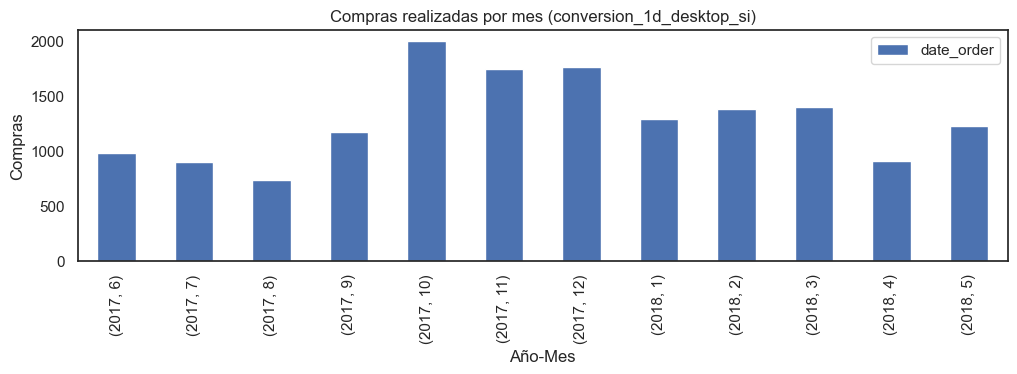

Compras promedio realizadas: date_order    1290.0
dtype: float64


In [467]:
# Total de compras

total_compras_1d_desktop_si = conversion_1d_desktop_si['date_order'].count()

print('Número total de compras:', total_compras_1d_desktop_si)

print()

# Número de compras realizadas por mes

compras_1d_desktop_si = conversion_1d_desktop_si.groupby(['year_order','month_order']).agg({'date_order': 'count'})

print('Compras realizadas por mes (conversion_1d_desktop_si):')

print(compras_1d_desktop_si)

print()

# Gráfica de compras realizadas por mes

compras_1d_desktop_si.plot(kind='bar', figsize=(12, 3))

plt.title('Compras realizadas por mes (conversion_1d_desktop_si)')

plt.xlabel('Año-Mes')

plt.ylabel('Compras')

plt.xticks(rotation=90)

plt.show()

# Compras promedio realizadas

mean_compras_1d_desktop_si = conversion_1d_desktop_si.groupby(
    ['year_order', 'month_order']).agg({'date_order': 'count'}).mean()

print('Compras promedio realizadas:', round(mean_compras_1d_desktop_si))


##### **Usuarios por mes**

Usuarios únicos por mes (conversion_1d_desktop_si):
                         uid
year_order month_order      
2017       6             791
           7             702
           8             538
           9             918
           10           1554
           11           1325
           12           1308
2018       1             997
           2            1044
           3            1005
           4             723
           5             939



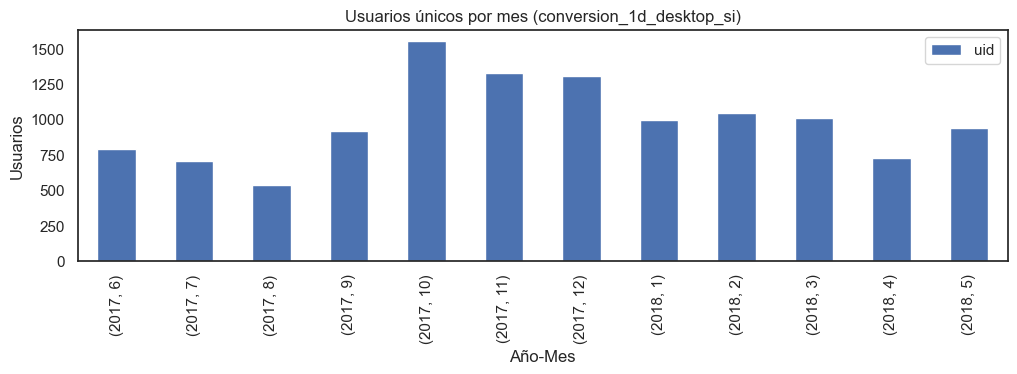

Usuarios unicos promedio: uid    987.0
dtype: float64


In [468]:
# Usuarios únicos por mes

usuarios_unicos_1d_desktop_si = conversion_1d_desktop_si.groupby(['year_order','month_order']).agg({'uid': 'nunique'})

print('Usuarios únicos por mes (conversion_1d_desktop_si):')

print(usuarios_unicos_1d_desktop_si)

print()

# Gráfica de usuarios únicos por mes

usuarios_unicos_1d_desktop_si.plot(kind='bar', figsize=(12, 3))

plt.title('Usuarios únicos por mes (conversion_1d_desktop_si)')

plt.xlabel('Año-Mes')

plt.ylabel('Usuarios')

plt.xticks(rotation=90)

plt.show()

# Usuarios unicos promedio

mean_usuarios_unicos_1d_desktop_si = conversion_1d_desktop_si.groupby(['year_order', 'month_order']).agg({'uid': 'nunique'}).mean()

print('Usuarios unicos promedio:', mean_usuarios_unicos_1d_desktop_si)

##### **Compras por usuario**

In [469]:
# Número de compras por usuario

compras_usuario_1d_desktop_si = conversion_1d_desktop_si.groupby(['uid']).agg(
    {'date_order': 'count'}).sort_values(by='date_order', ascending=False)

print('Compras por usuario (conversion_1d_desktop_si):')

print(compras_usuario_1d_desktop_si)

print()


Compras por usuario (conversion_1d_desktop_si):
                      date_order
uid                             
3644482766749211722          239
13888745432979765063         238
10116135452198588850         124
6166747268563050393          117
6948781160947906362          115
...                          ...
18388644833728037058           1
18393687821976040090           1
18397039008941125340           1
18400875473614053444           1
18402647411761710187           1

[10247 rows x 1 columns]



##### **Revenue por mes**

Total revenue: $ 84107.33

                         revenue
year_order month_order          
2017       6             4490.66
           7             4756.16
           8             3720.78
           9             6366.20
           10           11671.28
           11            8543.72
           12            8995.43
2018       1             5335.97
           2             8784.38
           3             9751.45
           4             5066.81
           5             6624.49



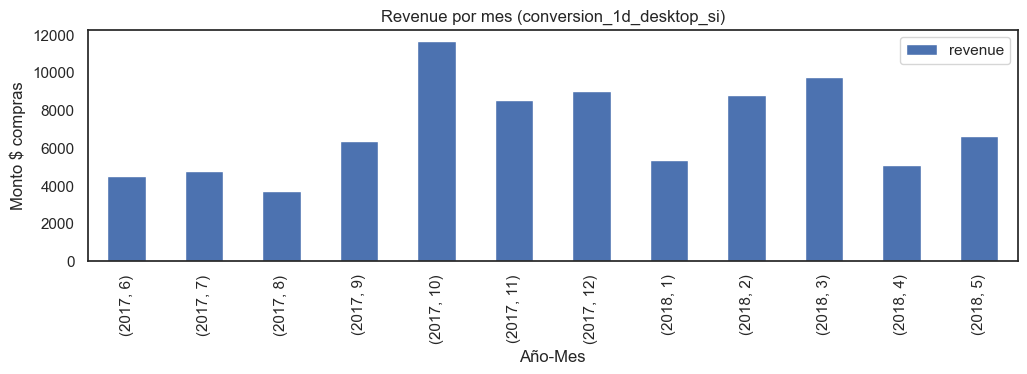

Revenue promedio: revenue    7009.0
dtype: float64


In [470]:
# Total de revenue

total_revenue_1d_desktop_si = round(conversion_1d_desktop_si['revenue'].sum(),2)

print('Total revenue: $', total_revenue_1d_desktop_si)

print()

# Monto de compras realizadas por mes

revenue_1d_desktop_si = conversion_1d_desktop_si.groupby(
    ['year_order', 'month_order']).agg({'revenue': 'sum'})

print(revenue_1d_desktop_si)

print()

# Gráfica de revenue por mes

revenue_1d_desktop_si.plot(kind='bar', figsize=(12, 3))

plt.title('Revenue por mes (conversion_1d_desktop_si)')

plt.xlabel('Año-Mes')

plt.ylabel('Monto $ compras')

plt.xticks(rotation=90)

plt.show()

# Revenue promedio

mean_revenue_1d_desktop_si = conversion_1d_desktop_si.groupby(
    ['year_order', 'month_order']).agg({'revenue': 'sum'}).mean()

print('Revenue promedio:', round(mean_revenue_1d_desktop_si))

##### **Revenue por usuario**

In [471]:
# Revenue compras por usuario

revenue_usuario_1d_desktop_si = conversion_1d_desktop_si.groupby(['uid']).agg(
    {'revenue': 'sum'}).sort_values(by='revenue', ascending=False)

print('Revenue por usuario (conversion_1d_desktop_si):')

print(revenue_usuario_1d_desktop_si)

print()

Revenue por usuario (conversion_1d_desktop_si):
                       revenue
uid                           
11149926373378902217  10519.46
3644482766749211722    1444.29
13888745432979765063   1191.02
1668300487562478408    1163.63
9667577658644269267     695.84
...                        ...
6406274186885396310       0.06
9899461113622751389       0.03
9806743452190840868       0.03
3064658951185966160       0.03
12260021690862624113      0.03

[10247 rows x 1 columns]



In [472]:
# Revenue promedio por usuario

revenue_promedio_usuario_1d_desktop_si = round(
    revenue_usuario_1d_desktop_si['revenue'].mean(), 2)

print('Revenue promedio por usuario (conversion_1d):',
      revenue_promedio_usuario_1d_desktop_si)

Revenue promedio por usuario (conversion_1d): 8.21


##### **Tasa de retención**

In [473]:
# Calcular la semana del ciclo de vida del usuario mensual

conversion_1d_desktop_si['order_month'] = pd.to_datetime(
    conversion_1d_desktop_si['date_order'].dt.to_period('M').dt.to_timestamp())

conversion_1d_desktop_si['primer_order_month'] = pd.to_datetime(conversion_1d_desktop_si['fecha_primer_orden'].dt.to_period('M').dt.to_timestamp())

conversion_1d_desktop_si['cohort_lifetime'] = (
    conversion_1d_desktop_si['order_month'].dt.to_period('M') - conversion_1d_desktop_si['primer_order_month'].dt.to_period('M'))

conversion_1d_desktop_si['cohort_lifetime'] = conversion_1d_desktop_si['cohort_lifetime'].apply(lambda x: x.n)

conversion_1d_desktop_si['cohort_lifetime'] = conversion_1d_desktop_si['cohort_lifetime'].astype(
    int)

print(conversion_1d_desktop_si.head(3))
print()
print(conversion_1d_desktop_si.cohort_lifetime.unique())

               buy_ts  revenue                   uid  year_order  month_order  \
0 2017-06-01 00:10:00    17.00  10329302124590727494        2017            6   
1 2017-06-01 00:25:00     0.55  11627257723692907447        2017            6   
2 2017-06-01 00:27:00     0.37  17903680561304213844        2017            6   

   week_order date_order  hour_order fecha_primera_visita fecha_primer_orden  \
0          22 2017-06-01           0           2017-06-01         2017-06-01   
1          22 2017-06-01           0           2017-06-01         2017-06-01   
2          22 2017-06-01           0           2017-06-01         2017-06-01   

  tiempo_para_compra_1 order_month primer_order_month  cohort_lifetime  
0               0 days  2017-06-01         2017-06-01                0  
1               0 days  2017-06-01         2017-06-01                0  
2               0 days  2017-06-01         2017-06-01                0  

[ 0  1  2  3  4  5  6  7  8  9 10 11]


C:\Users\the_o\AppData\Local\Temp\ipykernel_5104\1115626571.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion_1d_desktop_si['order_month'] = pd.to_datetime(
C:\Users\the_o\AppData\Local\Temp\ipykernel_5104\1115626571.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion_1d_desktop_si['primer_order_month'] = pd.to_datetime(conversion_1d_desktop_si['fecha_primer_orden'].dt.to_period('M').dt.to_timestamp())
C:\Users\the_o\AppData\Local\Temp\ipykernel_5104\1115626571.py:8: SettingWithCopyW

In [474]:
# Función para calcular la retención de usuarios

def printRetetionRate(df):

    cohorts = (df.groupby(['primer_order_month', 'cohort_lifetime'], as_index=False).agg({'uid': 'nunique'}).sort_values(by=['primer_order_month','cohort_lifetime']))

    initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['primer_order_month','uid']]

    initial_users_count = initial_users_count.rename(columns={'uid': 'cohort_users'})

    cohorts = cohorts.merge(initial_users_count, on='primer_order_month')

    cohorts['retention'] = round((cohorts['uid'] / cohorts['cohort_users']),2)

    return cohorts


In [475]:
# Retención de usuarios por cohort lifetime

# Aplicar función printRetetionRate

cohort_1d_desktop_si = printRetetionRate(conversion_1d_desktop_si)

# Tabla dinámica

pivot_cohort_1d_desktop_si = cohort_1d_desktop_si.pivot_table(index='primer_order_month',
                                 columns='cohort_lifetime', values='retention', aggfunc='mean')

pivot_cohort_1d_desktop_si = pivot_cohort_1d_desktop_si.fillna('')

print(pivot_cohort_1d_desktop_si)


cohort_lifetime      0     1     2     3     4     5     6     7     8     9   \
primer_order_month                                                              
2017-06-01          1.0  0.04  0.03  0.04  0.06  0.05  0.05  0.03  0.04  0.03   
2017-07-01          1.0  0.03  0.03  0.03  0.03  0.02  0.02  0.02  0.02  0.01   
2017-08-01          1.0  0.04  0.03  0.04  0.03  0.02  0.02  0.03  0.01  0.02   
2017-09-01          1.0  0.06  0.04  0.04  0.02  0.02  0.03  0.01  0.02         
2017-10-01          1.0  0.05  0.03  0.03  0.03  0.02  0.02  0.01               
2017-11-01          1.0  0.06  0.04  0.02  0.02  0.01  0.02                     
2017-12-01          1.0  0.03  0.02  0.03  0.01  0.02                           
2018-01-01          1.0  0.04  0.03  0.01  0.02                                 
2018-02-01          1.0  0.03  0.02  0.01                                       
2018-03-01          1.0  0.03  0.01                                             
2018-04-01          1.0  0.0

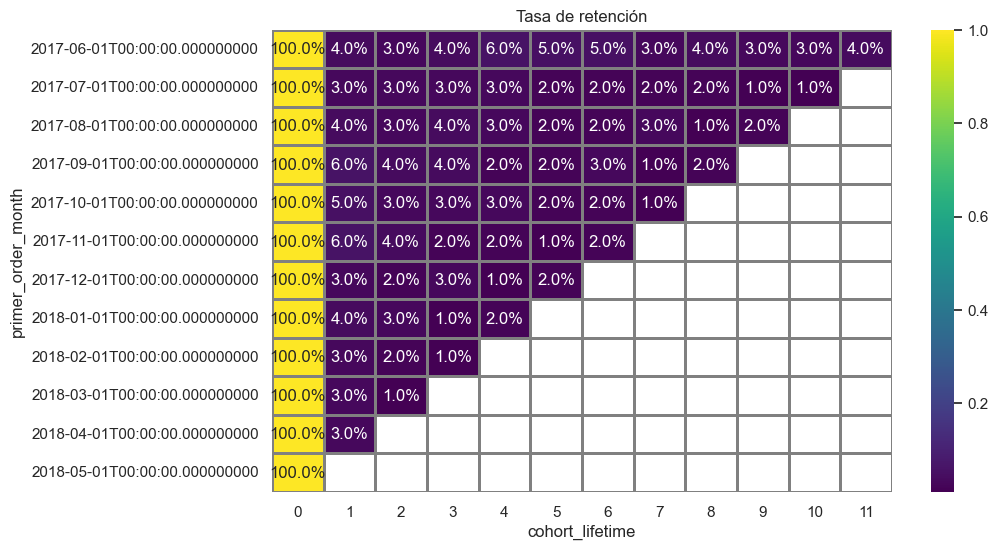

In [476]:
# Crear mapa de calor de la tasa de retención

pivot_cohort_1d_desktop_si = cohort_1d_desktop_si.pivot_table(index='primer_order_month',
                                                              columns='cohort_lifetime', values='retention', aggfunc='mean')

sns.set(style='white')

plt.figure(figsize=(10, 6))

plt.title('Tasa de retención')

sns.heatmap(pivot_cohort_1d_desktop_si, annot=True, fmt='.1%',
            linewidths=1, linecolor='gray', cmap='viridis')

plt.show()

##### **Tasa de cancelación**

In [477]:
# Agrupación por primer_order_month y uid

grupo_cancelacion_1d_desktop_si = (conversion_1d_desktop_si.groupby(['primer_order_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index())

# Recuento inicial de usuarios

usuarios_iniciales_1d_desktop_si = grupo_cancelacion_1d_desktop_si[grupo_cancelacion_1d_desktop_si['cohort_lifetime'] == 0][['primer_order_month', 'uid']]

usuarios_iniciales_1d_desktop_si = usuarios_iniciales_1d_desktop_si.rename(columns={'uid':'cohort_users'})

# Unión con la agrupación

grupo_cancelacion_1d_desktop_si = grupo_cancelacion_1d_desktop_si.merge(usuarios_iniciales_1d_desktop_si, on='primer_order_month')

# Aplicar pct_change()

grupo_cancelacion_1d_desktop_si['churn_rate'] = grupo_cancelacion_1d_desktop_si.groupby(['primer_order_month'])['uid'].pct_change().round(2)

print(grupo_cancelacion_1d_desktop_si.head())

  primer_order_month  cohort_lifetime  uid  cohort_users  churn_rate
0         2017-06-01                0  791           791         NaN
1         2017-06-01                1   35           791       -0.96
2         2017-06-01                2   25           791       -0.29
3         2017-06-01                3   32           791        0.28
4         2017-06-01                4   47           791        0.47


In [478]:
# Tabla dinámica

churn_pivot_1d_desktop_si = grupo_cancelacion_1d_desktop_si.pivot_table(index='primer_order_month', columns='cohort_lifetime', values='churn_rate', aggfunc='sum')

churn_pivot_1d_desktop_si = churn_pivot_1d_desktop_si.fillna('')

print(churn_pivot_1d_desktop_si)

cohort_lifetime      0     1     2     3     4     5     6     7     8     9   \
primer_order_month                                                              
2017-06-01          0.0 -0.96 -0.29  0.28  0.47 -0.19 -0.03 -0.35  0.33 -0.22   
2017-07-01          0.0 -0.97 -0.09  0.05  0.05 -0.41 -0.08  0.08  0.15  -0.4   
2017-08-01          0.0 -0.96 -0.33  0.29 -0.28 -0.31   0.0  0.78 -0.75   2.0   
2017-09-01          0.0 -0.94 -0.28 -0.16 -0.59  0.62   0.1 -0.65  0.88         
2017-10-01          0.0 -0.95 -0.42 -0.09  0.03  -0.2 -0.22 -0.24               
2017-11-01          0.0 -0.94 -0.34 -0.43  0.08 -0.42  0.53                     
2017-12-01          0.0 -0.97 -0.23  0.22 -0.55   0.2                           
2018-01-01          0.0 -0.96  -0.2 -0.67  0.62                                 
2018-02-01          0.0 -0.97 -0.44 -0.47                                       
2018-03-01          0.0 -0.97 -0.56                                             
2018-04-01          0.0 -0.9

<Axes: title={'center': 'Tasa de cancelación'}, xlabel='cohort_lifetime', ylabel='primer_order_month'>

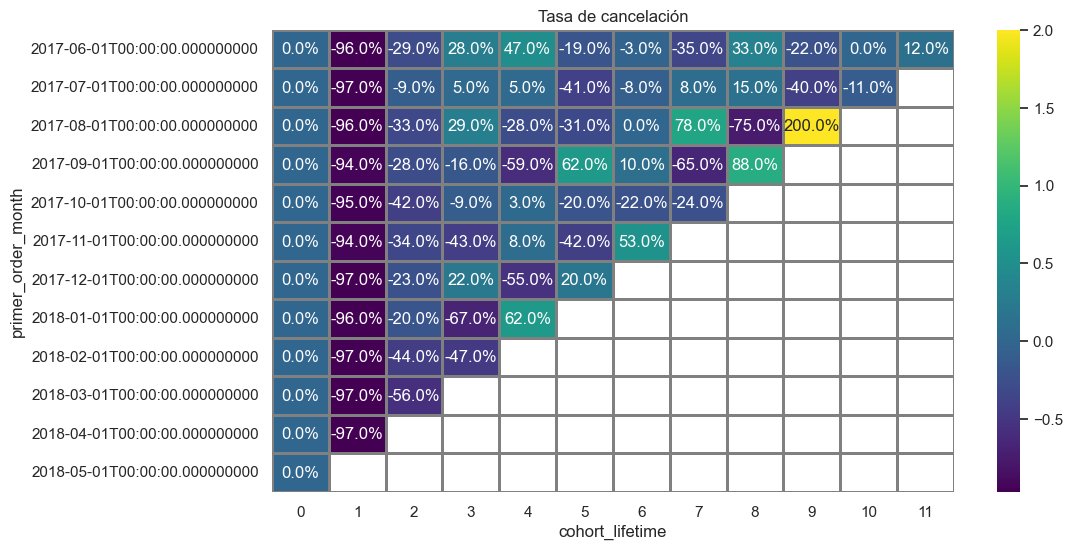

In [479]:
# Crear mapa de calor de la tasa de retención

churn_pivot_1d_desktop_si = grupo_cancelacion_1d_desktop_si.pivot_table(index='primer_order_month',
                                                              columns='cohort_lifetime', values='churn_rate', aggfunc='sum')

sns.set(style='white')

plt.figure(figsize=(11, 6))

plt.title('Tasa de cancelación')

sns.heatmap(churn_pivot_1d_desktop_si, annot=True, fmt='.1%',
            linewidths=1, linecolor='gray', cmap='viridis')

#### **Cohorte: conversion_1d_desktop_no**

**conversion_1d_desktop_no** = Usuarios que realizan compra el mismo día que se registran, usan ‘desktop’ y **NO** llegaron por ‘sources’ 1, 2, 5. 



##### **Compras realizadas por cohorte**

Número total de compras: 2184

Compras realizadas por mes (conversion_1d_desktop_no):
                        date_order
year_order month_order            
2017       6                   118
           7                   115
           8                    78
           9                   117
           10                  220
           11                  226
           12                  266
2018       1                   229
           2                   253
           3                   241
           4                   136
           5                   185



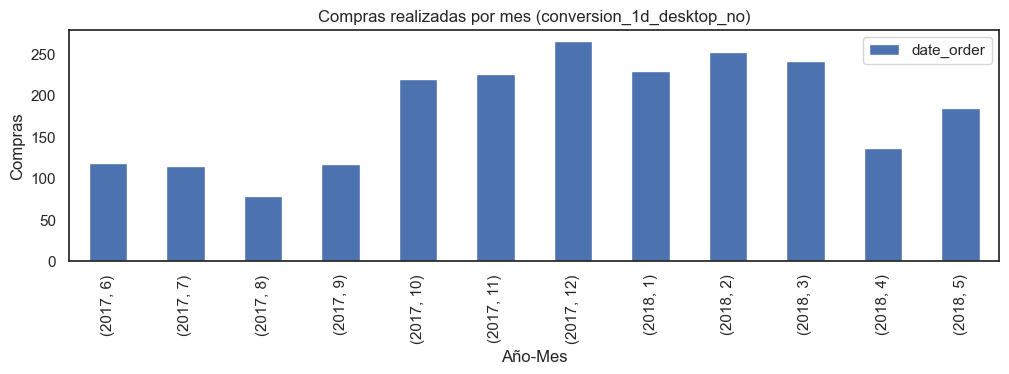

Compras promedio realizadas: date_order    182.0
dtype: float64


In [480]:
# Total de compras

total_compras_1d_desktop_no = conversion_1d_desktop_no['date_order'].count()

print('Número total de compras:', total_compras_1d_desktop_no)

print()

# Número de compras realizadas por mes

compras_1d_desktop_no = conversion_1d_desktop_no.groupby(
    ['year_order', 'month_order']).agg({'date_order': 'count'})

print('Compras realizadas por mes (conversion_1d_desktop_no):')

print(compras_1d_desktop_no)

print()

# Gráfica de compras realizadas por mes

compras_1d_desktop_no.plot(kind='bar', figsize=(12, 3))

plt.title('Compras realizadas por mes (conversion_1d_desktop_no)')

plt.xlabel('Año-Mes')

plt.ylabel('Compras')

plt.xticks(rotation=90)

plt.show()

# Compras promedio realizadas

mean_compras_1d_desktop_no = conversion_1d_desktop_no.groupby(
    ['year_order', 'month_order']).agg({'date_order': 'count'}).mean()

print('Compras promedio realizadas:', round(mean_compras_1d_desktop_no))

##### **Usuarios por mes**

Usuarios únicos por mes (conversion_1d_desktop_no):
                        uid
year_order month_order     
2017       6            110
           7            105
           8             72
           9            111
           10           206
           11           200
           12           244
2018       1            212
           2            236
           3            221
           4            129
           5            183



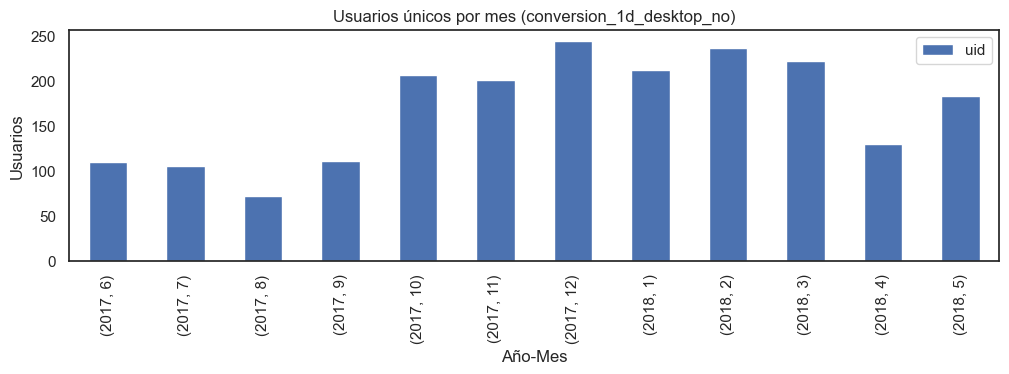

Usuarios unicos promedio: uid    169.083333
dtype: float64


In [481]:
# Usuarios únicos por mes

usuarios_unicos_1d_desktop_no = conversion_1d_desktop_no.groupby(
    ['year_order', 'month_order']).agg({'uid': 'nunique'})

print('Usuarios únicos por mes (conversion_1d_desktop_no):')

print(usuarios_unicos_1d_desktop_no)

print()

# Gráfica de usuarios únicos por mes

usuarios_unicos_1d_desktop_no.plot(kind='bar', figsize=(12, 3))

plt.title('Usuarios únicos por mes (conversion_1d_desktop_no)')

plt.xlabel('Año-Mes')

plt.ylabel('Usuarios')

plt.xticks(rotation=90)

plt.show()

# Usuarios unicos promedio

mean_usuarios_unicos_1d_desktop_no = conversion_1d_desktop_no.groupby(
    ['year_order', 'month_order']).agg({'uid': 'nunique'}).mean()

print('Usuarios unicos promedio:', mean_usuarios_unicos_1d_desktop_no)

##### **Compras por usuario**

In [482]:
# Número de compras por usuario

compras_usuario_1d_desktop_no = conversion_1d_desktop_no.groupby(['uid']).agg(
    {'date_order': 'count'}).sort_values(by='date_order', ascending=False)

print('Compras por usuario (conversion_1d_desktop_no):')

print(compras_usuario_1d_desktop_no)

print()

Compras por usuario (conversion_1d_desktop_no):
                      date_order
uid                             
1434788742443763794            5
3172646080215736180            5
17957867410595920177           5
1232422332144298370            4
8651037793700170930            4
...                          ...
18208237344264147276           1
18221248423953099150           1
18227324675237623047           1
18244722878109290584           1
37377663602840951              1

[1990 rows x 1 columns]



##### **Revenue por mes**

Total revenue: $ 7601.97

                        revenue
year_order month_order         
2017       6             386.92
           7             569.82
           8             286.06
           9             350.55
           10            731.75
           11            836.91
           12            895.14
2018       1             797.48
           2             810.32
           3             866.57
           4             405.46
           5             664.99



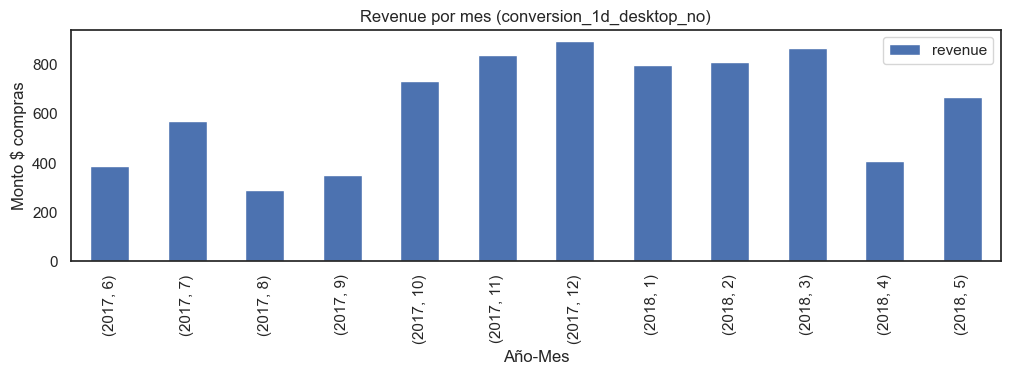

Revenue promedio: revenue    633.0
dtype: float64


In [483]:
# Total de revenue

total_revenue_1d_desktop_no = round(
    conversion_1d_desktop_no['revenue'].sum(), 2)

print('Total revenue: $', total_revenue_1d_desktop_no)

print()

# Monto de compras realizadas por mes

revenue_1d_desktop_no = conversion_1d_desktop_no.groupby(
    ['year_order', 'month_order']).agg({'revenue': 'sum'})

print(revenue_1d_desktop_no)

print()

# Gráfica de revenue por mes

revenue_1d_desktop_no.plot(kind='bar', figsize=(12, 3))

plt.title('Revenue por mes (conversion_1d_desktop_no)')

plt.xlabel('Año-Mes')

plt.ylabel('Monto $ compras')

plt.xticks(rotation=90)

plt.show()

# Revenue promedio

mean_revenue_1d_desktop_no = conversion_1d_desktop_no.groupby(
    ['year_order', 'month_order']).agg({'revenue': 'sum'}).mean()

print('Revenue promedio:', round(mean_revenue_1d_desktop_no))

##### **Revenue por usuario**

In [484]:
# Revenue compras por usuario

revenue_usuario_1d_desktop_no = conversion_1d_desktop_no.groupby(['uid']).agg(
    {'revenue': 'sum'}).sort_values(by='revenue', ascending=False)

print('Revenue por usuario (conversion_1d_desktop_no):')

print(revenue_usuario_1d_desktop_no)

print()

Revenue por usuario (conversion_1d_desktop_no):
                      revenue
uid                          
11987654752300040721    91.66
1694616105381980661     58.67
9581383549669690772     44.00
17202900699558736149    36.67
3518824987413593168     36.67
...                       ...
1701463350854217496      0.06
1402544580976202447      0.06
8115133813593572624      0.06
281937195372801827       0.06
6795915553610199335      0.03

[1990 rows x 1 columns]



In [485]:
# Revenue promedio por usuario

revenue_promedio_usuario_1d_desktop_no = round(
    revenue_usuario_1d_desktop_no['revenue'].mean(), 2)

print('Revenue promedio por usuario (conversion_1d):',
      revenue_promedio_usuario_1d_desktop_no)

Revenue promedio por usuario (conversion_1d): 3.82


##### **Tasa de retención**

In [486]:
# Calcular la semana del ciclo de vida del usuario mensual

conversion_1d_desktop_no['order_month'] = pd.to_datetime(
    conversion_1d_desktop_no['date_order'].dt.to_period('M').dt.to_timestamp())

conversion_1d_desktop_no['primer_order_month'] = pd.to_datetime(
    conversion_1d_desktop_no['fecha_primer_orden'].dt.to_period('M').dt.to_timestamp())

conversion_1d_desktop_no['cohort_lifetime'] = (
    conversion_1d_desktop_no['order_month'].dt.to_period('M') - conversion_1d_desktop_no['primer_order_month'].dt.to_period('M'))

conversion_1d_desktop_no['cohort_lifetime'] = conversion_1d_desktop_no['cohort_lifetime'].apply(
    lambda x: x.n)

conversion_1d_desktop_no['cohort_lifetime'] = conversion_1d_desktop_no['cohort_lifetime'].astype(
    int)

print(conversion_1d_desktop_no.head(3))
print()
print(conversion_1d_desktop_no.cohort_lifetime.unique())

                buy_ts  revenue                   uid  year_order  \
40 2017-06-01 17:20:00     2.08  13476545380596382515        2017   
49 2017-06-01 19:02:00     3.30   3621788520712541685        2017   
76 2017-06-01 21:49:00     3.30   5393972724164817668        2017   

    month_order  week_order date_order  hour_order fecha_primera_visita  \
40            6          22 2017-06-01          17           2017-06-01   
49            6          22 2017-06-01          19           2017-06-01   
76            6          22 2017-06-01          21           2017-06-01   

   fecha_primer_orden tiempo_para_compra_1 order_month primer_order_month  \
40         2017-06-01               0 days  2017-06-01         2017-06-01   
49         2017-06-01               0 days  2017-06-01         2017-06-01   
76         2017-06-01               0 days  2017-06-01         2017-06-01   

    cohort_lifetime  
40                0  
49                0  
76                0  

[0 1 2 3 5 7 6 4]


C:\Users\the_o\AppData\Local\Temp\ipykernel_5104\2412930942.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion_1d_desktop_no['order_month'] = pd.to_datetime(
C:\Users\the_o\AppData\Local\Temp\ipykernel_5104\2412930942.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion_1d_desktop_no['primer_order_month'] = pd.to_datetime(
C:\Users\the_o\AppData\Local\Temp\ipykernel_5104\2412930942.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [487]:
# Retención de usuarios por cohort lifetime

# Aplicar función printRetetionRate

cohort_1d_desktop_no = printRetetionRate(conversion_1d_desktop_no)

# Tabla dinámica

pivot_cohort_1d_desktop_no = cohort_1d_desktop_no.pivot_table(index='primer_order_month',
                                 columns='cohort_lifetime', values='retention', aggfunc='mean')

pivot_cohort_1d_desktop_no = pivot_cohort_1d_desktop_no.fillna('')

print(pivot_cohort_1d_desktop_no)

cohort_lifetime       0     1     2     3     4     5     6     7
primer_order_month                                               
2017-06-01          1.0  0.02                                    
2017-07-01          1.0  0.01                                0.01
2017-08-01          1.0  0.01                          0.01  0.01
2017-09-01          1.0                          0.01            
2017-10-01          1.0  0.01         0.0         0.0            
2017-11-01          1.0  0.01  0.01  0.01  0.02                  
2017-12-01          1.0   0.0   0.0   0.0   0.0  0.01            
2018-01-01          1.0  0.01                                    
2018-02-01          1.0  0.02                                    
2018-03-01          1.0   0.0  0.01                              
2018-04-01          1.0  0.02                                    
2018-05-01          1.0                                          


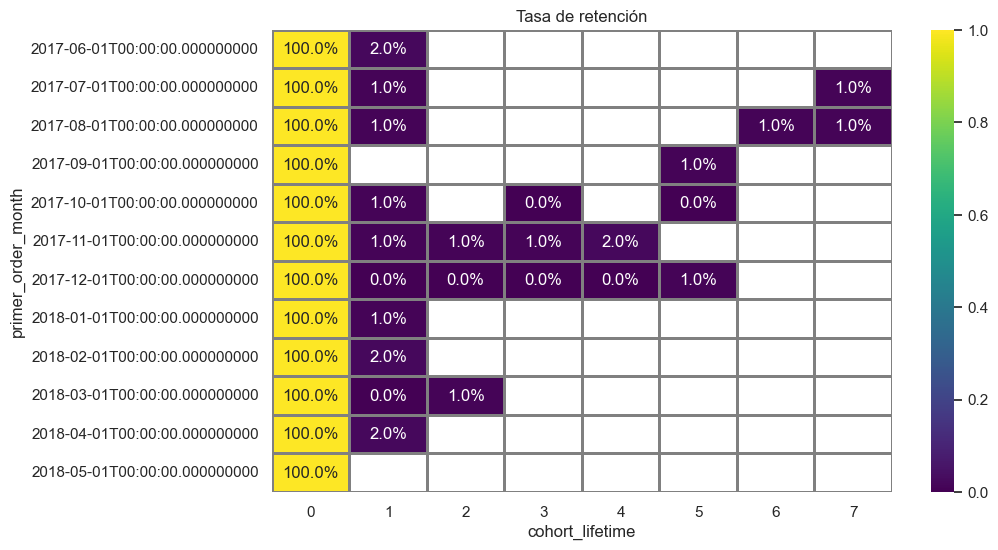

In [488]:
# Crear mapa de calor de la tasa de retención

pivot_cohort_1d_desktop_no = cohort_1d_desktop_no.pivot_table(index='primer_order_month',
                                                              columns='cohort_lifetime', values='retention', aggfunc='mean')

sns.set(style='white')

plt.figure(figsize=(10, 6))

plt.title('Tasa de retención')

sns.heatmap(pivot_cohort_1d_desktop_no, annot=True, fmt='.1%',
            linewidths=1, linecolor='gray', cmap='viridis')

plt.show()

##### **Tasa de cancelación**

In [489]:
# Agrupación por primer_order_month y uid

grupo_cancelacion_1d_desktop_no = (conversion_1d_desktop_no.groupby(
    ['primer_order_month', 'cohort_lifetime']).agg({'uid': 'nunique'}).reset_index())

# Recuento inicial de usuarios

usuarios_iniciales_1d_desktop_no = grupo_cancelacion_1d_desktop_no[grupo_cancelacion_1d_desktop_no['cohort_lifetime'] == 0][[
    'primer_order_month', 'uid']]

usuarios_iniciales_1d_desktop_no = usuarios_iniciales_1d_desktop_no.rename(
    columns={'uid': 'cohort_users'})

# Unión con la agrupación

grupo_cancelacion_1d_desktop_no = grupo_cancelacion_1d_desktop_no.merge(
    usuarios_iniciales_1d_desktop_no, on='primer_order_month')

# Aplicar pct_change()

grupo_cancelacion_1d_desktop_no['churn_rate'] = grupo_cancelacion_1d_desktop_no.groupby(
    ['primer_order_month'])['uid'].pct_change().round(2)

print(grupo_cancelacion_1d_desktop_no.head())

  primer_order_month  cohort_lifetime  uid  cohort_users  churn_rate
0         2017-06-01                0  110           110         NaN
1         2017-06-01                1    2           110       -0.98
2         2017-07-01                0  103           103         NaN
3         2017-07-01                1    1           103       -0.99
4         2017-07-01                7    1           103        0.00


In [490]:
# Tabla dinámica

churn_pivot_1d_desktop_no = grupo_cancelacion_1d_desktop_no.pivot_table(
    index='primer_order_month', columns='cohort_lifetime', values='churn_rate', aggfunc='sum')

churn_pivot_1d_desktop_no = churn_pivot_1d_desktop_no.fillna('')

print(churn_pivot_1d_desktop_no)

cohort_lifetime       0     1    2     3    4     5    6    7
primer_order_month                                           
2017-06-01          0.0 -0.98                                
2017-07-01          0.0 -0.99                             0.0
2017-08-01          0.0 -0.99                        0.0  0.0
2017-09-01          0.0                       -0.99          
2017-10-01          0.0 -0.99      -0.67        0.0          
2017-11-01          0.0 -0.99  0.0  -0.5  2.0                
2017-12-01          0.0  -1.0  0.0   0.0  0.0   2.0          
2018-01-01          0.0 -0.99                                
2018-02-01          0.0 -0.98                                
2018-03-01          0.0  -1.0  1.0                           
2018-04-01          0.0 -0.98                                
2018-05-01          0.0                                      


<Axes: title={'center': 'Tasa de cancelación'}, xlabel='cohort_lifetime', ylabel='primer_order_month'>

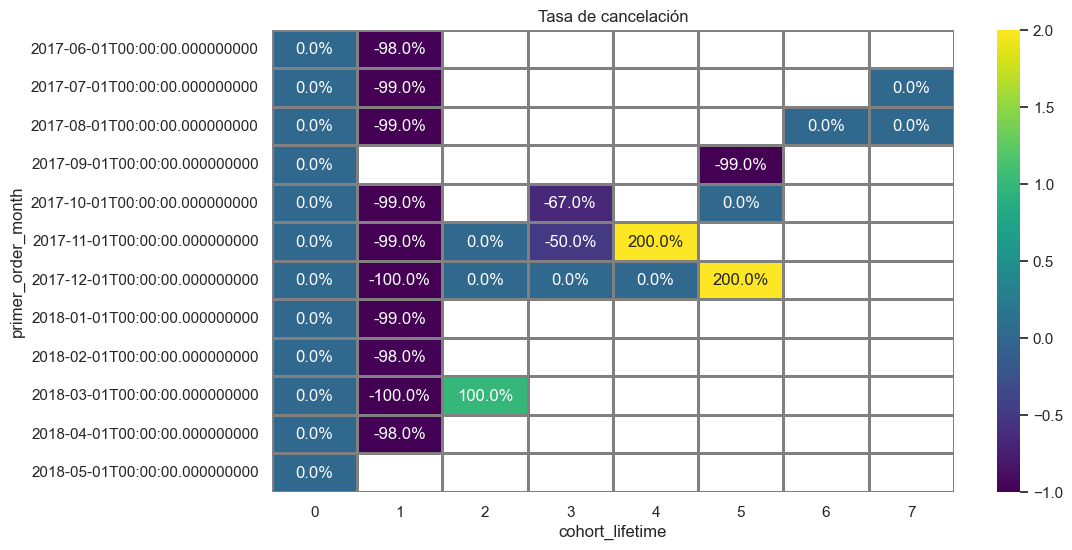

In [491]:
# Crear mapa de calor de la tasa de retención

churn_pivot_1d_desktop_no = grupo_cancelacion_1d_desktop_no.pivot_table(index='primer_order_month',
                                                              columns='cohort_lifetime', values='churn_rate', aggfunc='sum')

sns.set(style='white')

plt.figure(figsize=(11, 6))

plt.title('Tasa de cancelación')

sns.heatmap(churn_pivot_1d_desktop_no, annot=True, fmt='.1%',
            linewidths=1, linecolor='gray', cmap='viridis')

#### **Cohorte: conversion_1d_touch_si**

**conversion_1d_touch_si** = Usuarios que realizan compra el mismo día que se registran, usan ‘touch’ y llegaron por ‘sources’ 1, 2, 5. 

##### **Compras realizadas por cohorte**

Número total de compras: 4353

Compras realizadas por mes (conversion_1d_touch_si):
                        date_order
year_order month_order            
2017       6                   258
           7                   314
           8                   201
           9                   364
           10                  549
           11                  514
           12                  473
2018       1                   364
           2                   404
           3                   394
           4                   236
           5                   282



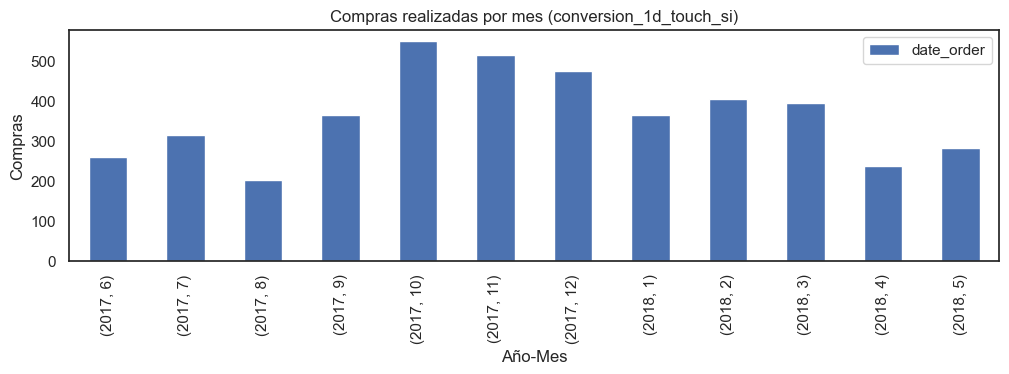

Compras promedio realizadas: date_order    363.0
dtype: float64


In [492]:
# Total de compras

total_compras_1d_touch_si = conversion_1d_touch_si['date_order'].count()

print('Número total de compras:', total_compras_1d_touch_si)

print()

# Número de compras realizadas por mes

compras_1d_touch_si = conversion_1d_touch_si.groupby(
    ['year_order', 'month_order']).agg({'date_order': 'count'})

print('Compras realizadas por mes (conversion_1d_touch_si):')

print(compras_1d_touch_si)

print()

# Gráfica de compras realizadas por mes

compras_1d_touch_si.plot(kind='bar', figsize=(12, 3))

plt.title('Compras realizadas por mes (conversion_1d_touch_si)')

plt.xlabel('Año-Mes')

plt.ylabel('Compras')

plt.xticks(rotation=90)

plt.show()

# Compras promedio realizadas

mean_compras_1d_touch_si = conversion_1d_touch_si.groupby(
    ['year_order', 'month_order']).agg({'date_order': 'count'}).mean()

print('Compras promedio realizadas:', round(mean_compras_1d_touch_si))

##### **Usuarios por mes**

Usuarios únicos por mes (conversion_1d_touch_si):
                        uid
year_order month_order     
2017       6            210
           7            245
           8            156
           9            284
           10           386
           11           365
           12           346
2018       1            280
           2            327
           3            293
           4            190
           5            241



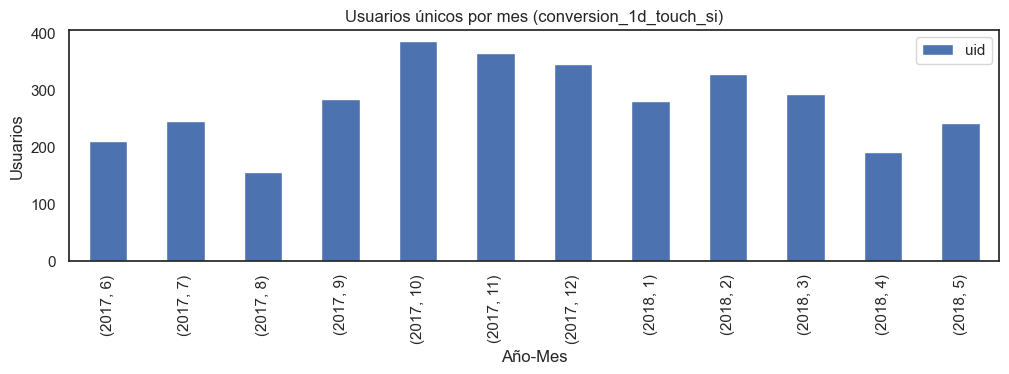

Usuarios unicos promedio: uid    276.916667
dtype: float64


In [493]:
# Usuarios únicos por mes

usuarios_unicos_1d_touch_si = conversion_1d_touch_si.groupby(['year_order','month_order']).agg({'uid': 'nunique'})

print('Usuarios únicos por mes (conversion_1d_touch_si):')

print(usuarios_unicos_1d_touch_si)

print()

# Gráfica de usuarios únicos por mes

usuarios_unicos_1d_touch_si.plot(kind='bar', figsize=(12, 3))

plt.title('Usuarios únicos por mes (conversion_1d_touch_si)')

plt.xlabel('Año-Mes')

plt.ylabel('Usuarios')

plt.xticks(rotation=90)

plt.show()

# Usuarios unicos promedio

mean_usuarios_unicos_1d_touch_si = conversion_1d_touch_si.groupby(['year_order', 'month_order']).agg({'uid': 'nunique'}).mean()

print('Usuarios unicos promedio:', mean_usuarios_unicos_1d_touch_si)

##### **Compras por usuario**

In [494]:
# Número de compras por usuario

compras_usuario_1d_touch_si = conversion_1d_touch_si.groupby(['uid']).agg(
    {'date_order': 'count'}).sort_values(by='date_order', ascending=False)

print('Compras por usuario (conversion_1d_touch_si):')

print(compras_usuario_1d_touch_si)

print()

Compras por usuario (conversion_1d_touch_si):
                      date_order
uid                             
3644482766749211722          239
1668300487562478408           45
2135694231046499268           22
3963367130094376110           21
5603453646174104178           20
...                          ...
18349799182852536450           1
18355043899418704367           1
45650270182494873              1
43283938077220078              1
42881940149373883              1

[2813 rows x 1 columns]



##### **Revenue por mes**

Total revenue: $ 19876.28

                        revenue
year_order month_order         
2017       6             835.44
           7            1415.01
           8             972.78
           9            1920.14
           10           3359.93
           11           3207.26
           12           1667.47
2018       1            1247.55
           2            1397.16
           3            1841.35
           4            1015.52
           5             996.67



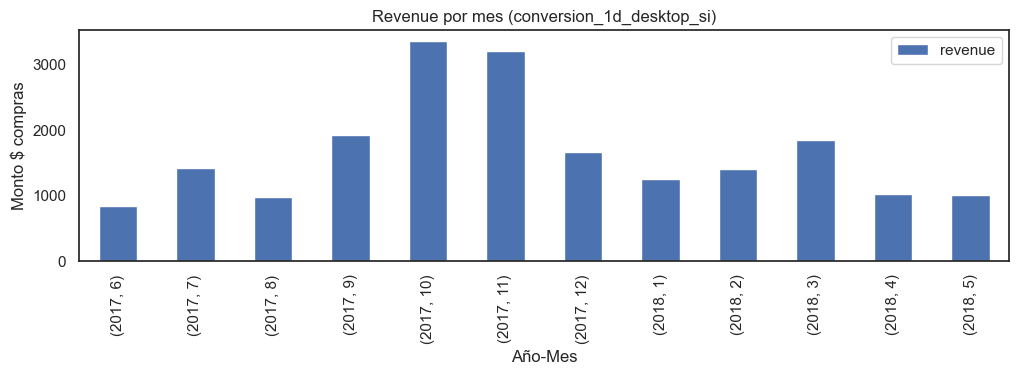

Revenue promedio: revenue    1656.0
dtype: float64


In [495]:
# Total de revenue

total_revenue_1d_touch_si = round(conversion_1d_touch_si['revenue'].sum(),2)

print('Total revenue: $', total_revenue_1d_touch_si)

print()

# Monto de compras realizadas por mes

revenue_1d_touch_si = conversion_1d_touch_si.groupby(
    ['year_order', 'month_order']).agg({'revenue': 'sum'})

print(revenue_1d_touch_si)

print()

# Gráfica de revenue por mes

revenue_1d_touch_si.plot(kind='bar', figsize=(12, 3))

plt.title('Revenue por mes (conversion_1d_desktop_si)')

plt.xlabel('Año-Mes')

plt.ylabel('Monto $ compras')

plt.xticks(rotation=90)

plt.show()

# Revenue promedio

mean_revenue_1d_touch_si = conversion_1d_touch_si.groupby(
    ['year_order', 'month_order']).agg({'revenue': 'sum'}).mean()

print('Revenue promedio:', round(mean_revenue_1d_touch_si))

##### **Revenue por usuario**

In [496]:
# Revenue compras por usuario

revenue_usuario_1d_touch_si = conversion_1d_touch_si.groupby(['uid']).agg(
    {'revenue': 'sum'}).sort_values(by='revenue', ascending=False)

print('Revenue por usuario (conversion_1d_touch_si):')

print(revenue_usuario_1d_touch_si)

print()

Revenue por usuario (conversion_1d_touch_si):
                      revenue
uid                          
3644482766749211722   1444.29
1668300487562478408   1163.63
9717719112529363193    640.62
12646629604435317444   388.98
17956827303229825606   264.24
...                       ...
6406274186885396310      0.06
505352812386850007       0.06
12993846614360115746     0.06
12260021690862624113     0.03
9899461113622751389      0.03

[2813 rows x 1 columns]



In [497]:
# Revenue promedio por usuario

revenue_promedio_usuario_1d_touch_si = round(
    revenue_usuario_1d_touch_si['revenue'].mean(), 2)

print('Revenue promedio por usuario (conversion_1d):',
      revenue_promedio_usuario_1d_touch_si)

Revenue promedio por usuario (conversion_1d): 7.07


##### **Tasa de retención**

In [498]:
# Calcular la semana del ciclo de vida del usuario mensual

conversion_1d_touch_si['order_month'] = pd.to_datetime(
    conversion_1d_touch_si['date_order'].dt.to_period('M').dt.to_timestamp())

conversion_1d_touch_si['primer_order_month'] = pd.to_datetime(
    conversion_1d_touch_si['fecha_primer_orden'].dt.to_period('M').dt.to_timestamp())

conversion_1d_touch_si['cohort_lifetime'] = (
    conversion_1d_touch_si['order_month'].dt.to_period('M') - conversion_1d_touch_si['primer_order_month'].dt.to_period('M'))

conversion_1d_touch_si['cohort_lifetime'] = conversion_1d_touch_si['cohort_lifetime'].apply(lambda x: x.n)

conversion_1d_touch_si['cohort_lifetime'] = conversion_1d_touch_si['cohort_lifetime'].astype(
    int)

print(conversion_1d_touch_si.head(3))
print()
print(conversion_1d_touch_si.cohort_lifetime.unique())

                buy_ts  revenue                   uid  year_order  \
7  2017-06-01 09:22:00     1.22   3644482766749211722        2017   
17 2017-06-01 10:58:00     3.73  11062788618907079633        2017   
27 2017-06-01 14:22:00     0.18  13128309044400650573        2017   

    month_order  week_order date_order  hour_order fecha_primera_visita  \
7             6          22 2017-06-01           9           2017-06-01   
17            6          22 2017-06-01          10           2017-06-01   
27            6          22 2017-06-01          14           2017-06-01   

   fecha_primer_orden tiempo_para_compra_1 order_month primer_order_month  \
7          2017-06-01               0 days  2017-06-01         2017-06-01   
17         2017-06-01               0 days  2017-06-01         2017-06-01   
27         2017-06-01               0 days  2017-06-01         2017-06-01   

    cohort_lifetime  
7                 0  
17                0  
27                0  

[ 0  1  2  3  4  5  6  7

C:\Users\the_o\AppData\Local\Temp\ipykernel_5104\3991117604.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion_1d_touch_si['order_month'] = pd.to_datetime(
C:\Users\the_o\AppData\Local\Temp\ipykernel_5104\3991117604.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion_1d_touch_si['primer_order_month'] = pd.to_datetime(
C:\Users\the_o\AppData\Local\Temp\ipykernel_5104\3991117604.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [499]:
# Retención de usuarios por cohort lifetime

# Aplicar función printRetetionRate

cohort_1d_touch_si = printRetetionRate(conversion_1d_touch_si)

# Tabla dinámica

pivot_cohort_1d_touch_si = cohort_1d_touch_si.pivot_table(index='primer_order_month',
                                 columns='cohort_lifetime', values='retention', aggfunc='mean')

pivot_cohort_1d_touch_si = pivot_cohort_1d_touch_si.fillna('')

print(pivot_cohort_1d_touch_si)

cohort_lifetime      0     1     2     3     4     5     6     7     8     9   \
primer_order_month                                                              
2017-06-01          1.0  0.06  0.04  0.03  0.04  0.06  0.06  0.02  0.04  0.04   
2017-07-01          1.0  0.04  0.02  0.03  0.06  0.01  0.02  0.03  0.05  0.01   
2017-08-01          1.0  0.04  0.05  0.02  0.02  0.03  0.04  0.01  0.02  0.04   
2017-09-01          1.0  0.06  0.06  0.03  0.02  0.02  0.02   0.0  0.02         
2017-10-01          1.0   0.1  0.05  0.05  0.03  0.02  0.02  0.01               
2017-11-01          1.0  0.05  0.05  0.03  0.02  0.01  0.01                     
2017-12-01          1.0  0.04  0.04  0.03  0.02  0.01                           
2018-01-01          1.0  0.04  0.04  0.02  0.01                                 
2018-02-01          1.0  0.04  0.03  0.01                                       
2018-03-01          1.0  0.04  0.02                                             
2018-04-01          1.0  0.0

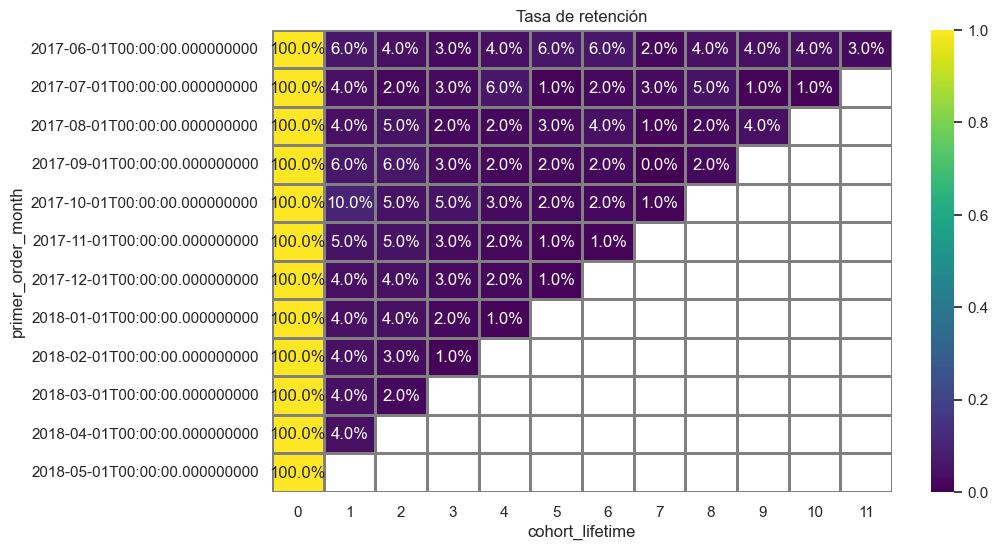

In [500]:
# Crear mapa de calor de la tasa de retención

pivot_cohort_1d_touch_si = cohort_1d_touch_si.pivot_table(index='primer_order_month',
                                                              columns='cohort_lifetime', values='retention', aggfunc='mean')

sns.set(style='white')

plt.figure(figsize=(10, 6))

plt.title('Tasa de retención')

sns.heatmap(pivot_cohort_1d_touch_si, annot=True, fmt='.1%',
            linewidths=1, linecolor='gray', cmap='viridis')

plt.show()

##### **Tasa de cancelación**

In [501]:
# Agrupación por primer_order_month y uid

grupo_cancelacion_1d_touch_si = (conversion_1d_touch_si.groupby(
    ['primer_order_month', 'cohort_lifetime']).agg({'uid': 'nunique'}).reset_index())

# Recuento inicial de usuarios

usuarios_iniciales_1d_touch_si = grupo_cancelacion_1d_touch_si[grupo_cancelacion_1d_touch_si['cohort_lifetime'] == 0][['primer_order_month', 'uid']]

usuarios_iniciales_1d_touch_si = usuarios_iniciales_1d_touch_si.rename(columns={'uid':'cohort_users'})

# Unión con la agrupación

grupo_cancelacion_1d_touch_si = grupo_cancelacion_1d_touch_si.merge(usuarios_iniciales_1d_touch_si, on='primer_order_month')

# Aplicar pct_change()

grupo_cancelacion_1d_touch_si['churn_rate'] = grupo_cancelacion_1d_touch_si.groupby(['primer_order_month'])['uid'].pct_change().round(2)

print(grupo_cancelacion_1d_touch_si.head())

  primer_order_month  cohort_lifetime  uid  cohort_users  churn_rate
0         2017-06-01                0  210           210         NaN
1         2017-06-01                1   12           210       -0.94
2         2017-06-01                2    9           210       -0.25
3         2017-06-01                3    7           210       -0.22
4         2017-06-01                4    9           210        0.29


In [502]:
# Tabla dinámica

churn_pivot_1d_touch_si = grupo_cancelacion_1d_touch_si.pivot_table(
    index='primer_order_month', columns='cohort_lifetime', values='churn_rate', aggfunc='sum')

churn_pivot_1d_touch_si = churn_pivot_1d_touch_si.fillna('')

print(churn_pivot_1d_touch_si)

cohort_lifetime      0     1     2     3     4     5     6     7     8     9   \
primer_order_month                                                              
2017-06-01          0.0 -0.94 -0.25 -0.22  0.29  0.33  0.08 -0.62   0.8   0.0   
2017-07-01          0.0 -0.96  -0.5   0.4  0.86 -0.85   1.5   0.4  0.71 -0.75   
2017-08-01          0.0 -0.96  0.17 -0.57   0.0  0.33  0.25  -0.8   2.0  0.67   
2017-09-01          0.0 -0.94 -0.06  -0.5  -0.5  0.25  -0.2 -0.75   4.0         
2017-10-01          0.0  -0.9 -0.53  0.06 -0.41  -0.4  0.33 -0.62               
2017-11-01          0.0 -0.95 -0.13 -0.38 -0.25  -0.5   0.0                     
2017-12-01          0.0 -0.96 -0.15 -0.18 -0.33  -0.5                           
2018-01-01          0.0 -0.96 -0.11  -0.5  -0.5                                 
2018-02-01          0.0 -0.96  -0.3 -0.71                                       
2018-03-01          0.0 -0.96  -0.6                                             
2018-04-01          0.0 -0.9

<Axes: title={'center': 'Tasa de cancelación'}, xlabel='cohort_lifetime', ylabel='primer_order_month'>

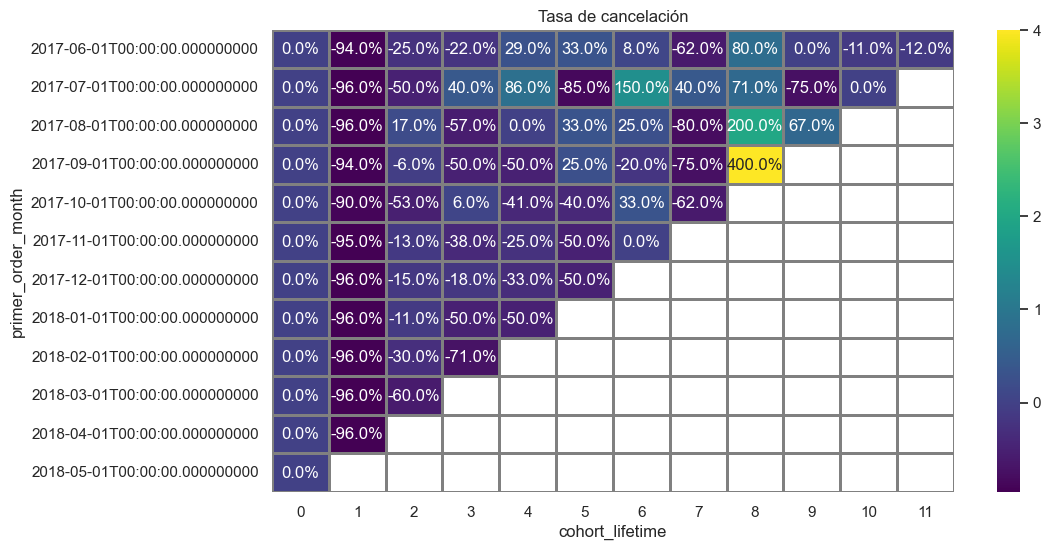

In [503]:
# Crear mapa de calor de la tasa de retención

churn_pivot_1d_touch_si = grupo_cancelacion_1d_touch_si.pivot_table(index='primer_order_month',
                                                              columns='cohort_lifetime', values='churn_rate', aggfunc='sum')

sns.set(style='white')

plt.figure(figsize=(11, 6))

plt.title('Tasa de cancelación')

sns.heatmap(churn_pivot_1d_touch_si, annot=True, fmt='.1%',
            linewidths=1, linecolor='gray', cmap='viridis')

#### **Cohorte: conversion_1d_touch_no**

**conversion_1d_touch_no** = Usuarios que realizan compra el mismo día que se registran, usan ‘touch’ y **NO** llegaron por ‘sources’ 1, 2, 5. 



##### **Compras realizadas por cohorte**

Número total de compras: 11585

Compras realizadas por mes (conversion_1d_touch_no):
                        date_order
year_order month_order            
2017       6                   692
           7                   556
           8                   429
           9                   737
           10                 1361
           11                 1296
           12                 1374
2018       1                  1088
           2                  1164
           3                  1210
           4                   742
           5                   936



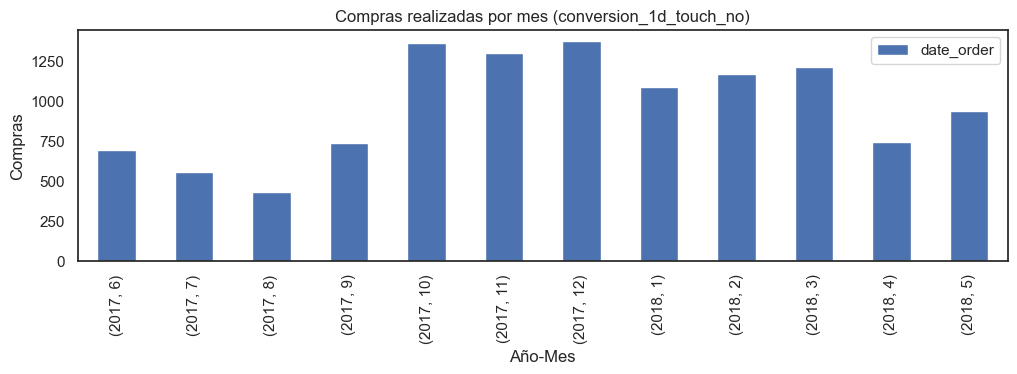

Compras promedio realizadas: date_order    965.0
dtype: float64


In [504]:
# Total de compras

total_compras_1d_touch_no = conversion_1d_touch_no['date_order'].count()

print('Número total de compras:', total_compras_1d_touch_no)

print()

# Número de compras realizadas por mes

compras_1d_touch_no = conversion_1d_touch_no.groupby(
    ['year_order', 'month_order']).agg({'date_order': 'count'})

print('Compras realizadas por mes (conversion_1d_touch_no):')

print(compras_1d_touch_no)

print()

# Gráfica de compras realizadas por mes

compras_1d_touch_no.plot(kind='bar', figsize=(12, 3))

plt.title('Compras realizadas por mes (conversion_1d_touch_no)')

plt.xlabel('Año-Mes')

plt.ylabel('Compras')

plt.xticks(rotation=90)

plt.show()

# Compras promedio realizadas

mean_compras_1d_touch_no = conversion_1d_touch_no.groupby(
    ['year_order', 'month_order']).agg({'date_order': 'count'}).mean()

print('Compras promedio realizadas:', round(mean_compras_1d_touch_no))

##### **Usuarios por mes**

Usuarios únicos por mes (conversion_1d_touch_no):
                         uid
year_order month_order      
2017       6             655
           7             530
           8             405
           9             704
           10           1285
           11           1197
           12           1292
2018       1            1038
           2            1097
           3            1135
           4             712
           5             904



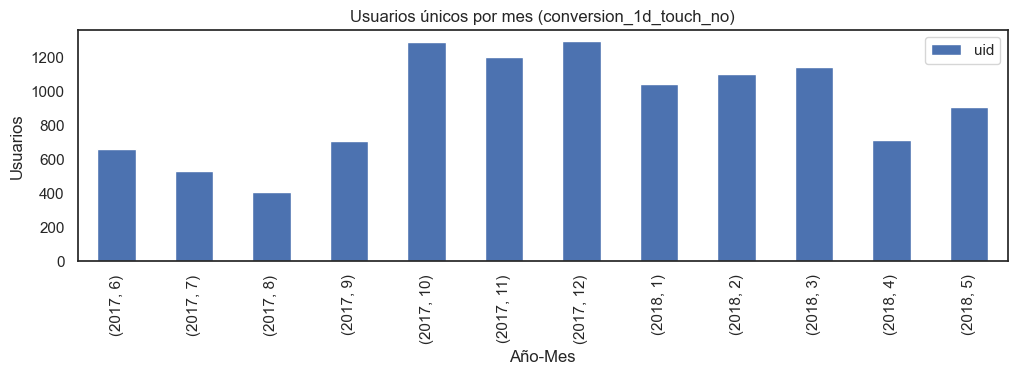

Usuarios unicos promedio: uid    912.833333
dtype: float64


In [505]:
# Usuarios únicos por mes

usuarios_unicos_1d_touch_no = conversion_1d_touch_no.groupby(
    ['year_order', 'month_order']).agg({'uid': 'nunique'})

print('Usuarios únicos por mes (conversion_1d_touch_no):')

print(usuarios_unicos_1d_touch_no)

print()

# Gráfica de usuarios únicos por mes

usuarios_unicos_1d_touch_no.plot(kind='bar', figsize=(12, 3))

plt.title('Usuarios únicos por mes (conversion_1d_touch_no)')

plt.xlabel('Año-Mes')

plt.ylabel('Usuarios')

plt.xticks(rotation=90)

plt.show()

# Usuarios unicos promedio

mean_usuarios_unicos_1d_touch_no = conversion_1d_touch_no.groupby(
    ['year_order', 'month_order']).agg({'uid': 'nunique'}).mean()

print('Usuarios unicos promedio:', mean_usuarios_unicos_1d_touch_no)

##### **Compras por usuario**

In [506]:
# Número de compras por usuario

compras_usuario_1d_touch_no = conversion_1d_touch_no.groupby(['uid']).agg(
    {'date_order': 'count'}).sort_values(by='date_order', ascending=False)

print('Compras por usuario (conversion_1d_touch_no):')

print(compras_usuario_1d_touch_no)

print()

Compras por usuario (conversion_1d_touch_no):
                      date_order
uid                             
8841898463200473507            8
17959931642688902038           7
7017258868617430307            6
360031081690204351             6
8131734765358862270            5
...                          ...
18393263047221687422           1
18393420419812193921           1
18394556615792450207           1
18394937667256101957           1
18370646815562112343           1

[10449 rows x 1 columns]



##### **Revenue por mes**

Total revenue: $ 43626.2

                        revenue
year_order month_order         
2017       6            2222.47
           7            2561.17
           8            1857.74
           9            3262.53
           10           4796.14
           11           5265.71
           12           5378.35
2018       1            3656.63
           2            4041.41
           3            4574.49
           4            2749.08
           5            3260.48



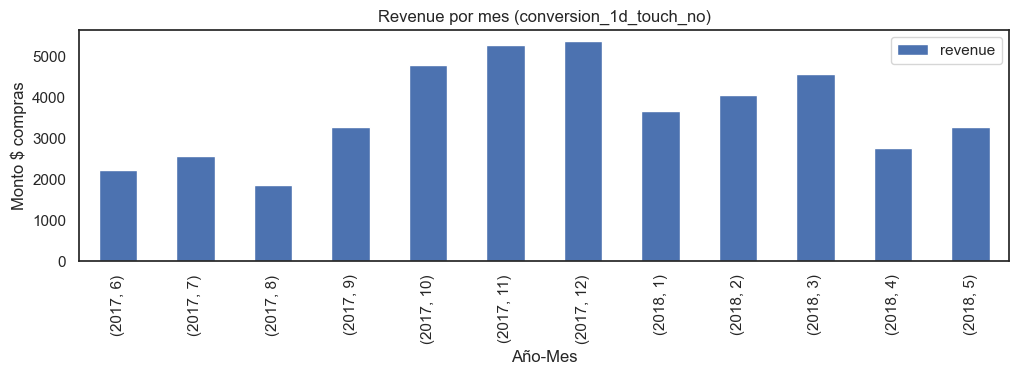

Revenue promedio: revenue    3636.0
dtype: float64


In [507]:
# Total de revenue

total_revenue_1d_touch_no = round(
    conversion_1d_touch_no['revenue'].sum(), 2)

print('Total revenue: $', total_revenue_1d_touch_no)

print()

# Monto de compras realizadas por mes

revenue_1d_touch_no = conversion_1d_touch_no.groupby(
    ['year_order', 'month_order']).agg({'revenue': 'sum'})

print(revenue_1d_touch_no)

print()

# Gráfica de revenue por mes

revenue_1d_touch_no.plot(kind='bar', figsize=(12, 3))

plt.title('Revenue por mes (conversion_1d_touch_no)')

plt.xlabel('Año-Mes')

plt.ylabel('Monto $ compras')

plt.xticks(rotation=90)

plt.show()

# Revenue promedio

mean_revenue_1d_touch_no = conversion_1d_touch_no.groupby(
    ['year_order', 'month_order']).agg({'revenue': 'sum'}).mean()

print('Revenue promedio:', round(mean_revenue_1d_touch_no))

##### **Revenue por usuario**

In [508]:
# Revenue compras por usuario

revenue_usuario_1d_touch_no = conversion_1d_touch_no.groupby(['uid']).agg(
    {'revenue': 'sum'}).sort_values(by='revenue', ascending=False)

print('Revenue por usuario (conversion_1d_touch_no):')

print(revenue_usuario_1d_touch_no)

print()

Revenue por usuario (conversion_1d_touch_no):
                      revenue
uid                          
16152080406371512880   550.00
9352364483376991844    201.67
2533570982362194729    152.78
6938086441955264055    111.11
5346373645434921159    101.62
...                       ...
5437552400593412861      0.06
10958612591142661282     0.06
11576425391567786979     0.03
11519089408305428591     0.03
12497820010814768939     0.03

[10449 rows x 1 columns]



In [509]:
# Revenue promedio por usuario

revenue_promedio_usuario_1d_touch_no = round(
    revenue_usuario_1d_touch_no['revenue'].mean(), 2)

print('Revenue promedio por usuario (conversion_1d):',
      revenue_promedio_usuario_1d_touch_no)

Revenue promedio por usuario (conversion_1d): 4.18


##### **Tasa de retención**

In [510]:
# Calcular la semana del ciclo de vida del usuario mensual

conversion_1d_touch_no['order_month'] = pd.to_datetime(
    conversion_1d_touch_no['date_order'].dt.to_period('M').dt.to_timestamp())

conversion_1d_touch_no['primer_order_month'] = pd.to_datetime(
    conversion_1d_touch_no['fecha_primer_orden'].dt.to_period('M').dt.to_timestamp())

conversion_1d_touch_no['cohort_lifetime'] = (
    conversion_1d_touch_no['order_month'].dt.to_period('M') - conversion_1d_touch_no['primer_order_month'].dt.to_period('M'))

conversion_1d_touch_no['cohort_lifetime'] = conversion_1d_touch_no['cohort_lifetime'].apply(
    lambda x: x.n)

conversion_1d_touch_no['cohort_lifetime'] = conversion_1d_touch_no['cohort_lifetime'].astype(
    int)

print(conversion_1d_touch_no.head(3))
print()
print(conversion_1d_touch_no.cohort_lifetime.unique())

                buy_ts  revenue                   uid  year_order  \
4  2017-06-01 07:58:00     0.37  14200605875248379450        2017   
5  2017-06-01 08:43:00     0.18  10402394430196413321        2017   
10 2017-06-01 09:58:00     2.81  12888070354554424008        2017   

    month_order  week_order date_order  hour_order fecha_primera_visita  \
4             6          22 2017-06-01           7           2017-06-01   
5             6          22 2017-06-01           8           2017-06-01   
10            6          22 2017-06-01           9           2017-06-01   

   fecha_primer_orden tiempo_para_compra_1 order_month primer_order_month  \
4          2017-06-01               0 days  2017-06-01         2017-06-01   
5          2017-06-01               0 days  2017-06-01         2017-06-01   
10         2017-06-01               0 days  2017-06-01         2017-06-01   

    cohort_lifetime  
4                 0  
5                 0  
10                0  

[ 0  1  2  3  4  5  6  7

C:\Users\the_o\AppData\Local\Temp\ipykernel_5104\3212957631.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion_1d_touch_no['order_month'] = pd.to_datetime(
C:\Users\the_o\AppData\Local\Temp\ipykernel_5104\3212957631.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion_1d_touch_no['primer_order_month'] = pd.to_datetime(
C:\Users\the_o\AppData\Local\Temp\ipykernel_5104\3212957631.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [511]:
# Retención de usuarios por cohort lifetime

# Aplicar función printRetetionRate

cohort_1d_touch_no = printRetetionRate(conversion_1d_touch_no)

# Tabla dinámica

pivot_cohort_1d_touch_no = cohort_1d_touch_no.pivot_table(index='primer_order_month',
                                 columns='cohort_lifetime', values='retention', aggfunc='mean')

pivot_cohort_1d_touch_no = pivot_cohort_1d_touch_no.fillna('')

print(pivot_cohort_1d_touch_no)

cohort_lifetime      0     1     2     3     4     5     6     7     8     9   \
primer_order_month                                                              
2017-06-01          1.0   0.0  0.01   0.0  0.02  0.01  0.01  0.01   0.0  0.01   
2017-07-01          1.0  0.01   0.0  0.01   0.0  0.01  0.01   0.0  0.01  0.01   
2017-08-01          1.0  0.01  0.03  0.02  0.01  0.01  0.01  0.02  0.01  0.01   
2017-09-01          1.0  0.02  0.01  0.01  0.01  0.01  0.01  0.01  0.01         
2017-10-01          1.0  0.02  0.01   0.0   0.0  0.01  0.01  0.01               
2017-11-01          1.0  0.03  0.01  0.01  0.01   0.0  0.01                     
2017-12-01          1.0  0.02  0.01  0.01   0.0   0.0                           
2018-01-01          1.0  0.01  0.01   0.0   0.0                                 
2018-02-01          1.0  0.02  0.01  0.01                                       
2018-03-01          1.0  0.01   0.0                                             
2018-04-01          1.0  0.0

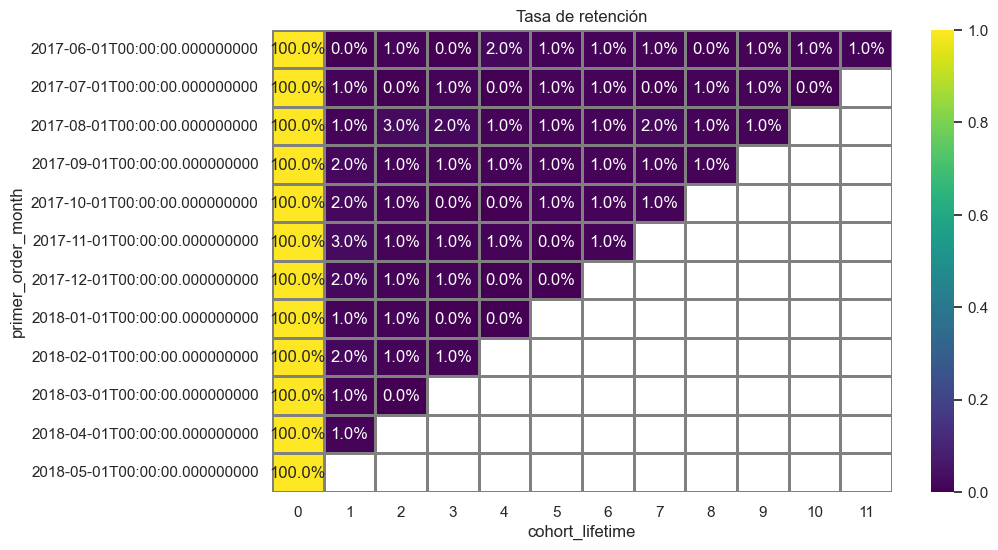

In [512]:
# Crear mapa de calor de la tasa de retención

pivot_cohort_1d_touch_no = cohort_1d_touch_no.pivot_table(index='primer_order_month',
                                                              columns='cohort_lifetime', values='retention', aggfunc='mean')

sns.set(style='white')

plt.figure(figsize=(10, 6))

plt.title('Tasa de retención')

sns.heatmap(pivot_cohort_1d_touch_no, annot=True, fmt='.1%',
            linewidths=1, linecolor='gray', cmap='viridis')

plt.show()

##### **Tasa de cancelación**

In [513]:
# Agrupación por primer_order_month y uid

grupo_cancelacion_1d_touch_no = (conversion_1d_touch_no.groupby(
    ['primer_order_month', 'cohort_lifetime']).agg({'uid': 'nunique'}).reset_index())

# Recuento inicial de usuarios

usuarios_iniciales_1d_touch_no = grupo_cancelacion_1d_touch_no[grupo_cancelacion_1d_touch_no['cohort_lifetime'] == 0][[
    'primer_order_month', 'uid']]

usuarios_iniciales_1d_touch_no = usuarios_iniciales_1d_touch_no.rename(
    columns={'uid': 'cohort_users'})

# Unión con la agrupación

grupo_cancelacion_1d_touch_no = grupo_cancelacion_1d_touch_no.merge(
    usuarios_iniciales_1d_touch_no, on='primer_order_month')

# Aplicar pct_change()

grupo_cancelacion_1d_touch_no['churn_rate'] = grupo_cancelacion_1d_touch_no.groupby(
    ['primer_order_month'])['uid'].pct_change().round(2)

print(grupo_cancelacion_1d_touch_no.head())

  primer_order_month  cohort_lifetime  uid  cohort_users  churn_rate
0         2017-06-01                0  655           655         NaN
1         2017-06-01                1    3           655       -1.00
2         2017-06-01                2    5           655        0.67
3         2017-06-01                3    2           655       -0.60
4         2017-06-01                4   13           655        5.50


In [514]:
# Tabla dinámica

churn_pivot_1d_touch_no = grupo_cancelacion_1d_touch_no.pivot_table(
    index='primer_order_month', columns='cohort_lifetime', values='churn_rate', aggfunc='sum')

churn_pivot_1d_touch_no = churn_pivot_1d_touch_no.fillna('')

print(churn_pivot_1d_touch_no)

cohort_lifetime      0     1     2     3     4     5     6     7     8     9   \
primer_order_month                                                              
2017-06-01          0.0  -1.0  0.67  -0.6   5.5 -0.62  -0.2   0.0 -0.25  0.67   
2017-07-01          0.0 -0.99  -0.6   2.5 -0.71   1.0   0.5 -0.67   1.0 -0.25   
2017-08-01          0.0 -0.99   1.4 -0.25 -0.56 -0.25  0.33  1.25 -0.67  0.33   
2017-09-01          0.0 -0.98  -0.4 -0.44   0.8 -0.56   1.0 -0.38   0.0         
2017-10-01          0.0 -0.98  -0.5 -0.57   0.0   0.5 -0.22   0.0               
2017-11-01          0.0 -0.97 -0.45 -0.24  0.08 -0.71  1.25                     
2017-12-01          0.0 -0.98 -0.43   0.0 -0.75   0.0                           
2018-01-01          0.0 -0.99 -0.27 -0.62   0.0                                 
2018-02-01          0.0 -0.98 -0.58 -0.12                                       
2018-03-01          0.0 -0.99 -0.73                                             
2018-04-01          0.0 -0.9

<Axes: title={'center': 'Tasa de cancelación'}, xlabel='cohort_lifetime', ylabel='primer_order_month'>

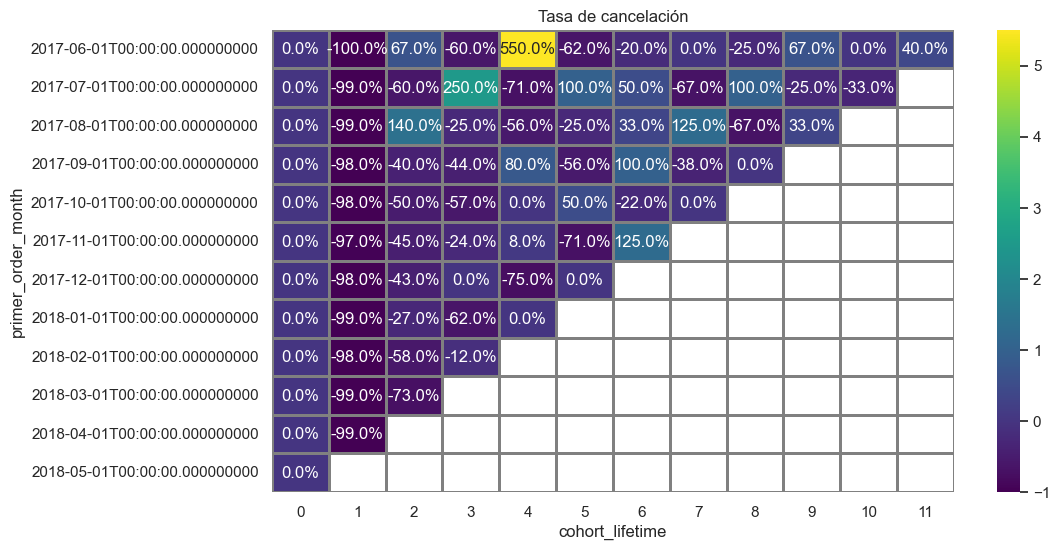

In [515]:
# Crear mapa de calor de la tasa de retención

churn_pivot_1d_touch_no = grupo_cancelacion_1d_touch_no.pivot_table(index='primer_order_month',
                                                              columns='cohort_lifetime', values='churn_rate', aggfunc='sum')

sns.set(style='white')

plt.figure(figsize=(11, 6))

plt.title('Tasa de cancelación')

sns.heatmap(churn_pivot_1d_touch_no, annot=True, fmt='.1%',
            linewidths=1, linecolor='gray', cmap='viridis')

#### **Cohorte: conversion_mas_30d_desktop_si**

**conversion_mas_30d_desktop_si** = Usuarios que realizan primer compra despúes de 30 días a partir que se registran, usan ‘desktop’ y llegaron por ‘sources’ 1, 2, 5. 



##### **Compras realizadas por cohorte**

Número total de compras: 4805

Compras realizadas por mes (conversion_mas_30d_desktop_si):
                        date_order
year_order month_order            
2017       7                    63
           8                    96
           9                   260
           10                  360
           11                  596
           12                  608
2018       1                   518
           2                   579
           3                   711
           4                   413
           5                   601



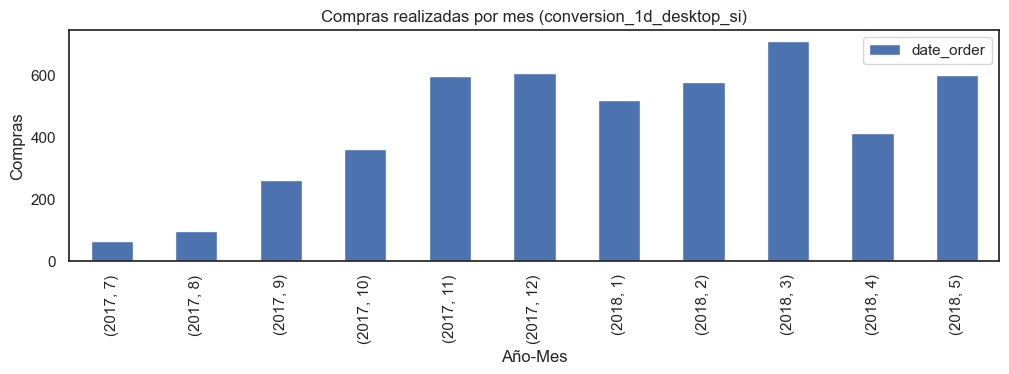

Compras promedio realizadas: date_order    437.0
dtype: float64


In [516]:
# Total de compras

total_compras_mas_30d_desktop_si = conversion_mas_30d_desktop_si['date_order'].count()

print('Número total de compras:', total_compras_mas_30d_desktop_si)

print()

# Número de compras realizadas por mes

compras_mas_30d_desktop_si = conversion_mas_30d_desktop_si.groupby(
    ['year_order', 'month_order']).agg({'date_order': 'count'})

print('Compras realizadas por mes (conversion_mas_30d_desktop_si):')

print(compras_mas_30d_desktop_si)

print()

# Gráfica de compras realizadas por mes

compras_mas_30d_desktop_si.plot(kind='bar', figsize=(12, 3))

plt.title('Compras realizadas por mes (conversion_1d_desktop_si)')

plt.xlabel('Año-Mes')

plt.ylabel('Compras')

plt.xticks(rotation=90)

plt.show()

# Compras promedio realizadas

mean_compras_mas_30d_desktop_si = conversion_mas_30d_desktop_si.groupby(
    ['year_order', 'month_order']).agg({'date_order': 'count'}).mean()

print('Compras promedio realizadas:', round(mean_compras_mas_30d_desktop_si))

##### **Usuarios por mes**

Usuarios únicos por mes (conversion_mas_30d_desktop_si):
                        uid
year_order month_order     
2017       7             51
           8             82
           9            177
           10           294
           11           417
           12           451
2018       1            455
           2            469
           3            522
           4            354
           5            452



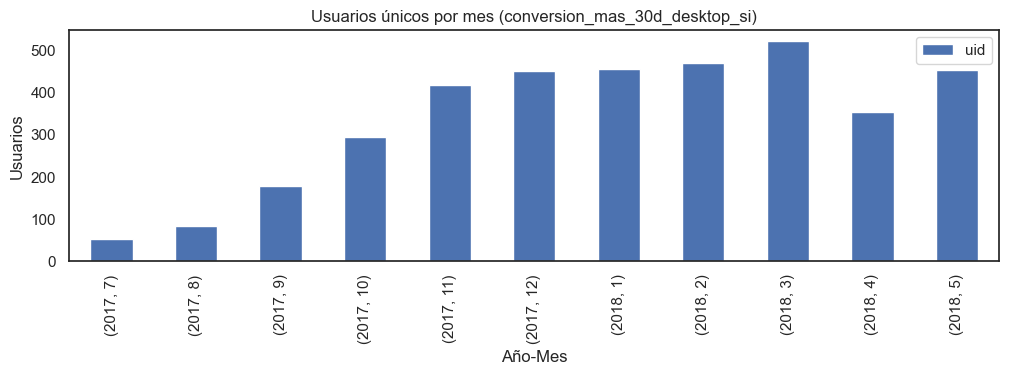

Usuarios unicos promedio: uid    338.545455
dtype: float64


In [517]:
# Usuarios únicos por mes

usuarios_unicos_mas_30d_desktop_si = conversion_mas_30d_desktop_si.groupby(
    ['year_order', 'month_order']).agg({'uid': 'nunique'})

print('Usuarios únicos por mes (conversion_mas_30d_desktop_si):')

print(usuarios_unicos_mas_30d_desktop_si)

print()

# Gráfica de usuarios únicos por mes

usuarios_unicos_mas_30d_desktop_si.plot(kind='bar', figsize=(12, 3))

plt.title('Usuarios únicos por mes (conversion_mas_30d_desktop_si)')

plt.xlabel('Año-Mes')

plt.ylabel('Usuarios')

plt.xticks(rotation=90)

plt.show()

# Usuarios unicos promedio

mean_usuarios_unicos_mas_30d_desktop_si = conversion_mas_30d_desktop_si.groupby(
    ['year_order', 'month_order']).agg({'uid': 'nunique'}).mean()

print('Usuarios unicos promedio:', mean_usuarios_unicos_mas_30d_desktop_si)

##### **Compras por usuario**

In [518]:
# Número de compras por usuario

compras_usuario_mas_30d_desktop_si = conversion_mas_30d_desktop_si.groupby(['uid']).agg(
    {'date_order': 'count'}).sort_values(by='date_order', ascending=False)

print('Compras por usuario (conversion_mas_30d_desktop_si):')

print(compras_usuario_mas_30d_desktop_si)

print()

Compras por usuario (conversion_mas_30d_desktop_si):
                      date_order
uid                             
970975784987511180            50
9737640335185488211           47
6268225112727843212           45
6853820180456171909           33
6121327041270917515           33
...                          ...
192717154104088642             1
9169568294260547073            1
196040824129463284             1
197656699872093187             1
16198228609991093561           1

[2941 rows x 1 columns]



##### **Revenue por mes**

Total revenue: $ 29890.08

                        revenue
year_order month_order         
2017       7             637.43
           8             702.15
           9            2291.70
           10           2780.93
           11           3311.54
           12           3007.71
2018       1            2523.15
           2            2900.63
           3            5321.40
           4            3137.14
           5            3276.30



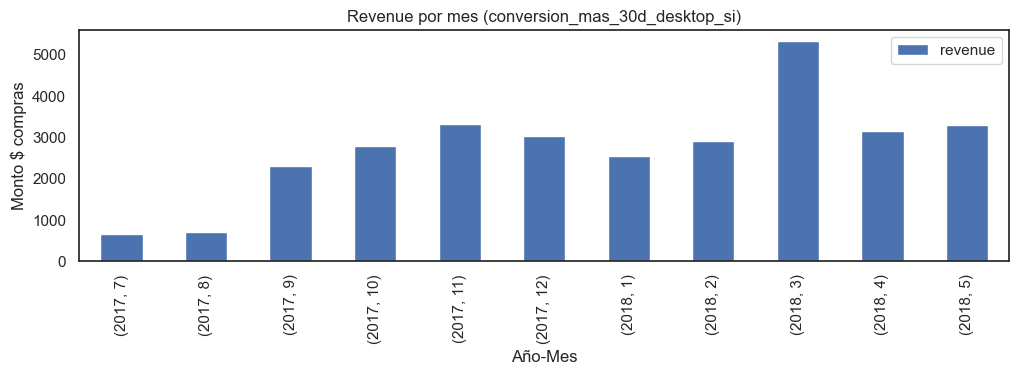

Revenue promedio: revenue    2717.0
dtype: float64


In [519]:
# Total de revenue

total_revenue_mas_30d_desktop_si = round(
    conversion_mas_30d_desktop_si['revenue'].sum(), 2)

print('Total revenue: $', total_revenue_mas_30d_desktop_si)

print()

# Monto de compras realizadas por mes

revenue_mas_30d_desktop_si = conversion_mas_30d_desktop_si.groupby(
    ['year_order', 'month_order']).agg({'revenue': 'sum'})

print(revenue_mas_30d_desktop_si)

print()

# Gráfica de revenue por mes

revenue_mas_30d_desktop_si.plot(kind='bar', figsize=(12, 3))

plt.title('Revenue por mes (conversion_mas_30d_desktop_si)')

plt.xlabel('Año-Mes')

plt.ylabel('Monto $ compras')

plt.xticks(rotation=90)

plt.show()

# Revenue promedio

mean_revenue_mas_30d_desktop_si = conversion_mas_30d_desktop_si.groupby(
    ['year_order', 'month_order']).agg({'revenue': 'sum'}).mean()

print('Revenue promedio:', round(mean_revenue_mas_30d_desktop_si))

##### **Revenue por usuario**

In [520]:
# Revenue compras por usuario

revenue_usuario_mas_30d_desktop_si = conversion_mas_30d_desktop_si.groupby(['uid']).agg(
    {'revenue': 'sum'}).sort_values(by='revenue', ascending=False)

print('Revenue por usuario (conversion_mas_30d_desktop_si):')

print(revenue_usuario_mas_30d_desktop_si)

print()

Revenue por usuario (conversion_mas_30d_desktop_si):
                      revenue
uid                          
9737640335185488211   1310.71
8539015707073391293   1240.76
6268225112727843212   1158.32
6853820180456171909   1034.03
14965030714373758003   754.08
...                       ...
4753996028306301103      0.09
4720963387217583085      0.06
12665462594442903743     0.06
12095888234977943150     0.03
225564980055156452       0.03

[2941 rows x 1 columns]



In [521]:
# Revenue promedio por usuario

revenue_promedio_usuario_mas_30d_desktop_si = round(
    revenue_usuario_mas_30d_desktop_si['revenue'].mean(), 2)

print('Revenue promedio por usuario (conversion_1d):',
      revenue_promedio_usuario_mas_30d_desktop_si)

Revenue promedio por usuario (conversion_1d): 10.16


##### **Tasa de retención**

In [522]:
# Calcular la semana del ciclo de vida del usuario mensual

conversion_mas_30d_desktop_si['order_month'] = pd.to_datetime(
    conversion_mas_30d_desktop_si['date_order'].dt.to_period('M').dt.to_timestamp())

conversion_mas_30d_desktop_si['primer_order_month'] = pd.to_datetime(
    conversion_mas_30d_desktop_si['fecha_primer_orden'].dt.to_period('M').dt.to_timestamp())

conversion_mas_30d_desktop_si['cohort_lifetime'] = (
    conversion_mas_30d_desktop_si['order_month'].dt.to_period('M') - conversion_mas_30d_desktop_si['primer_order_month'].dt.to_period('M'))

conversion_mas_30d_desktop_si['cohort_lifetime'] = conversion_mas_30d_desktop_si['cohort_lifetime'].apply(lambda x: x.n)

conversion_mas_30d_desktop_si['cohort_lifetime'] = conversion_mas_30d_desktop_si['cohort_lifetime'].astype(
    int)

print(conversion_mas_30d_desktop_si.head(3))
print()
print(conversion_mas_30d_desktop_si.cohort_lifetime.unique())

C:\Users\the_o\AppData\Local\Temp\ipykernel_5104\1542117564.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion_mas_30d_desktop_si['order_month'] = pd.to_datetime(
C:\Users\the_o\AppData\Local\Temp\ipykernel_5104\1542117564.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion_mas_30d_desktop_si['primer_order_month'] = pd.to_datetime(


                  buy_ts  revenue                  uid  year_order  \
2671 2017-07-06 10:01:00     0.18  8374490821494816916        2017   
2693 2017-07-06 13:16:00     0.28  4019314109429739010        2017   
2827 2017-07-08 10:32:00     3.67  9921903710376299545        2017   

      month_order  week_order date_order  hour_order fecha_primera_visita  \
2671            7          27 2017-07-06          10           2017-06-03   
2693            7          27 2017-07-06          13           2017-06-05   
2827            7          27 2017-07-08          10           2017-06-02   

     fecha_primer_orden tiempo_para_compra_1 order_month primer_order_month  \
2671         2017-07-06              33 days  2017-07-01         2017-07-01   
2693         2017-07-06              31 days  2017-07-01         2017-07-01   
2827         2017-07-08              36 days  2017-07-01         2017-07-01   

      cohort_lifetime  
2671                0  
2693                0  
2827                0

C:\Users\the_o\AppData\Local\Temp\ipykernel_5104\1542117564.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion_mas_30d_desktop_si['cohort_lifetime'] = (
C:\Users\the_o\AppData\Local\Temp\ipykernel_5104\1542117564.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion_mas_30d_desktop_si['cohort_lifetime'] = conversion_mas_30d_desktop_si['cohort_lifetime'].apply(lambda x: x.n)
C:\Users\the_o\AppData\Local\Temp\ipykernel_5104\1542117564.py:14: SettingWithCopyWarning: 
A value is trying to 

In [523]:
# Retención de usuarios por cohort lifetime

# Aplicar función printRetetionRate

cohort_mas_30d_desktop_si = printRetetionRate(conversion_mas_30d_desktop_si)

# Tabla dinámica

pivot_cohort_mas_30d_desktop_si = cohort_mas_30d_desktop_si.pivot_table(index='primer_order_month',
                                 columns='cohort_lifetime', values='retention', aggfunc='mean')

pivot_cohort_mas_30d_desktop_si = pivot_cohort_mas_30d_desktop_si.fillna('')

print(pivot_cohort_mas_30d_desktop_si)

cohort_lifetime      0     1     2     3     4     5     6     7     8     9   \
primer_order_month                                                              
2017-07-01          1.0   0.1  0.14  0.22  0.14  0.12  0.06  0.08   0.1  0.08   
2017-08-01          1.0  0.16  0.17  0.08  0.14  0.09  0.08  0.09  0.06  0.09   
2017-09-01          1.0  0.17  0.13  0.12  0.09  0.09  0.11  0.08  0.09         
2017-10-01          1.0  0.13  0.08  0.07  0.06  0.04  0.02  0.07               
2017-11-01          1.0  0.11  0.06  0.08  0.05  0.04  0.04                     
2017-12-01          1.0  0.06  0.06  0.06  0.02  0.05                           
2018-01-01          1.0  0.07  0.06  0.04  0.05                                 
2018-02-01          1.0  0.06  0.04  0.04                                       
2018-03-01          1.0  0.04  0.04                                             
2018-04-01          1.0  0.07                                                   
2018-05-01          1.0     

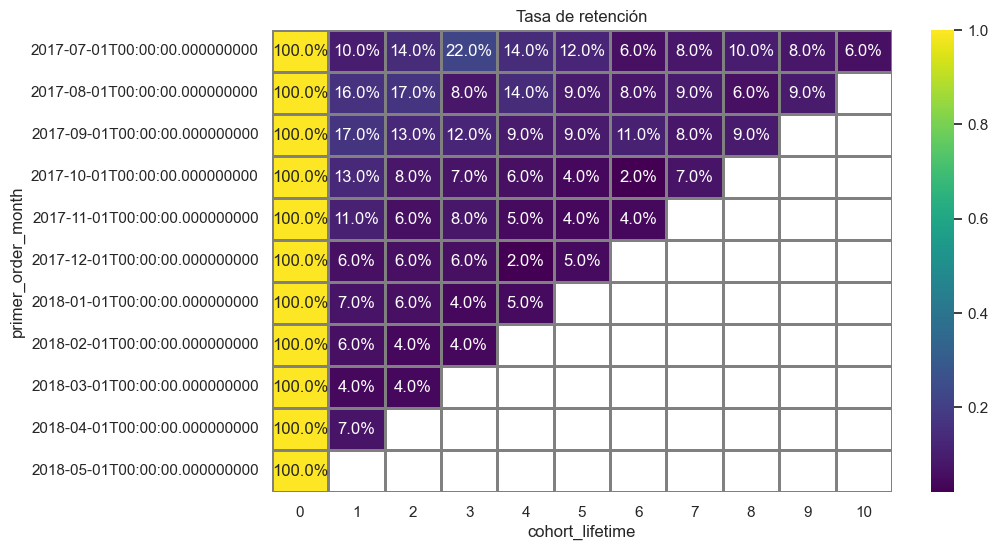

In [524]:
# Crear mapa de calor de la tasa de retención

pivot_cohort_mas_30d_desktop_si = cohort_mas_30d_desktop_si.pivot_table(index='primer_order_month',
                                                              columns='cohort_lifetime', values='retention', aggfunc='mean')

sns.set(style='white')

plt.figure(figsize=(10, 6))

plt.title('Tasa de retención')

sns.heatmap(pivot_cohort_mas_30d_desktop_si, annot=True, fmt='.1%',
            linewidths=1, linecolor='gray', cmap='viridis')

plt.show()

##### **Tasa de cancelación**

In [525]:
# Agrupación por primer_order_month y uid

grupo_cancelacion_mas_30d_desktop_si = (conversion_mas_30d_desktop_si.groupby(
    ['primer_order_month', 'cohort_lifetime']).agg({'uid': 'nunique'}).reset_index())

# Recuento inicial de usuarios

usuarios_iniciales_mas_30d_desktop_si = grupo_cancelacion_mas_30d_desktop_si[
    grupo_cancelacion_mas_30d_desktop_si['cohort_lifetime'] == 0][['primer_order_month', 'uid']]

usuarios_iniciales_mas_30d_desktop_si = usuarios_iniciales_mas_30d_desktop_si.rename(
    columns={'uid': 'cohort_users'})

# Unión con la agrupación

grupo_cancelacion_mas_30d_desktop_si = grupo_cancelacion_mas_30d_desktop_si.merge(
    usuarios_iniciales_1d_desktop_si, on='primer_order_month')

# Aplicar pct_change()

grupo_cancelacion_mas_30d_desktop_si['churn_rate'] = grupo_cancelacion_mas_30d_desktop_si.groupby(
    ['primer_order_month'])['uid'].pct_change().round(2)

print(grupo_cancelacion_mas_30d_desktop_si.head())

  primer_order_month  cohort_lifetime  uid  cohort_users  churn_rate
0         2017-07-01                0   51           667         NaN
1         2017-07-01                1    5           667       -0.90
2         2017-07-01                2    7           667        0.40
3         2017-07-01                3   11           667        0.57
4         2017-07-01                4    7           667       -0.36


In [526]:
# Tabla dinámica

churn_pivot_mas_30d_desktop_si = grupo_cancelacion_mas_30d_desktop_si.pivot_table(
    index='primer_order_month', columns='cohort_lifetime', values='churn_rate', aggfunc='sum')

churn_pivot_mas_30d_desktop_si = churn_pivot_mas_30d_desktop_si.fillna('')

print(churn_pivot_mas_30d_desktop_si)

cohort_lifetime      0     1     2     3     4     5     6     7     8    9   \
primer_order_month                                                             
2017-07-01          0.0  -0.9   0.4  0.57 -0.36 -0.14  -0.5  0.33  0.25 -0.2   
2017-08-01          0.0 -0.84  0.08 -0.54  0.83 -0.36 -0.14  0.17 -0.29  0.4   
2017-09-01          0.0 -0.83 -0.26 -0.05 -0.26   0.0  0.21 -0.24  0.08        
2017-10-01          0.0 -0.87 -0.35  -0.1 -0.17 -0.33  -0.5   2.2              
2017-11-01          0.0 -0.89 -0.44  0.23 -0.37 -0.18 -0.07                    
2017-12-01          0.0 -0.94   0.1 -0.13 -0.65  1.71                          
2018-01-01          0.0 -0.93 -0.12 -0.43  0.54                                
2018-02-01          0.0 -0.94 -0.41   0.0                                      
2018-03-01          0.0 -0.96 -0.12                                            
2018-04-01          0.0 -0.93                                                  
2018-05-01          0.0                 

<Axes: title={'center': 'Tasa de cancelación'}, xlabel='cohort_lifetime', ylabel='primer_order_month'>

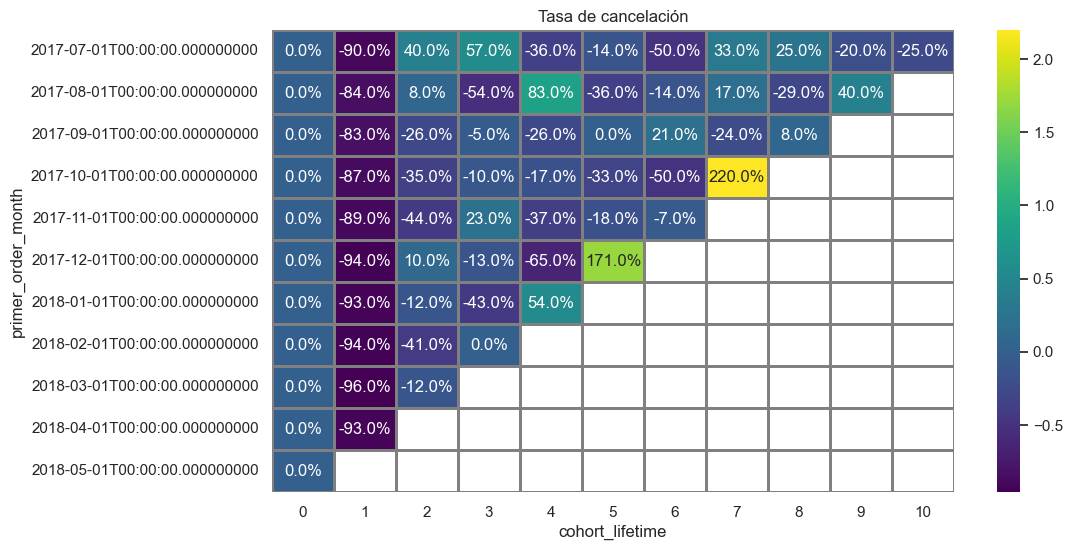

In [527]:
# Crear mapa de calor de la tasa de retención

churn_pivot_mas_30d_desktop_si = grupo_cancelacion_mas_30d_desktop_si.pivot_table(index='primer_order_month',
                                                              columns='cohort_lifetime', values='churn_rate', aggfunc='sum')

sns.set(style='white')

plt.figure(figsize=(11, 6))

plt.title('Tasa de cancelación')

sns.heatmap(churn_pivot_mas_30d_desktop_si, annot=True, fmt='.1%',
            linewidths=1, linecolor='gray', cmap='viridis')

#### **Cohorte: conversion_mas_30d_desktop_no**

**conversion_mas_30d_desktop_no** = Usuarios que realizan primer compra despúes de 30 días a partir que se registran, usan ‘desktop’ y **NO** llegaron por ‘sources’ 1, 2, 5. 


##### **Compras realizadas por cohorte**

Número total de compras: 538

Compras realizadas por mes (conversion_mas_30d_desktop_no):
                        date_order
year_order month_order            
2017       7                     5
           8                    13
           9                    26
           10                   36
           11                   58
           12                   89
2018       1                    95
           2                    61
           3                    69
           4                    28
           5                    58



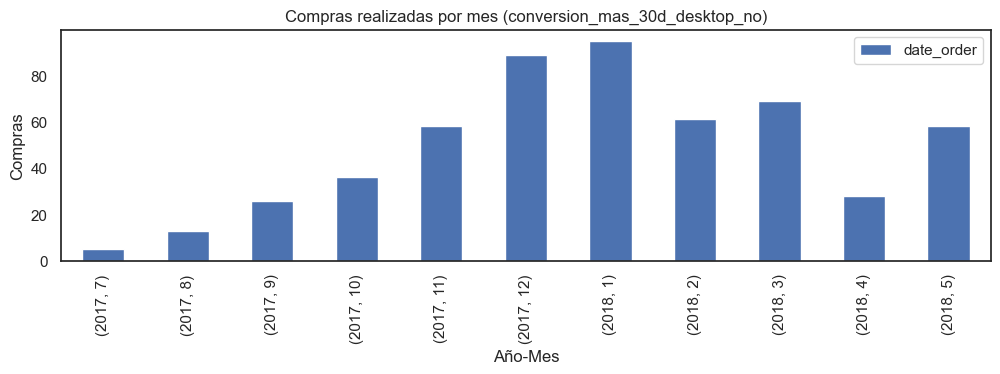

Compras promedio realizadas: date_order    49.0
dtype: float64


In [528]:
# Total de compras

total_compras_mas_30d_desktop_no = conversion_mas_30d_desktop_no['date_order'].count(
)

print('Número total de compras:', total_compras_mas_30d_desktop_no)

print()

# Número de compras realizadas por mes

compras_mas_30d_desktop_no = conversion_mas_30d_desktop_no.groupby(
    ['year_order', 'month_order']).agg({'date_order': 'count'})

print('Compras realizadas por mes (conversion_mas_30d_desktop_no):')

print(compras_mas_30d_desktop_no)

print()

# Gráfica de compras realizadas por mes

compras_mas_30d_desktop_no.plot(kind='bar', figsize=(12, 3))

plt.title('Compras realizadas por mes (conversion_mas_30d_desktop_no)')

plt.xlabel('Año-Mes')

plt.ylabel('Compras')

plt.xticks(rotation=90)

plt.show()

# Compras promedio realizadas

mean_compras_mas_30d_desktop_no = conversion_mas_30d_desktop_no.groupby(
    ['year_order', 'month_order']).agg({'date_order': 'count'}).mean()

print('Compras promedio realizadas:', round(mean_compras_mas_30d_desktop_no))

##### **Usuarios por mes**

Usuarios únicos por mes (conversion_mas_30d_desktop_no):
                        uid
year_order month_order     
2017       7              3
           8             11
           9             23
           10            32
           11            50
           12            70
2018       1             76
           2             58
           3             55
           4             27
           5             53



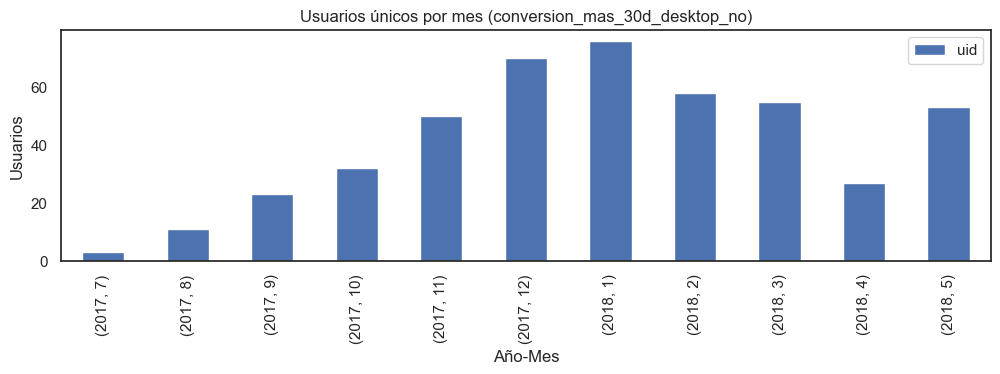

Usuarios unicos promedio: uid    41.636364
dtype: float64


In [529]:
# Usuarios únicos por mes

usuarios_unicos_mas_30d_desktop_no = conversion_mas_30d_desktop_no.groupby(
    ['year_order', 'month_order']).agg({'uid': 'nunique'})

print('Usuarios únicos por mes (conversion_mas_30d_desktop_no):')

print(usuarios_unicos_mas_30d_desktop_no)

print()

# Gráfica de usuarios únicos por mes

usuarios_unicos_mas_30d_desktop_no.plot(kind='bar', figsize=(12, 3))

plt.title('Usuarios únicos por mes (conversion_mas_30d_desktop_no)')

plt.xlabel('Año-Mes')

plt.ylabel('Usuarios')

plt.xticks(rotation=90)

plt.show()

# Usuarios unicos promedio

mean_usuarios_unicos_mas_30d_desktop_no = conversion_mas_30d_desktop_no.groupby(
    ['year_order', 'month_order']).agg({'uid': 'nunique'}).mean()

print('Usuarios unicos promedio:', mean_usuarios_unicos_mas_30d_desktop_no)

##### **Compras por usuario**

In [530]:
# Número de compras por usuario

compras_usuario_mas_30d_desktop_no = conversion_mas_30d_desktop_no.groupby(['uid']).agg(
    {'date_order': 'count'}).sort_values(by='date_order', ascending=False)

print('Compras por usuario (conversion_mas_30d_desktop_no):')

print(compras_usuario_mas_30d_desktop_no)

print()

Compras por usuario (conversion_mas_30d_desktop_no):
                      date_order
uid                             
4623220647940630228           10
6444568725642094739            8
5579250741107043745            6
10306293725629775956           6
7699781706371541039            5
...                          ...
1730614594398037953            1
802306653839354575             1
1745249359059090513            1
903888275735815131             1
15968141449391920894           1

[405 rows x 1 columns]



##### **Revenue por mes**

Total revenue: $ 2686.28

                        revenue
year_order month_order         
2017       7              11.60
           8              80.71
           9             114.35
           10            131.51
           11            807.39
           12            369.55
2018       1             332.86
           2             291.85
           3             278.98
           4              99.47
           5             168.01



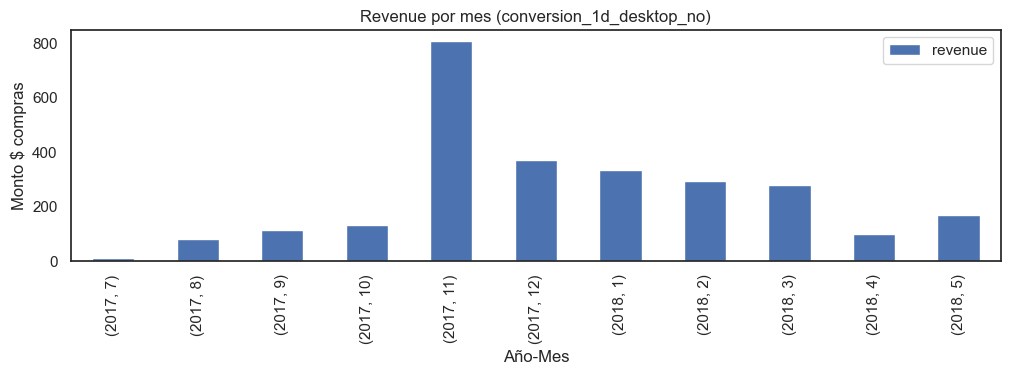

Revenue promedio: revenue    244.0
dtype: float64


In [531]:
# Total de revenue

total_revenue_mas_30d_desktop_no = round(
    conversion_mas_30d_desktop_no['revenue'].sum(), 2)

print('Total revenue: $', total_revenue_mas_30d_desktop_no)

print()

# Monto de compras realizadas por mes

revenue_mas_30d_desktop_no = conversion_mas_30d_desktop_no.groupby(
    ['year_order', 'month_order']).agg({'revenue': 'sum'})

print(revenue_mas_30d_desktop_no)

print()

# Gráfica de revenue por mes

revenue_mas_30d_desktop_no.plot(kind='bar', figsize=(12, 3))

plt.title('Revenue por mes (conversion_1d_desktop_no)')

plt.xlabel('Año-Mes')

plt.ylabel('Monto $ compras')

plt.xticks(rotation=90)

plt.show()

# Revenue promedio

mean_revenue_mas_30d_desktop_no = conversion_mas_30d_desktop_no.groupby(
    ['year_order', 'month_order']).agg({'revenue': 'sum'}).mean()

print('Revenue promedio:', round(mean_revenue_mas_30d_desktop_no))

##### **Revenue por usuario**

In [532]:
# Revenue compras por usuario

revenue_usuario_mas_30d_desktop_no = conversion_mas_30d_desktop_no.groupby(['uid']).agg(
    {'revenue': 'sum'}).sort_values(by='revenue', ascending=False)

print('Revenue por usuario (conversion_mas_30d_desktop_no):')

print(revenue_usuario_mas_30d_desktop_no)

print()

Revenue por usuario (conversion_mas_30d_desktop_no):
                      revenue
uid                          
17736660553583784503   549.99
4623220647940630228     69.16
6964122042772203081     59.27
10306293725629775956    51.34
6029931434012792990     46.44
...                       ...
1525010699643208692      0.18
9927624735473367314      0.12
10066152832922017731     0.12
7280867604594257671      0.06
4750760231133353302      0.06

[405 rows x 1 columns]



In [533]:
# Revenue promedio por usuario

revenue_promedio_usuario_mas_30d_desktop_no = round(
    revenue_usuario_mas_30d_desktop_no['revenue'].mean(), 2)

print('Revenue promedio por usuario (conversion_mas_30d):',
      revenue_promedio_usuario_mas_30d_desktop_no)

Revenue promedio por usuario (conversion_mas_30d): 6.63


##### **Tasa de retención**

In [534]:
# Calcular la semana del ciclo de vida del usuario mensual

conversion_mas_30d_desktop_no['order_month'] = pd.to_datetime(
    conversion_mas_30d_desktop_no['date_order'].dt.to_period('M').dt.to_timestamp())

conversion_mas_30d_desktop_no['primer_order_month'] = pd.to_datetime(
    conversion_mas_30d_desktop_no['fecha_primer_orden'].dt.to_period('M').dt.to_timestamp())

conversion_mas_30d_desktop_no['cohort_lifetime'] = (
    conversion_mas_30d_desktop_no['order_month'].dt.to_period('M') - conversion_mas_30d_desktop_no['primer_order_month'].dt.to_period('M'))

conversion_mas_30d_desktop_no['cohort_lifetime'] = conversion_mas_30d_desktop_no['cohort_lifetime'].apply(
    lambda x: x.n)

conversion_mas_30d_desktop_no['cohort_lifetime'] = conversion_mas_30d_desktop_no['cohort_lifetime'].astype(
    int)

print(conversion_mas_30d_desktop_no.head(3))
print()
print(conversion_mas_30d_desktop_no.cohort_lifetime.unique())

                  buy_ts  revenue                  uid  year_order  \
2426 2017-07-02 14:28:00     0.61  6150949644213786864        2017   
2736 2017-07-06 21:08:00     1.83  6150949644213786864        2017   
4050 2017-07-20 16:24:00     5.50   844700932473996864        2017   

      month_order  week_order date_order  hour_order fecha_primera_visita  \
2426            7          26 2017-07-02          14           2017-06-01   
2736            7          27 2017-07-06          21           2017-06-01   
4050            7          29 2017-07-20          16           2017-06-17   

     fecha_primer_orden tiempo_para_compra_1 order_month primer_order_month  \
2426         2017-07-02              31 days  2017-07-01         2017-07-01   
2736         2017-07-02              31 days  2017-07-01         2017-07-01   
4050         2017-07-20              33 days  2017-07-01         2017-07-01   

      cohort_lifetime  
2426                0  
2736                0  
4050                0

C:\Users\the_o\AppData\Local\Temp\ipykernel_5104\4174817860.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion_mas_30d_desktop_no['order_month'] = pd.to_datetime(
C:\Users\the_o\AppData\Local\Temp\ipykernel_5104\4174817860.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion_mas_30d_desktop_no['primer_order_month'] = pd.to_datetime(
C:\Users\the_o\AppData\Local\Temp\ipykernel_5104\4174817860.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [535]:
# Retención de usuarios por cohort lifetime

# Aplicar función printRetetionRate

cohort_mas_30d_desktop_no = printRetetionRate(conversion_mas_30d_desktop_no)

# Tabla dinámica

pivot_cohort_mas_30d_desktop_no = cohort_mas_30d_desktop_no.pivot_table(index='primer_order_month',
                                 columns='cohort_lifetime', values='retention', aggfunc='mean')

pivot_cohort_mas_30d_desktop_no = pivot_cohort_mas_30d_desktop_no.fillna('')

print(pivot_cohort_mas_30d_desktop_no)

cohort_lifetime       0     1     2     3     4     5     6     7     9
primer_order_month                                                     
2017-07-01          1.0        0.33        0.33  0.67  0.67            
2017-08-01          1.0  0.18  0.09  0.18  0.09        0.09  0.09  0.09
2017-09-01          1.0  0.05  0.05        0.05   0.1                  
2017-10-01          1.0  0.13  0.03  0.03  0.03        0.03  0.07      
2017-11-01          1.0  0.02  0.07  0.02  0.02        0.05            
2017-12-01          1.0  0.09  0.03        0.02                        
2018-01-01          1.0        0.02        0.02                        
2018-02-01          1.0  0.06  0.02                                    
2018-03-01          1.0                                                
2018-04-01          1.0                                                
2018-05-01          1.0                                                


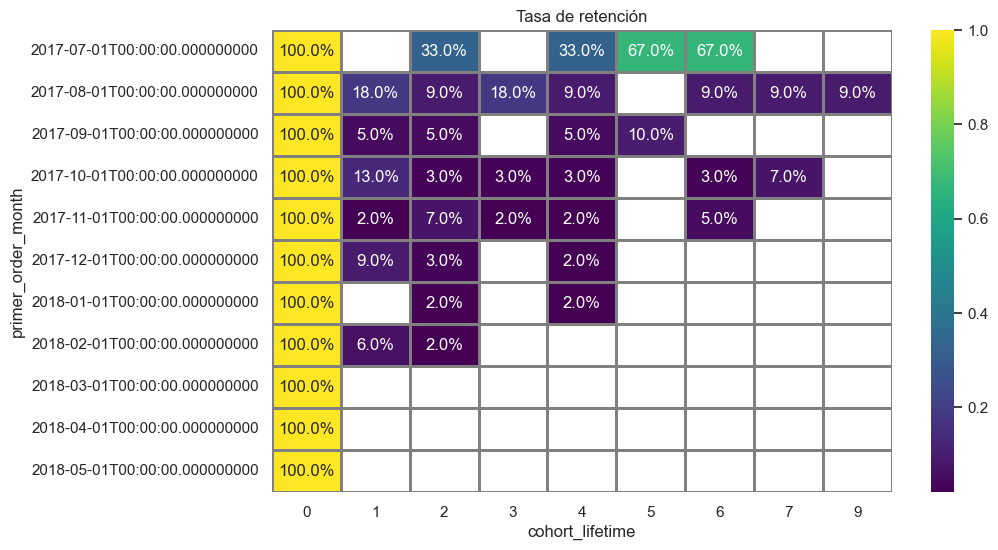

In [536]:
# Crear mapa de calor de la tasa de retención

pivot_cohort_mas_30d_desktop_no = cohort_mas_30d_desktop_no.pivot_table(index='primer_order_month',
                                                              columns='cohort_lifetime', values='retention', aggfunc='mean')

sns.set(style='white')

plt.figure(figsize=(10, 6))

plt.title('Tasa de retención')

sns.heatmap(pivot_cohort_mas_30d_desktop_no, annot=True, fmt='.1%',
            linewidths=1, linecolor='gray', cmap='viridis')

plt.show()

##### **Tasa de cancelación**

In [537]:
# Agrupación por primer_order_month y uid

grupo_cancelacion_mas_30d_desktop_no = (conversion_mas_30d_desktop_no.groupby(
    ['primer_order_month', 'cohort_lifetime']).agg({'uid': 'nunique'}).reset_index())

# Recuento inicial de usuarios

usuarios_iniciales_mas_30d_desktop_no = grupo_cancelacion_mas_30d_desktop_no[grupo_cancelacion_mas_30d_desktop_no['cohort_lifetime'] == 0][[
    'primer_order_month', 'uid']]

usuarios_iniciales_mas_30d_desktop_no = usuarios_iniciales_mas_30d_desktop_no.rename(
    columns={'uid': 'cohort_users'})

# Unión con la agrupación

grupo_cancelacion_mas_30d_desktop_no = grupo_cancelacion_mas_30d_desktop_no.merge(
    usuarios_iniciales_mas_30d_desktop_no, on='primer_order_month')

# Aplicar pct_change()

grupo_cancelacion_mas_30d_desktop_no['churn_rate'] = grupo_cancelacion_mas_30d_desktop_no.groupby(
    ['primer_order_month'])['uid'].pct_change().round(2)

print(grupo_cancelacion_mas_30d_desktop_no.head())

  primer_order_month  cohort_lifetime  uid  cohort_users  churn_rate
0         2017-07-01                0    3             3         NaN
1         2017-07-01                2    1             3       -0.67
2         2017-07-01                4    1             3        0.00
3         2017-07-01                5    2             3        1.00
4         2017-07-01                6    2             3        0.00


In [538]:
# Tabla dinámica

churn_pivot_mas_30d_desktop_no = grupo_cancelacion_mas_30d_desktop_no.pivot_table(
    index='primer_order_month', columns='cohort_lifetime', values='churn_rate', aggfunc='sum')

churn_pivot_mas_30d_desktop_no = churn_pivot_mas_30d_desktop_no.fillna('')

print(churn_pivot_mas_30d_desktop_no)

cohort_lifetime       0     1     2     3    4    5    6    7    9
primer_order_month                                                
2017-07-01          0.0       -0.67        0.0  1.0  0.0          
2017-08-01          0.0 -0.82  -0.5   1.0 -0.5       0.0  0.0  0.0
2017-09-01          0.0 -0.95   0.0        0.0  1.0               
2017-10-01          0.0 -0.87 -0.75   0.0  0.0       0.0  1.0     
2017-11-01          0.0 -0.98   2.0 -0.67  0.0       1.0          
2017-12-01          0.0 -0.91 -0.67       -0.5                    
2018-01-01          0.0       -0.98        0.0                    
2018-02-01          0.0 -0.94 -0.67                               
2018-03-01          0.0                                           
2018-04-01          0.0                                           
2018-05-01          0.0                                           


<Axes: title={'center': 'Tasa de cancelación'}, xlabel='cohort_lifetime', ylabel='primer_order_month'>

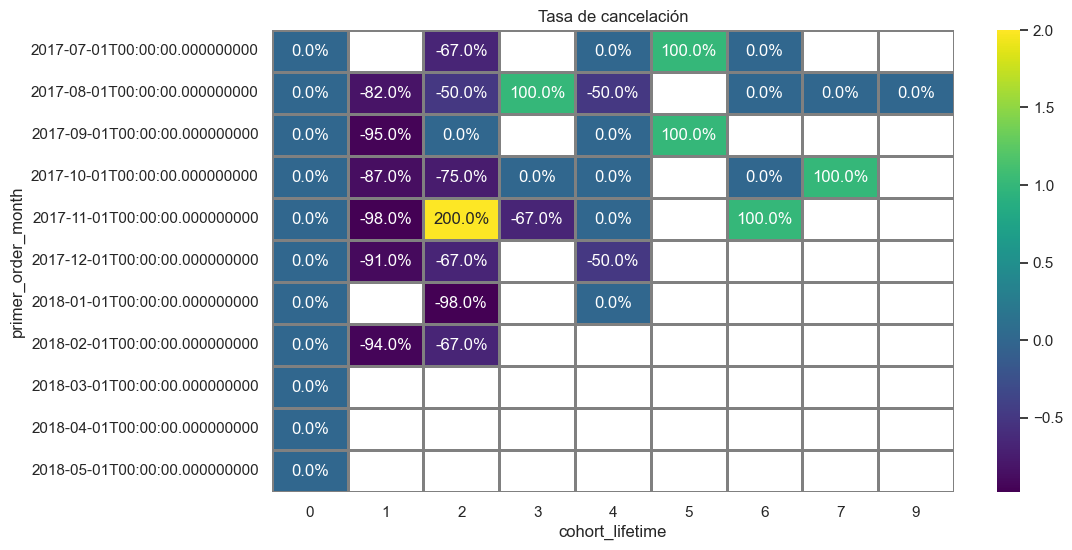

In [539]:
# Crear mapa de calor de la tasa de retención

churn_pivot_mas_30d_desktop_no = grupo_cancelacion_mas_30d_desktop_no.pivot_table(index='primer_order_month',
                                                              columns='cohort_lifetime', values='churn_rate', aggfunc='sum')

sns.set(style='white')

plt.figure(figsize=(11, 6))

plt.title('Tasa de cancelación')

sns.heatmap(churn_pivot_mas_30d_desktop_no, annot=True, fmt='.1%',
            linewidths=1, linecolor='gray', cmap='viridis')

#### **Cohorte: conversion_mas_30d_touch_si**

**conversion_mas_30d_touch_si** = Usuarios que realizan primer compra despúes de 30 días a partir que se registran, usan ‘touch’ y llegaron por ‘sources’ 1, 2, 5.  

##### **Compras realizadas por cohorte**

Número total de compras: 2155

Compras realizadas por mes (conversion_mas_30d_touch_si):
                        date_order
year_order month_order            
2017       7                    33
           8                    51
           9                   123
           10                  162
           11                  302
           12                  308
2018       1                   231
           2                   266
           3                   287
           4                   144
           5                   248



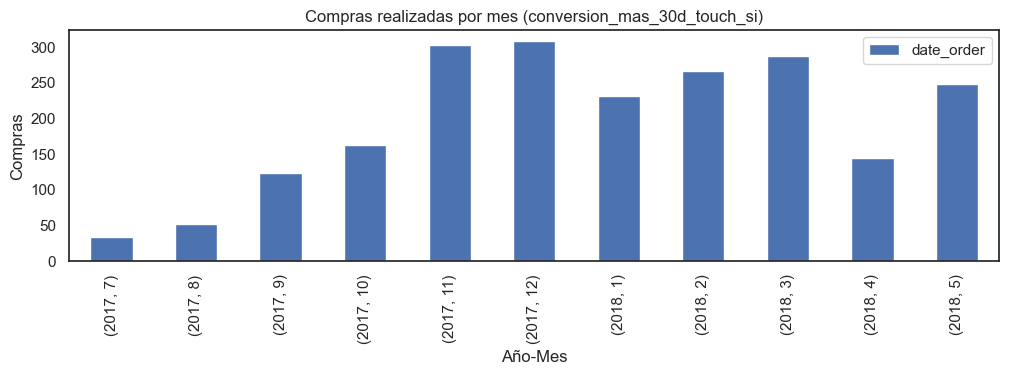

Compras promedio realizadas: date_order    196.0
dtype: float64


In [540]:
# Total de compras

total_compras_mas_30d_touch_si = conversion_mas_30d_touch_si['date_order'].count(
)

print('Número total de compras:', total_compras_mas_30d_touch_si)

print()

# Número de compras realizadas por mes

compras_mas_30d_touch_si = conversion_mas_30d_touch_si.groupby(
    ['year_order', 'month_order']).agg({'date_order': 'count'})

print('Compras realizadas por mes (conversion_mas_30d_touch_si):')

print(compras_mas_30d_touch_si)

print()

# Gráfica de compras realizadas por mes

compras_mas_30d_touch_si.plot(kind='bar', figsize=(12, 3))

plt.title('Compras realizadas por mes (conversion_mas_30d_touch_si)')

plt.xlabel('Año-Mes')

plt.ylabel('Compras')

plt.xticks(rotation=90)

plt.show()

# Compras promedio realizadas

mean_compras_mas_30d_touch_si = conversion_mas_30d_touch_si.groupby(
    ['year_order', 'month_order']).agg({'date_order': 'count'}).mean()

print('Compras promedio realizadas:', round(mean_compras_mas_30d_touch_si))

##### **Usuarios por mes**

Usuarios únicos por mes (conversion_mas_30d_touch_si):
                        uid
year_order month_order     
2017       7             23
           8             39
           9             87
           10           126
           11           199
           12           210
2018       1            193
           2            210
           3            202
           4            124
           5            176



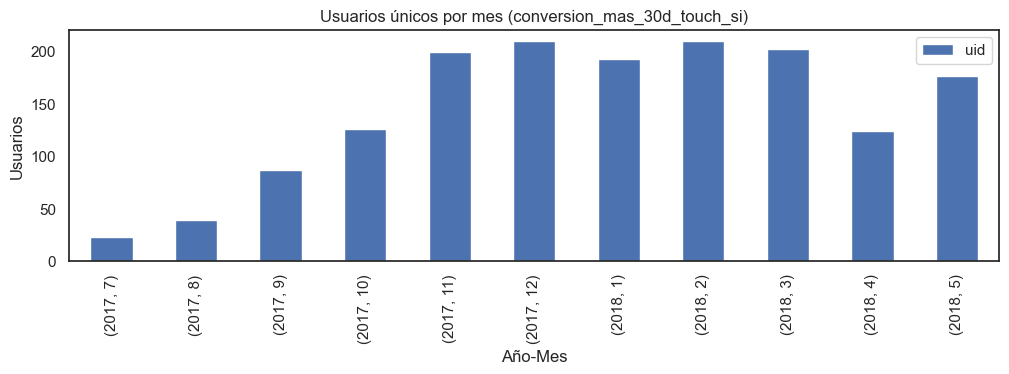

Usuarios unicos promedio: uid    144.454545
dtype: float64


In [541]:
# Usuarios únicos por mes

usuarios_unicos_mas_30d_touch_si = conversion_mas_30d_touch_si.groupby(
    ['year_order', 'month_order']).agg({'uid': 'nunique'})

print('Usuarios únicos por mes (conversion_mas_30d_touch_si):')

print(usuarios_unicos_mas_30d_touch_si)

print()

# Gráfica de usuarios únicos por mes

usuarios_unicos_mas_30d_touch_si.plot(kind='bar', figsize=(12, 3))

plt.title('Usuarios únicos por mes (conversion_mas_30d_touch_si)')

plt.xlabel('Año-Mes')

plt.ylabel('Usuarios')

plt.xticks(rotation=90)

plt.show()

# Usuarios unicos promedio

mean_usuarios_unicos_mas_30d_touch_si = conversion_mas_30d_touch_si.groupby(
    ['year_order', 'month_order']).agg({'uid': 'nunique'}).mean()

print('Usuarios unicos promedio:', mean_usuarios_unicos_mas_30d_touch_si)

##### **Compras por usuario**

In [542]:
# Número de compras por usuario

compras_usuario_mas_30d_touch_si = conversion_mas_30d_touch_si.groupby(['uid']).agg(
    {'date_order': 'count'}).sort_values(by='date_order', ascending=False)

print('Compras por usuario (conversion_mas_30d_touch_si):')

print(compras_usuario_mas_30d_touch_si)

print()

Compras por usuario (conversion_mas_30d_touch_si):
                      date_order
uid                             
6268225112727843212           45
6121327041270917515           33
6853820180456171909           33
5894138436147686046           28
14965030714373758003          25
...                          ...
18200691493472242789           1
18179239923605291852           1
265988816288684769             1
205758575872766730             1
197656699872093187             1

[1220 rows x 1 columns]



##### **Revenue por mes**

Total revenue: $ 15522.43

                        revenue
year_order month_order         
2017       7             463.71
           8             410.20
           9            1175.53
           10           1435.06
           11           2322.52
           12           1459.56
2018       1            1286.27
           2            1504.88
           3            2785.40
           4            1517.46
           5            1161.84



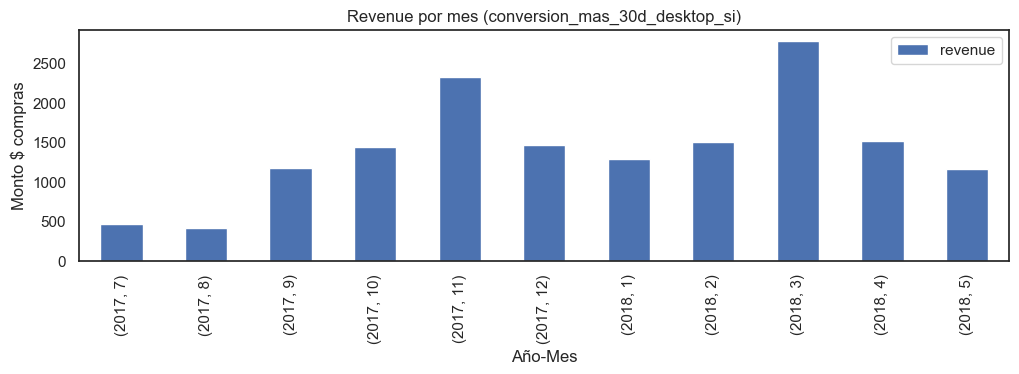

Revenue promedio: revenue    1411.0
dtype: float64


In [543]:
# Total de revenue

total_revenue_mas_30d_touch_si = round(
    conversion_mas_30d_touch_si['revenue'].sum(), 2)

print('Total revenue: $', total_revenue_mas_30d_touch_si)

print()

# Monto de compras realizadas por mes

revenue_mas_30d_touch_si = conversion_mas_30d_touch_si.groupby(
    ['year_order', 'month_order']).agg({'revenue': 'sum'})

print(revenue_mas_30d_touch_si)

print()

# Gráfica de revenue por mes

revenue_mas_30d_touch_si.plot(kind='bar', figsize=(12, 3))

plt.title('Revenue por mes (conversion_mas_30d_desktop_si)')

plt.xlabel('Año-Mes')

plt.ylabel('Monto $ compras')

plt.xticks(rotation=90)

plt.show()

# Revenue promedio

mean_revenue_mas_30d_touch_si = conversion_mas_30d_touch_si.groupby(
    ['year_order', 'month_order']).agg({'revenue': 'sum'}).mean()

print('Revenue promedio:', round(mean_revenue_mas_30d_touch_si))

##### **Revenue por usuario**

In [544]:
# Revenue compras por usuario

revenue_usuario_mas_30d_touch_si = conversion_mas_30d_touch_si.groupby(['uid']).agg(
    {'revenue': 'sum'}).sort_values(by='revenue', ascending=False)

print('Revenue por usuario (conversion_mas_30d_touch_si):')

print(revenue_usuario_mas_30d_touch_si)

print()

Revenue por usuario (conversion_mas_30d_touch_si):
                      revenue
uid                          
8539015707073391293   1240.76
6268225112727843212   1158.32
6853820180456171909   1034.03
14965030714373758003   754.08
17736660553583784503   549.99
...                       ...
9927624735473367314      0.12
11711946925199522200     0.09
4750760231133353302      0.06
4720963387217583085      0.06
7280867604594257671      0.06

[1220 rows x 1 columns]



In [545]:
# Revenue promedio por usuario

revenue_promedio_usuario_mas_30d_touch_si = round(
    revenue_usuario_mas_30d_touch_si['revenue'].mean(), 2)

print('Revenue promedio por usuario (conversion_mas_30d):',
      revenue_promedio_usuario_mas_30d_touch_si)

Revenue promedio por usuario (conversion_mas_30d): 12.72


##### **Tasa de retención**

In [546]:
# Calcular la semana del ciclo de vida del usuario mensual

conversion_mas_30d_touch_si['order_month'] = pd.to_datetime(
    conversion_mas_30d_touch_si['date_order'].dt.to_period('M').dt.to_timestamp())

conversion_mas_30d_touch_si['primer_order_month'] = pd.to_datetime(
    conversion_mas_30d_touch_si['fecha_primer_orden'].dt.to_period('M').dt.to_timestamp())

conversion_mas_30d_touch_si['cohort_lifetime'] = (
    conversion_mas_30d_touch_si['order_month'].dt.to_period('M') - conversion_mas_30d_touch_si['primer_order_month'].dt.to_period('M'))

conversion_mas_30d_touch_si['cohort_lifetime'] = conversion_mas_30d_touch_si['cohort_lifetime'].apply(lambda x: x.n)

conversion_mas_30d_touch_si['cohort_lifetime'] = conversion_mas_30d_touch_si['cohort_lifetime'].astype(
    int)

print(conversion_mas_30d_touch_si.head(3))
print()
print(conversion_mas_30d_touch_si.cohort_lifetime.unique())

                  buy_ts  revenue                  uid  year_order  \
2426 2017-07-02 14:28:00     0.61  6150949644213786864        2017   
2736 2017-07-06 21:08:00     1.83  6150949644213786864        2017   
2827 2017-07-08 10:32:00     3.67  9921903710376299545        2017   

      month_order  week_order date_order  hour_order fecha_primera_visita  \
2426            7          26 2017-07-02          14           2017-06-01   
2736            7          27 2017-07-06          21           2017-06-01   
2827            7          27 2017-07-08          10           2017-06-02   

     fecha_primer_orden tiempo_para_compra_1 order_month primer_order_month  \
2426         2017-07-02              31 days  2017-07-01         2017-07-01   
2736         2017-07-02              31 days  2017-07-01         2017-07-01   
2827         2017-07-08              36 days  2017-07-01         2017-07-01   

      cohort_lifetime  
2426                0  
2736                0  
2827                0

C:\Users\the_o\AppData\Local\Temp\ipykernel_5104\2398947767.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion_mas_30d_touch_si['order_month'] = pd.to_datetime(
C:\Users\the_o\AppData\Local\Temp\ipykernel_5104\2398947767.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion_mas_30d_touch_si['primer_order_month'] = pd.to_datetime(
C:\Users\the_o\AppData\Local\Temp\ipykernel_5104\2398947767.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [547]:
# Retención de usuarios por cohort lifetime

# Aplicar función printRetetionRate

cohort_mas_30d_touch_si = printRetetionRate(conversion_mas_30d_touch_si)

# Tabla dinámica

pivot_cohort_mas_30d_touch_si = cohort_mas_30d_touch_si.pivot_table(index='primer_order_month',
                                 columns='cohort_lifetime', values='retention', aggfunc='mean')

pivot_cohort_mas_30d_touch_si = pivot_cohort_mas_30d_touch_si.fillna('')

print(pivot_cohort_mas_30d_touch_si)

cohort_lifetime      0     1     2     3     4     5     6     7     8     9   \
primer_order_month                                                              
2017-07-01          1.0  0.09  0.13  0.13  0.22  0.26  0.17  0.17  0.09  0.17   
2017-08-01          1.0  0.11  0.16  0.14  0.11  0.05  0.05  0.14  0.03  0.14   
2017-09-01          1.0  0.18  0.15  0.12  0.09  0.11  0.09  0.08  0.08         
2017-10-01          1.0  0.17  0.07  0.07  0.07  0.04  0.04   0.1               
2017-11-01          1.0  0.13  0.08  0.09  0.04  0.04  0.03                     
2017-12-01          1.0  0.06  0.07  0.03  0.02  0.04                           
2018-01-01          1.0  0.03  0.04  0.02  0.05                                 
2018-02-01          1.0  0.09  0.04  0.05                                       
2018-03-01          1.0  0.04  0.04                                             
2018-04-01          1.0  0.07                                                   
2018-05-01          1.0     

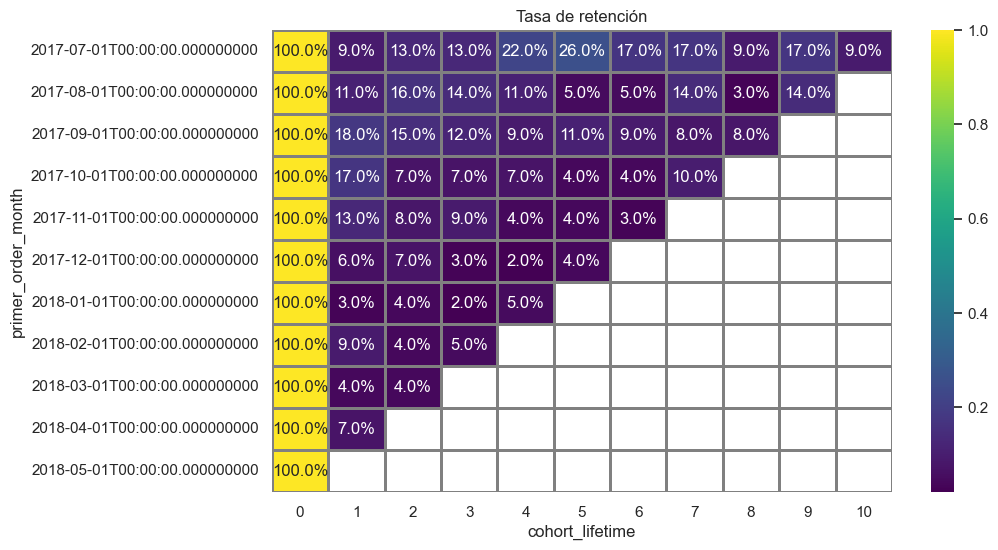

In [548]:
# Crear mapa de calor de la tasa de retención

pivot_cohort_mas_30d_touch_si = cohort_mas_30d_touch_si.pivot_table(index='primer_order_month',
                                                              columns='cohort_lifetime', values='retention', aggfunc='mean')

sns.set(style='white')

plt.figure(figsize=(10, 6))

plt.title('Tasa de retención')

sns.heatmap(pivot_cohort_mas_30d_touch_si, annot=True, fmt='.1%',
            linewidths=1, linecolor='gray', cmap='viridis')

plt.show()

##### **Tasa de cancelación**

In [549]:
# Agrupación por primer_order_month y uid

grupo_cancelacion_mas_30d_touch_si = (conversion_mas_30d_touch_si.groupby(
    ['primer_order_month', 'cohort_lifetime']).agg({'uid': 'nunique'}).reset_index())

# Recuento inicial de usuarios

usuarios_iniciales_mas_30d_touch_si = grupo_cancelacion_mas_30d_touch_si[grupo_cancelacion_mas_30d_touch_si['cohort_lifetime'] == 0][[
    'primer_order_month', 'uid']]

usuarios_iniciales_mas_30d_touch_si = usuarios_iniciales_mas_30d_touch_si.rename(columns={'uid':'cohort_users'})

# Unión con la agrupación

grupo_cancelacion_mas_30d_touch_si = grupo_cancelacion_mas_30d_touch_si.merge(usuarios_iniciales_mas_30d_touch_si, on='primer_order_month')

# Aplicar pct_change()

grupo_cancelacion_mas_30d_touch_si['churn_rate'] = grupo_cancelacion_mas_30d_touch_si.groupby(
    ['primer_order_month'])['uid'].pct_change().round(2)

print(grupo_cancelacion_mas_30d_touch_si.head())

  primer_order_month  cohort_lifetime  uid  cohort_users  churn_rate
0         2017-07-01                0   23            23         NaN
1         2017-07-01                1    2            23       -0.91
2         2017-07-01                2    3            23        0.50
3         2017-07-01                3    3            23        0.00
4         2017-07-01                4    5            23        0.67


In [550]:
# Tabla dinámica

churn_pivot_mas_30d_touch_si = grupo_cancelacion_mas_30d_touch_si.pivot_table(
    index='primer_order_month', columns='cohort_lifetime', values='churn_rate', aggfunc='sum')

churn_pivot_mas_30d_touch_si = churn_pivot_mas_30d_touch_si.fillna('')

print(churn_pivot_mas_30d_touch_si)

cohort_lifetime      0     1     2     3     4     5     6     7    8    9   \
primer_order_month                                                            
2017-07-01          0.0 -0.91   0.5   0.0  0.67   0.2 -0.33   0.0 -0.5  1.0   
2017-08-01          0.0 -0.89   0.5 -0.17  -0.2  -0.5   0.0   1.5 -0.8  4.0   
2017-09-01          0.0 -0.82 -0.14 -0.17  -0.3  0.29 -0.22 -0.14  0.0        
2017-10-01          0.0 -0.83 -0.61   0.0   0.0 -0.43   0.0   1.5             
2017-11-01          0.0 -0.87 -0.35  0.15 -0.53   0.0 -0.29                   
2017-12-01          0.0 -0.94   0.1 -0.55  -0.2  0.75                         
2018-01-01          0.0 -0.97   0.5  -0.5  1.67                               
2018-02-01          0.0 -0.91 -0.53  0.14                                     
2018-03-01          0.0 -0.96   0.0                                           
2018-04-01          0.0 -0.93                                                 
2018-05-01          0.0                             

<Axes: title={'center': 'Tasa de cancelación'}, xlabel='cohort_lifetime', ylabel='primer_order_month'>

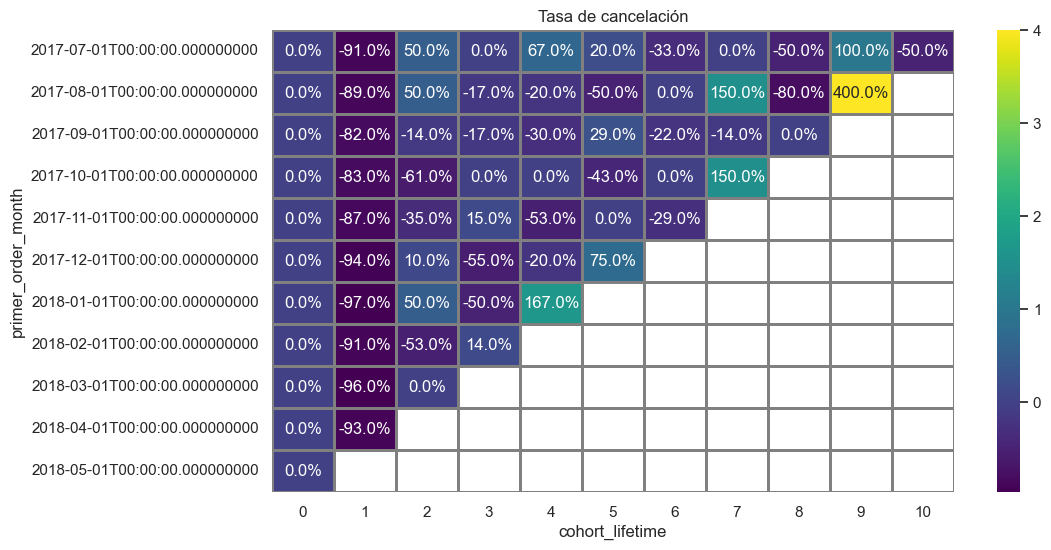

In [551]:
# Crear mapa de calor de la tasa de retención

churn_pivot_mas_30d_touch_si = grupo_cancelacion_mas_30d_touch_si.pivot_table(index='primer_order_month',
                                                              columns='cohort_lifetime', values='churn_rate', aggfunc='sum')

sns.set(style='white')

plt.figure(figsize=(11, 6))

plt.title('Tasa de cancelación')

sns.heatmap(churn_pivot_mas_30d_touch_si, annot=True, fmt='.1%',
            linewidths=1, linecolor='gray', cmap='viridis')

### **Conclusiones dataset: orders**

* **Revenue total: $252,057.20**
* **Usuarios únicos haciendo compras de junio-2017 a junio-2018: 36,523**

Meses con mejores ventas:

* Diciembre 2017: $36,388.60
* Marzo 2018: $ 28,834.59
* Octubre 2017: $27,987.70
* Dos usuarios generaron más de $10,000 en compras.

* El revenue promedio por usuario es de $6.9.

Existen 51 ordenes con revenue $0, salvo confirmación, se interpretan como ordenes que fueron canceladas, se eliminan de análisis posteriores.

**Las mejores tasas de conversión de ventas por ‘source_id’:**

* Source_1: 
* Tasa de conversión: 29.08%
* Revenue promedio: $6.36

* Source_2:
* Tasa de conversión: 18.42%
* Revenue promedio: $7.88

* Source_5:
* Tasa de conversión: 17.29%
* Revenue promedio: $4.93

* La peor tasa de conversión la presenta la ‘source_7’ con solo 1 conversión.

**Prueba de hipótesis:**

Se formuló la hipótesis nula:

**“Los ingresos NO CAMBIAN cuando los usuarios llegan por una 'source_id' diferente a las 3 de mayor tasa de conversión (1,2,5)."**

Realizando una prueba de 2 colas, y las variables cuentan con varianza significativamente diferente, se llega a la conclusión de rechazar la hipótesis nula, es decir, **los ingresos si son significativamente diferentes de los usuarios que llevan por las ‘source_id 1, 2 y 5.**


**Análisis de cohortes:**

Se crearon 4 cohortes generales:

* 1.    **Conversión_1d:** Usuarios que realizan compra el mismo día que se registran. 
* 2.    **Conversion_7d:** Usuarios que realizan compra en los siguientes 6 días a su registro (no se considera el día de registro).
* 3.    **Conversion_30d:** Usuarios que realizan compra en los siguientes 30 días a su registro (no se considera el día de registro, ni la primera semana transcurrida a partir del registro).
* 4.    **Conversion_mas_30d:** Usuarios que realizan compra en más de 30 días a su registro (no se considera el día de registro, ni los primeros 30 días a partir del registro).

Para todos los casos se omiten los pedidos con revenue $0.

Adicional a lo anterior el análisis de cada cohorte contendrá los siguientes comportamientos, ejemplo:

"top_conv_sources": son las sources_id que tienen mejor tasa de conversión e ingreso promedio en sus compras.

* **conversion_1d_desktop_si** = Usuarios que realizan compra el mismo día que se registran, usan ‘desktop’ y llegaron por ‘top_conv_sources’ 1, 2, 5. 

* **conversion_1d_desktop_no** = Usuarios que realizan compra el mismo día que se registran, usan ‘desktop’ y NO llegaron por ‘top_conv_sources’ 1, 2, 5.

Una vez creados las cohortes, se calculó el revenue generado por cada uno de ellos:

Ingreso cohorte conversion_1d: $ 119,187.55
Ingreso cohorte conversion_7d: $ 38,218.61
Ingreso cohorte conversion_30d: $ 32,650.78
Ingreso cohorte conversion_mas_30d: $ 50,785.07

**Análisis de cohortes:**

Para el análisis de las cohortes a detalle se realizará sobre las 2 cohortes con mayores ingresos de ventas:

**1. Cohorte: conversion_1d con ingresos de $119,187.55**

**2. Cohorte: conversion_mas_30d con ingresos de $50,785.07**

Importante: para el caso de la cohorte 'conversion_mas_30d', no existieron clientes cumplieran con el comportamiento 'touch - no top sources', es decir, no hay clientes que usaron el dispositivo 'touch' y llegaran de 'source_id' diferentes a 1,2,5.

**conversion_1d** = Usuarios que realizan compra el mismo día que se registran. 

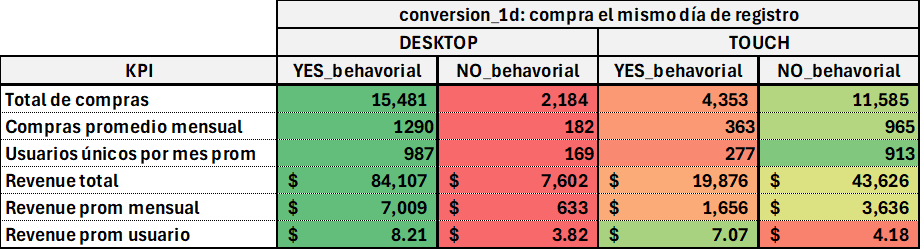
  
En el estudio de este cohorte encontramos que el mejor desempeño lo presentan los usuarios que usan ‘desktop’ y provienen de las ‘sources: 1, 2 y 5’, seguidos de los usuarios que usan ‘touch’ pero que no provienen de las ‘sources: 1, 2 y 5’, aunque su revenue promedio por usuario es menor, generan una mayor cantidad de transacciones.

Es importante destacar que el comportamiento de los usuarios que hacen conversión de compra varia entre los usuarios de ‘desktop’ y ‘touch’ dependiendo de la ‘source_id’, se sugiere hacer una estrategia diferenciada de marketing por ‘source_id’ de acuerdo al tipo de dispositivo.

**conversion_mas_30d** = Usuarios que realizan compra 30 días (o más) posteriores al día que se registran.

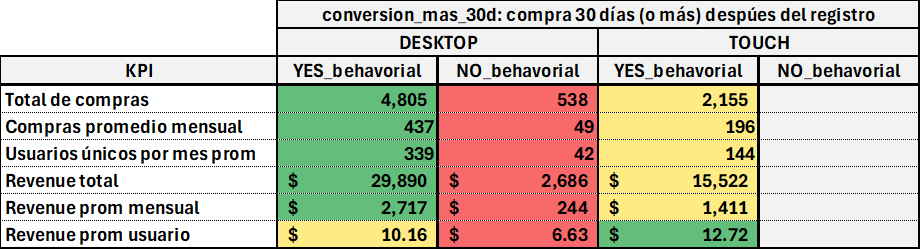
 
Para esta cohorte encontramos que aunque el número de transacciones son menores, el revenue promedio por usuario es mayor, especialmente con los usuarios que provienen de las ‘sources: 1, 2 y 5’ tanto en ‘desktop’ como en ‘touch’, estos últimos con el mayor revenue promedio por usuario.

Se sugiere establecer una estrategia de marketing de ‘recordatorio e invitación’ que permita enviar anuncios de los eventos a los clientes que cumplan 30 días de registro y no hayan realizado alguna compra, usualmente estos clientes pueden presentar buenos resultados.

**Tasa de retención:**

Los usuarios de la cohorte de conversión_1d los usuarios que usan ‘desktop’ y ‘touch’ de las ‘sources: 1, 2 y 5’ se encuentra por debajo del 10% mes a mes, pero por lo regular cada mes del tiempo de vida presentan actividad.

Por otra parte, los usuarios de ambos dispositivos y de otras ‘source_ids’ se encuentran por debajo del 3% mes a mes del tiempo de vida, y especialmente en ‘desktop’ hay meses que no presentan actividad.

En cuanto a los usuarios de la cohorte de conversión_mas_30d los usuarios que usan ‘desktop’ y ‘touch’ de las ‘sources: 1, 2 y 5’ presentan mejores resultados, con el máximo del 22% para ambos dispositivos.

Por otra parte, los usuarios de ambos dispositivos y de otras ‘source_ids’ existen meses con buen nivel de activación hasta el 67% en algunos casos de ‘desktop’ sin embargo, es inestable ya que presentan varios meses sin actividad en el tiempo de vida.

**Tasa de cancelación:**
Los usuarios de la cohorte de conversión_1d los usuarios que usan ‘desktop’ y ‘touch’ de las ‘sources: 1, 2 y 5’ a partir del mes 1 del tiempo de vida tienen hasta un 97% de tasa de cancelación, sin embargo, presentan meses de crecimiento, algunos de ellos de hasta el 200%.

Por otra parte, los usuarios de ambos dispositivos y de otras ‘source_ids’ tienen tasas de cancelación de hasta el 100% en el primer mes del tiempo de vida y sus porcentajes de recuperación son muy cortos.

En cuanto a los usuarios de la cohorte de conversión_mas_30d los usuarios que usan ‘desktop’ y ‘touch’ de las ‘sources: 1, 2 y 5’ a partir del mes 1 del tiempo de vida tienen hasta un 97% de tasa de cancelación, con meses de recuperaciones importantes a través del ciclo.

Por otra parte, los usuarios de ambos dispositivos y de otras ‘source_ids’ a partir del mes 1 del tiempo de vida tienen hasta un 98% de tasa de cancelación, pero de igual forma presentan varios meses sin actividad durante el tiempo de vida.


## **Análisis: costs**

### **Costos totales**

In [552]:
# Agregar columnas de fechas

costs['year_cost'] = costs['costs_date'].dt.isocalendar().year   # Año

costs['month_cost'] = costs['costs_date'].dt.month  # Mes

costs['week_cost'] = costs['costs_date'].dt.isocalendar().week  # Semana

print(costs.head())


   source_id costs_date  costs  year_cost  month_cost  week_cost
0          1 2017-06-01  75.20       2017           6         22
1          1 2017-06-02  62.25       2017           6         22
2          1 2017-06-03  36.53       2017           6         22
3          1 2017-06-04  55.00       2017           6         22
4          1 2017-06-05  57.08       2017           6         23


In [553]:
# Costos totales

costs_total = costs['costs'].sum()

print('Costos totales: $', costs_total)

Costos totales: $ 329131.62


### **Costos totales por mes**

Costos mensuales:

                         costs
year_cost month_cost          
2017      6           18015.00
          7           18240.59
          8           14790.54
          9           24368.91
          10          36322.88
          11          37907.88
          12          38315.35
2018      1           33518.52
          2           32723.03
          3           30415.27
          4           22289.38
          5           22224.27


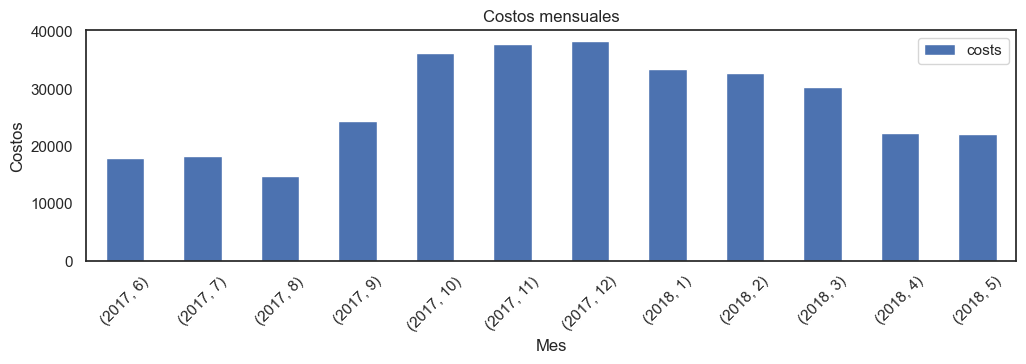

Costo promedio mensual: $ 27427.64


In [554]:
# Costos por mes

costs_mes = costs.groupby(['year_cost','month_cost']).agg({'costs':'sum'})

print('Costos mensuales:')

print()

print(costs_mes)

# Gráfica de costos mensuales

costs_mes.plot(kind='bar', figsize=(12, 3))

plt.xlabel('Mes')

plt.ylabel('Costos')

plt.title('Costos mensuales')

plt.xticks(rotation=45)

plt.show()

# Costo promedio mensual

mean_costs = round(costs_mes['costs'].mean(),2)

print('Costo promedio mensual: $', mean_costs)


Text(0, 0.5, 'Frecuencia')

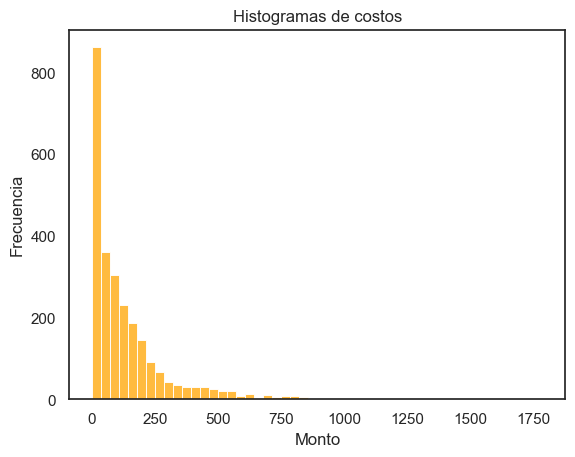

In [555]:
# Histograma de los costos

sns.histplot(costs['costs'], color='orange', bins=50)

plt.title('Histogramas de costos')
plt.xlabel('Monto')
plt.ylabel('Frecuencia')


### **Costos por source_id**

#### **Costos totales por source_id**

Costos totales por source_id:

               costs
source_id           
3          141321.63
4           61073.60
5           51757.10
2           42806.04
1           20833.27
10           5822.49
9            5517.49


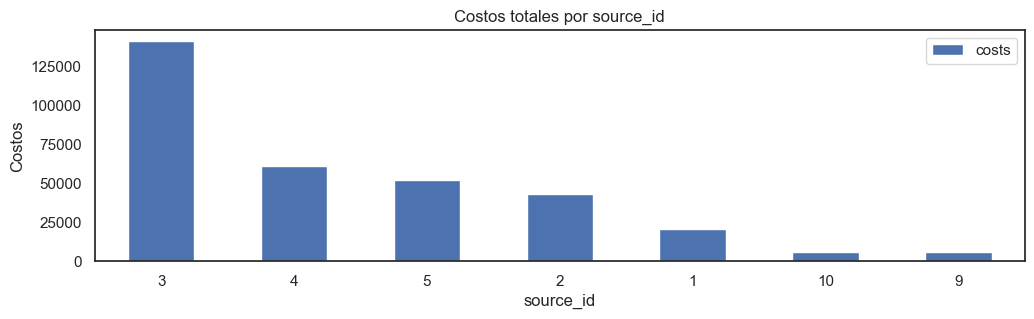

In [556]:
# Costos por source_id

costs_source = costs.groupby('source_id').agg({'costs':'sum'}).sort_values(by='costs', ascending=False)

print('Costos totales por source_id:')

print()

print(costs_source)

# Gráfica

costs_source.plot(kind='bar', figsize=(12, 3))

plt.xlabel('source_id')

plt.ylabel('Costos')

plt.title('Costos totales por source_id')

plt.xticks(rotation=0)

plt.show()

#### **Costos mensuales por source_id**

                         costs
month_cost source_id          
6          1           1125.61
           2           2427.38
           3           7731.65
           4           3514.80
           5           2616.12
           9            285.22
           10           314.22
7          1           1072.88
           2           2333.11
           3           7674.37
           4           3529.73
           5           2998.14
           9            302.54
           10           329.82
8          1            951.81
           2           1811.05
           3           6143.54
           4           3217.36
           5           2185.28
           9            248.93
           10           232.57
9          1           1502.01
           2           2985.66
           3           9963.55
           4           5192.26
           5           3849.14
           9            415.62
           10           460.67
10         1           2315.75
           2           4845.00
        

Text(0.5, 1.0, 'Costos mensuales por source_id del año 2017')

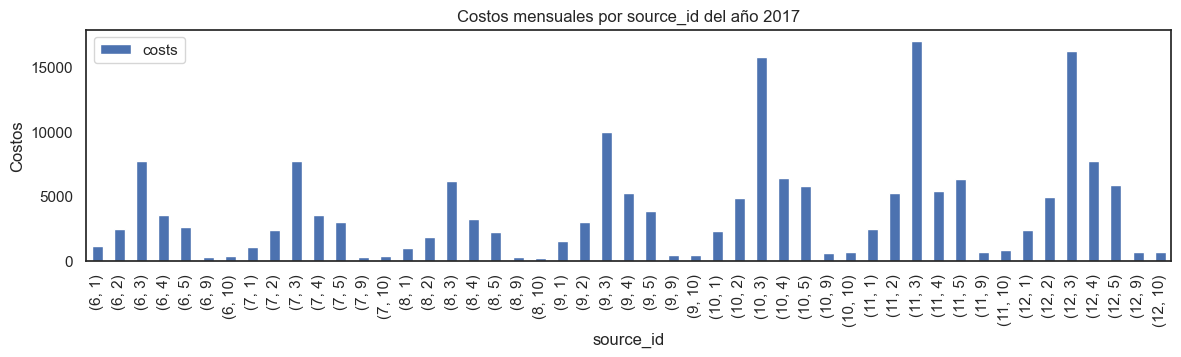

In [557]:
# Costos mensuales

# Dividir por año

# 2017

costs_source_17 = costs[costs['year_cost'] == 2017]

costs_source_mes = costs_source_17.groupby(['month_cost', 'source_id']).agg({'costs': 'sum'})

print(costs_source_mes)

costs_source_mes.plot(kind='bar', figsize=(14, 3))

plt.xlabel('source_id')

plt.ylabel('Costos')

plt.title('Costos mensuales por source_id del año 2017')

                         costs
month_cost source_id          
1          1           2186.18
           2           4157.74
           3          14808.78
           4           5832.79
           5           5371.52
           9            547.16
           10           614.35
2          1           2204.48
           2           4474.34
           3          14228.56
           4           5711.96
           5           5071.31
           9            551.50
           10           480.88
3          1           1893.09
           2           3943.14
           3          13080.85
           4           5961.87
           5           4529.62
           9            480.29
           10           526.41
4          1           1327.49
           2           2993.70
           3           9296.81
           4           4408.49
           5           3501.15
           9            373.49
           10           388.25
5          1           1467.61
           2           2689.44
        

Text(0.5, 1.0, 'Costos mensuales por source_id del año 2018')

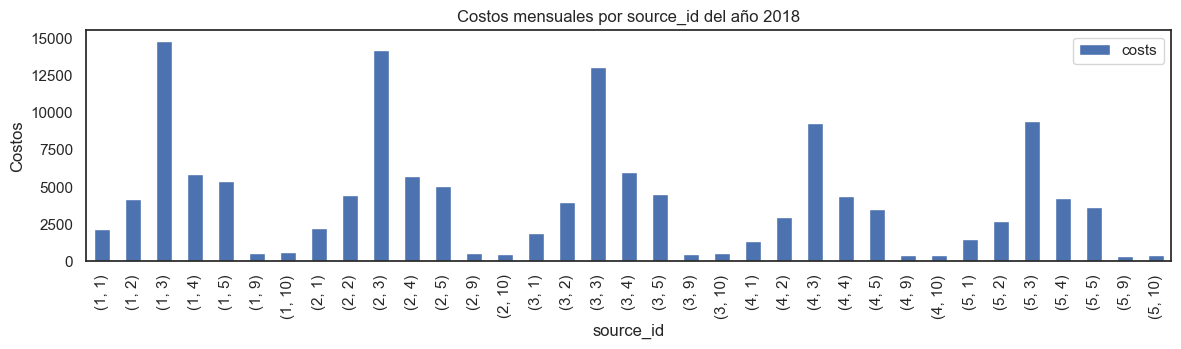

In [558]:
# Costos mensuales

# Dividir por año

# 2018

costs_source_18 = costs[costs['year_cost'] == 2018]

costs_source_mes = costs_source_18.groupby(
    ['month_cost', 'source_id']).agg({'costs': 'sum'})

print(costs_source_mes)

costs_source_mes.plot(kind='bar', figsize=(14, 3))

plt.xlabel('source_id')

plt.ylabel('Costos')

plt.title('Costos mensuales por source_id del año 2018')

## **Economía Unitaria**

### **Volumen de ventas**

In [559]:
# Volumen de ventas

print('Revenue total: $', orders_total)

print('Costos total: $', costs_total)

print('Total despúes de costos: $', round(orders_total - costs_total),2)


Revenue total: $ 252057.2
Costos total: $ 329131.62
Total despúes de costos: $ -77074 2


### **Revenue vs Costos mensuales**

    year  month   revenue     costs
0   2017      6   9557.49  18015.00
1   2017      7  12539.47  18240.59
2   2017      8   8758.78  14790.54
3   2017      9  18345.51  24368.91
4   2017     10  27987.70  36322.88
5   2017     11  27069.93  37907.88
6   2017     12  36388.60  38315.35
7   2018      1  19417.13  33518.52
8   2018      2  25560.54  32723.03
9   2018      3  28834.59  30415.27
10  2018      4  16858.06  22289.38
11  2018      5  20735.98  22224.27


Text(0.5, 1.0, 'Costos mensuales por source_id 2017-2018')

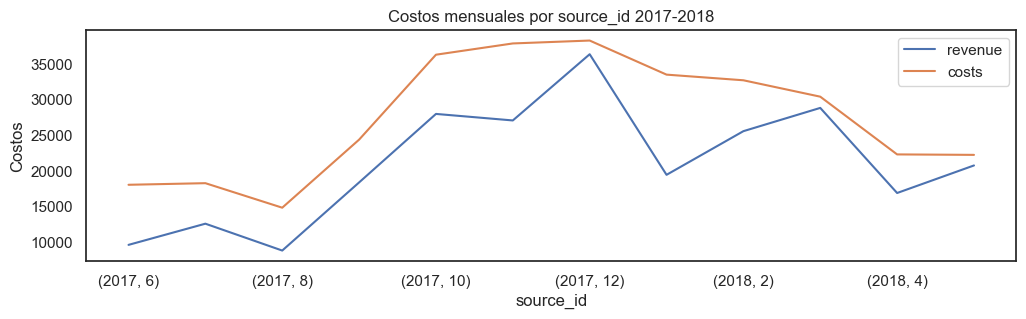

In [560]:
# Gráfico revenue mensual vs costos mensuales

revenue_mes = orders.groupby(
    ['year_order', 'month_order']).agg({'revenue': 'sum'}).reset_index()


costs_mes_2 = costs.groupby(['year_cost', 'month_cost']).agg({'costs': 'sum'}).reset_index()

revenue_costs_mes = revenue_mes.merge(costs_mes_2, left_on=['year_order','month_order'], right_on=['year_cost','month_cost'], how='inner')

revenue_costs_mes = revenue_costs_mes.drop(columns=['year_cost','month_cost'])

revenue_costs_mes.columns = ['year', 'month', 'revenue', 'costs']

print(revenue_costs_mes)

grafica_revenue_costs_mes =  revenue_costs_mes.groupby(['year', 'month']).agg({'revenue':'sum','costs':'sum'})

grafica_revenue_costs_mes.plot(kind='line', figsize=(12, 3))

plt.xlabel('source_id')

plt.ylabel('Costos')

plt.title('Costos mensuales por source_id 2017-2018')

### **LTV / CAC / ROMI Generales**

#### **Preparar los datos**

In [561]:
# Preparar base de datos

orders_source2 = orders_source.drop(columns=['hour_order','year_visit','month_visit','week_visit', 'hour_visit','visit_duration_sec','end_ts','start_ts','date_visit'])

# Agregar mes de primer compra 'order_month'

orders_source2['order_month'] = orders_source2['date_order'].dt.to_period(
    'M').dt.to_timestamp()

print(orders_source2.head(2))

               buy_ts  revenue                   uid  year_order  month_order  \
0 2017-06-01 00:10:00    17.00  10329302124590727494        2017            6   
1 2017-06-01 00:25:00     0.55  11627257723692907447        2017            6   

   week_order date_order   device  source_id order_month  
0          22 2017-06-01  desktop          1  2017-06-01  
1          22 2017-06-01  desktop          2  2017-06-01  


In [562]:
# Recuperar el primer mes de la compra

first_orders = orders_source2.groupby('uid').agg({'order_month':'min'}).reset_index()

first_orders.columns = ['uid', 'first_order_month']

print(first_orders.head())

                uid first_order_month
0  1575281904278712        2017-06-01
1  2429014661409475        2017-10-01
2  2464366381792757        2018-01-01
3  2551852515556206        2017-11-01
4  3077748354309989        2018-03-01


In [563]:
# Unir first_order_month a orders_source_2

orders_source3 = orders_source2.merge(first_orders, on='uid')

print(orders_source3.head())

               buy_ts  revenue                   uid  year_order  month_order  \
0 2017-06-01 00:10:00    17.00  10329302124590727494        2017            6   
1 2017-06-01 00:25:00     0.55  11627257723692907447        2017            6   
2 2017-06-01 00:27:00     0.37  17903680561304213844        2017            6   
3 2017-06-01 00:29:00     0.55  16109239769442553005        2017            6   
4 2017-06-01 07:58:00     0.37  14200605875248379450        2017            6   

   week_order date_order   device  source_id order_month first_order_month  
0          22 2017-06-01  desktop          1  2017-06-01        2017-06-01  
1          22 2017-06-01  desktop          2  2017-06-01        2017-06-01  
2          22 2017-06-01  desktop          2  2017-06-01        2017-06-01  
3          22 2017-06-01  desktop          2  2017-06-01        2017-06-01  
4          22 2017-06-01  desktop          3  2017-06-01        2017-06-01  


##### **LVT**

In [564]:
# Nuevos clientes para cada mes

nuevos_clientes = orders_source3.groupby('first_order_month').agg({'uid':'nunique'}).reset_index()

nuevos_clientes.columns = ['first_order_month','n_buyers']

print(nuevos_clientes.head())

  first_order_month  n_buyers
0        2017-06-01      1910
1        2017-07-01      1751
2        2017-08-01      1234
3        2017-09-01      2291
4        2017-10-01      3894


In [565]:
# Agrupar primera compra, mes de compra y revenue del mes

cohorts = orders_source3.groupby(['first_order_month','order_month']).agg({'revenue':'sum'}).reset_index()

cohorts.head()

first_order_month order_month   revenue
0        2017-06-01  2017-06-01  11838.34
1        2017-06-01  2017-07-01    976.02
2        2017-06-01  2017-08-01   1057.54
3        2017-06-01  2017-09-01   2614.21
4        2017-06-01  2017-10-01   2608.76

In [566]:
# Reporte de cohort

reporte = pd.merge(nuevos_clientes, cohorts, on='first_order_month')

reporte.head()

first_order_month  n_buyers order_month   revenue
0        2017-06-01      1910  2017-06-01  11838.34
1        2017-06-01      1910  2017-07-01    976.02
2        2017-06-01      1910  2017-08-01   1057.54
3        2017-06-01      1910  2017-09-01   2614.21
4        2017-06-01      1910  2017-10-01   2608.76

In [567]:
# Determinar la edad del cohorte

reporte['age'] = (reporte['order_month'].dt.to_period('M') - reporte['first_order_month'].dt.to_period('M'))

reporte['age'] = reporte['age'].apply(lambda x: x.n)

reporte['age'] = reporte['age'].astype('int')

reporte.head(5)

print(reporte.head())
print()
print(reporte['age'].unique())

  first_order_month  n_buyers order_month   revenue  age
0        2017-06-01      1910  2017-06-01  11838.34    0
1        2017-06-01      1910  2017-07-01    976.02    1
2        2017-06-01      1910  2017-08-01   1057.54    2
3        2017-06-01      1910  2017-09-01   2614.21    3
4        2017-06-01      1910  2017-10-01   2608.76    4

[ 0  1  2  3  4  5  6  7  8  9 10 11]


**IMPORTANTE:** En la información proporcionada no se indica el margen de cada orden, se considera el 'revenue' como el ingreso bruto.

In [568]:
# Calcular LTV

reporte['ltv'] = reporte['revenue'] / reporte['n_buyers']

print('LTV por mes y tiempo de vida:')

print()

print(reporte.head())

LTV por mes y tiempo de vida:

  first_order_month  n_buyers order_month   revenue  age       ltv
0        2017-06-01      1910  2017-06-01  11838.34    0  6.198084
1        2017-06-01      1910  2017-07-01    976.02    1  0.511005
2        2017-06-01      1910  2017-08-01   1057.54    2  0.553686
3        2017-06-01      1910  2017-09-01   2614.21    3  1.368696
4        2017-06-01      1910  2017-10-01   2608.76    4  1.365843


In [569]:
# Tabla dinámica

pivot_ltv = reporte.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='mean').round()

pivot_ltv = pivot_ltv.fillna('')

print('LTV mensual por cohort:')

print()

print(pivot_ltv)

LTV mensual por cohort:

age                 0    1    2    3    4    5    6    7    8    9    10   11
first_order_month                                                            
2017-06-01         6.0  1.0  1.0  1.0  1.0  1.0  2.0  1.0  1.0  1.0  1.0  0.0
2017-07-01         8.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     
2017-08-01         7.0  1.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0          
2017-09-01         8.0  1.0  1.0  5.0  1.0  1.0  1.0  0.0  0.0               
2017-10-01         6.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0                    
2017-11-01         7.0  1.0  0.0  0.0  0.0  0.0  0.0                         
2017-12-01         6.0  0.0  1.0  1.0  0.0  0.0                              
2018-01-01         5.0  1.0  0.0  0.0  0.0                                   
2018-02-01         5.0  0.0  0.0  0.0                                        
2018-03-01         6.0  1.0  1.0                                             
2018-04-01         6.0  1.0            

In [570]:
# LTV por cohorte de primer_order_month

ltv_cohorte = reporte.groupby(['first_order_month','age']).agg({'ltv':'mean'}).reset_index()

ltv_mean_cohorte = ltv_cohorte.groupby('first_order_month').agg({'ltv':'sum'}).round()

ltv_mean_cohorte.columns = ['ltv_prom_usuario']

print(ltv_mean_cohorte)

                   ltv_prom_usuario
first_order_month                  
2017-06-01                     17.0
2017-07-01                     10.0
2017-08-01                     11.0
2017-09-01                     18.0
2017-10-01                      8.0
2017-11-01                      9.0
2017-12-01                      8.0
2018-01-01                      7.0
2018-02-01                      5.0
2018-03-01                      8.0
2018-04-01                      7.0
2018-05-01                      6.0


##### **CAC**

In [571]:
# Agregar columna con el primer día del mes del costo

costs2 = costs

costs2['first_day_cost'] = costs['costs_date'].dt.to_period('M').dt.to_timestamp()

print(costs2.head(2))


   source_id costs_date  costs  year_cost  month_cost  week_cost  \
0          1 2017-06-01  75.20       2017           6         22   
1          1 2017-06-02  62.25       2017           6         22   

  first_day_cost  
0     2017-06-01  
1     2017-06-01  


In [572]:
# Costos por mes

costs2_mes = costs2.groupby('first_day_cost').agg({'costs':'sum'}).reset_index()

# Calcular los n_buyers del mes de la cohorte

n_buyers_mes_cohorte = reporte.groupby('first_order_month').agg({'n_buyers':'sum'}).reset_index()

# Unir costos del mes y n_buyers

cac_data = costs2_mes.merge(n_buyers_mes_cohorte, left_on='first_day_cost', right_on='first_order_month')

cac_data['cac'] = cac_data['costs'] / cac_data['n_buyers']

print(cac_data)

   first_day_cost     costs first_order_month  n_buyers       cac
0      2017-06-01  18015.00        2017-06-01     22920  0.785995
1      2017-07-01  18240.59        2017-07-01     19261  0.947022
2      2017-08-01  14790.54        2017-08-01     12340  1.198585
3      2017-09-01  24368.91        2017-09-01     20619  1.181867
4      2017-10-01  36322.88        2017-10-01     31152  1.165989
5      2017-11-01  37907.88        2017-11-01     25186  1.505117
6      2017-12-01  38315.35        2017-12-01     22938  1.670388
7      2018-01-01  33518.52        2018-01-01     14705  2.279396
8      2018-02-01  32723.03        2018-02-01     12788  2.558886
9      2018-03-01  30415.27        2018-03-01      9228  3.295976
10     2018-04-01  22289.38        2018-04-01      3924  5.680270
11     2018-05-01  22224.27        2018-05-01      2626  8.463165


##### **LTV & CAC por ususario**

In [573]:
# LTV & CAC

cac_ltv = pd.merge(
    ltv_mean_cohorte, cac_data[['first_order_month','cac']], on='first_order_month', how='left')

print(cac_ltv)

   first_order_month  ltv_prom_usuario       cac
0         2017-06-01              17.0  0.785995
1         2017-07-01              10.0  0.947022
2         2017-08-01              11.0  1.198585
3         2017-09-01              18.0  1.181867
4         2017-10-01               8.0  1.165989
5         2017-11-01               9.0  1.505117
6         2017-12-01               8.0  1.670388
7         2018-01-01               7.0  2.279396
8         2018-02-01               5.0  2.558886
9         2018-03-01               8.0  3.295976
10        2018-04-01               7.0  5.680270
11        2018-05-01               6.0  8.463165


##### **ROMI**

In [574]:
# Calcular los costos por mes

reporte2 = reporte.merge(
    costs2_mes, left_on='first_order_month', right_on='first_day_cost')

reporte2['cac'] = reporte2['costs'] / reporte2['n_buyers']

print(reporte2.head())

  first_order_month  n_buyers order_month   revenue  age       ltv  \
0        2017-06-01      1910  2017-06-01  11838.34    0  6.198084   
1        2017-06-01      1910  2017-07-01    976.02    1  0.511005   
2        2017-06-01      1910  2017-08-01   1057.54    2  0.553686   
3        2017-06-01      1910  2017-09-01   2614.21    3  1.368696   
4        2017-06-01      1910  2017-10-01   2608.76    4  1.365843   

  first_day_cost    costs       cac  
0     2017-06-01  18015.0  9.431937  
1     2017-06-01  18015.0  9.431937  
2     2017-06-01  18015.0  9.431937  
3     2017-06-01  18015.0  9.431937  
4     2017-06-01  18015.0  9.431937  


In [575]:
# Calcular ROMI

reporte2['romi'] = reporte2['ltv'] / reporte2['cac']

romi_output = reporte2.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')

romi_output = romi_output.cumsum(axis=1).round(2)

romi_output = romi_output.fillna('')

print(romi_output)



age                  0     1     2     3     4     5     6     7     8     9   \
first_order_month                                                               
2017-06-01         0.66  0.71  0.77  0.92  1.06  1.18  1.39  1.47  1.56  1.66   
2017-07-01         0.72  0.75  0.83  0.88  0.89  0.92  0.93  0.93  0.96  0.98   
2017-08-01         0.55  0.62  0.64   0.7  0.74  0.76  0.78  0.83  0.86  0.88   
2017-09-01         0.76  0.89  0.95  1.46  1.52   1.6   1.7  1.72  1.74         
2017-10-01         0.68  0.73  0.75  0.76  0.78  0.79   0.8  0.81               
2017-11-01         0.67  0.72  0.74  0.79   0.8  0.81  0.83                     
2017-12-01         0.61  0.65  0.71  0.82  0.82  0.84                           
2018-01-01         0.45  0.51  0.54  0.56  0.57                                 
2018-02-01         0.49  0.52  0.52  0.53                                       
2018-03-01         0.65  0.73   0.8                                             
2018-04-01         0.51  0.6

In [576]:
# Recuperación de inversión por cohorte (promedio)

romi_output2 = reporte2.pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean')

romi_output2 = romi_output2.cumsum(axis=1).round(2)

romi_output2 = romi_output2.cumsum(axis=1).mean(axis=0)

print(romi_output2)

age
0      0.618333
1      1.290000
2      2.032000
3      2.840000
4      3.835000
5      4.992857
6      6.155000
7      7.466000
8      9.087500
9      9.176667
10    11.455000
11    14.920000
dtype: float64


### **Source_id: LTV / CAC / ROMI**

In [577]:
# Identificar las source_id

print("Source id's:")
print(costs2['source_id'].unique())

Source id's:
[ 1  2  3  4  5  9 10]


#### **Source_id: 1 - LTV / CAC / ROMI**

##### **Preparar los datos**

In [578]:
# Filtro de source_id en los datasets

orders_source_1 = orders_source3[orders_source3['source_id'] == 1]

costs_source_1 = costs2[costs2['source_id'] == 1]

print('Valores en orders-soruce_id:', orders_source_1['source_id'].unique())
print()
print('Valores en costs-source_id:', costs_source_1['source_id'].unique())

Valores en orders-soruce_id: [1]

Valores en costs-source_id: [1]


##### **Volumen de ventas**

In [579]:
# Volumen de ventas

orders_total_source_1 = orders_source_1['revenue'].sum()

costs_total_source_1 = costs_source_1['costs'].sum()

print('Revenue total: $', orders_total_source_1)

print('Costos total: $', costs_total_source_1)

print('Total despúes de costos: $', round(orders_total_source_1 - costs_total_source_1),2)

Revenue total: $ 63165.14
Costos total: $ 20833.27
Total despúes de costos: $ 42332 2


##### **Revenue vs Costos mensuales**

    year  month  revenue    costs
0   2017      6  2294.58  1125.61
1   2017      7  3015.15  1072.88
2   2017      8  1970.02   951.81
3   2017      9  3963.68  1502.01
4   2017     10  5861.35  2315.75
5   2017     11  8503.53  2445.16
6   2017     12  7750.31  2341.20
7   2018      1  4172.39  2186.18
8   2018      2  4797.46  2204.48
9   2018      3  9066.96  1893.09
10  2018      4  5206.23  1327.49
11  2018      5  6563.48  1467.61


Text(0.5, 1.0, 'Costos mensuales (2017 - 2018) por source_1')

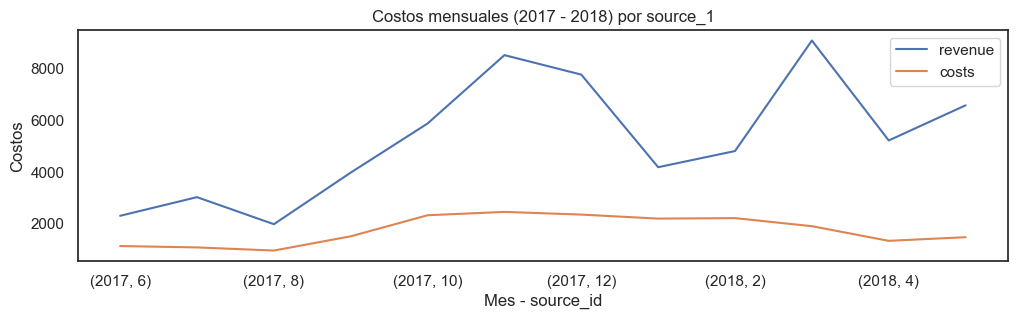

In [580]:
# Gráfico revenue mensual vs costos mensuales

revenue_mes_source_1 = orders_source_1.groupby(
    ['year_order', 'month_order']).agg({'revenue': 'sum'}).reset_index()

costs_mes_source_1 = costs_source_1.groupby(['year_cost', 'month_cost']).agg({'costs': 'sum'}).reset_index()

revenue_costs_mes_source_1 = revenue_mes_source_1.merge(costs_mes_source_1, left_on=['year_order','month_order'], right_on=['year_cost','month_cost'], how='inner')

revenue_costs_mes_source_1 = revenue_costs_mes_source_1.drop(columns=['year_cost','month_cost'])

revenue_costs_mes_source_1.columns = ['year', 'month', 'revenue', 'costs']

print(revenue_costs_mes_source_1)

grafica_revenue_costs_mes_source_1 =  revenue_costs_mes_source_1.groupby(['year', 'month']).agg({'revenue':'sum','costs':'sum'})

grafica_revenue_costs_mes_source_1.plot(kind='line', figsize=(12, 3))

plt.xlabel('Mes - source_id')

plt.ylabel('Costos')

plt.title('Costos mensuales (2017 - 2018) por source_1')

##### **LVT**

In [581]:
# Nuevos clientes para cada mes

nuevos_clientes_1 = orders_source_1.groupby(
    'first_order_month').agg({'uid': 'nunique'}).reset_index()

nuevos_clientes_1.columns = ['first_order_month','n_buyers']

print(nuevos_clientes_1.head())

  first_order_month  n_buyers
0        2017-06-01       314
1        2017-07-01       306
2        2017-08-01       195
3        2017-09-01       386
4        2017-10-01       589


In [582]:
# Agrupar primera compra, mes de compra y revenue del mes

cohorts_1 = orders_source_1.groupby(['first_order_month', 'order_month']).agg({
    'revenue': 'sum'}).reset_index()

cohorts_1.head()

first_order_month order_month  revenue
0        2017-06-01  2017-06-01  2294.58
1        2017-06-01  2017-07-01   294.39
2        2017-06-01  2017-08-01   195.04
3        2017-06-01  2017-09-01   596.28
4        2017-06-01  2017-10-01   748.63

In [583]:
# Reporte de cohort

reporte_1 = pd.merge(nuevos_clientes_1, cohorts_1, on='first_order_month')

reporte_1.head()

first_order_month  n_buyers order_month  revenue
0        2017-06-01       314  2017-06-01  2294.58
1        2017-06-01       314  2017-07-01   294.39
2        2017-06-01       314  2017-08-01   195.04
3        2017-06-01       314  2017-09-01   596.28
4        2017-06-01       314  2017-10-01   748.63

In [584]:
# Determinar la edad del cohorte

reporte_1['age'] = (reporte_1['order_month'].dt.to_period('M') - reporte_1['first_order_month'].dt.to_period('M'))

reporte_1['age'] = reporte_1['age'].apply(lambda x: x.n)

reporte_1['age'] = reporte_1['age'].astype('int')

reporte_1.head(5)

print(reporte_1.head())
print()
print(reporte_1['age'].unique())

  first_order_month  n_buyers order_month  revenue  age
0        2017-06-01       314  2017-06-01  2294.58    0
1        2017-06-01       314  2017-07-01   294.39    1
2        2017-06-01       314  2017-08-01   195.04    2
3        2017-06-01       314  2017-09-01   596.28    3
4        2017-06-01       314  2017-10-01   748.63    4

[ 0  1  2  3  4  5  6  7  8  9 10 11]


**IMPORTANTE:** En la información proporcionada no se indica el margen de cada orden, se considera el 'revenue' como el ingreso bruto.

In [585]:
# Calcular LTV

reporte_1['ltv'] = reporte_1['revenue'] / reporte_1['n_buyers']

print('LTV por mes y tiempo de vida:')

print()

print(reporte_1.head())

LTV por mes y tiempo de vida:

  first_order_month  n_buyers order_month  revenue  age       ltv
0        2017-06-01       314  2017-06-01  2294.58    0  7.307580
1        2017-06-01       314  2017-07-01   294.39    1  0.937548
2        2017-06-01       314  2017-08-01   195.04    2  0.621146
3        2017-06-01       314  2017-09-01   596.28    3  1.898981
4        2017-06-01       314  2017-10-01   748.63    4  2.384172


In [586]:
# Tabla dinámica

pivot_ltv_1 = reporte_1.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='mean').round()

pivot_ltv_1 = pivot_ltv_1.fillna('')

print(pivot_ltv_1)

age                 0    1    2    3    4    5    6    7    8    9    10   11
first_order_month                                                            
2017-06-01         7.0  1.0  1.0  2.0  2.0  4.0  7.0  1.0  2.0  4.0  3.0  1.0
2017-07-01         9.0  1.0  2.0  2.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0     
2017-08-01         8.0  2.0  0.0  1.0  0.0  0.0  0.0  2.0  2.0  0.0          
2017-09-01         6.0  1.0  1.0  3.0  1.0  0.0  3.0  0.0  0.0               
2017-10-01         7.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0                    
2017-11-01         9.0  1.0  0.0  1.0  0.0  0.0  1.0                         
2017-12-01         5.0  0.0  1.0  0.0  0.0  0.0                              
2018-01-01         6.0  1.0  2.0  1.0  0.0                                   
2018-02-01         5.0  1.0  0.0  0.0                                        
2018-03-01         9.0  2.0  2.0                                             
2018-04-01         7.0  5.0                                     

In [587]:
# LTV por cohorte de primer_order_month

ltv_cohorte_1 = reporte_1.groupby(['first_order_month','age']).agg({'ltv':'mean'}).reset_index()

ltv_mean_cohorte_1 = ltv_cohorte_1.groupby('first_order_month').agg({'ltv':'sum'}).round()

ltv_mean_cohorte_1.columns = ['ltv_prom_usuario']

print(ltv_mean_cohorte_1)

                   ltv_prom_usuario
first_order_month                  
2017-06-01                     35.0
2017-07-01                     17.0
2017-08-01                     17.0
2017-09-01                     16.0
2017-10-01                      9.0
2017-11-01                     12.0
2017-12-01                      6.0
2018-01-01                     10.0
2018-02-01                      7.0
2018-03-01                     13.0
2018-04-01                     12.0
2018-05-01                      7.0


##### **CAC**

In [588]:
# Costos por mes

costs_mes_1 = costs_source_1.groupby('first_day_cost').agg({'costs':'sum'}).reset_index()

# Calcular los n_buyers del mes de la cohorte

n_buyers_mes_cohorte_1 = reporte_1.groupby('first_order_month').agg({'n_buyers':'sum'}).reset_index()

# Unir costos del mes y n_buyers

cac_data_1 = costs_mes_1.merge(n_buyers_mes_cohorte_1, left_on='first_day_cost', right_on='first_order_month')

cac_data_1['cac'] = cac_data_1['costs'] / cac_data_1['n_buyers']

print(cac_data_1)

   first_day_cost    costs first_order_month  n_buyers       cac
0      2017-06-01  1125.61        2017-06-01      3768  0.298729
1      2017-07-01  1072.88        2017-07-01      3366  0.318740
2      2017-08-01   951.81        2017-08-01      1950  0.488108
3      2017-09-01  1502.01        2017-09-01      3474  0.432358
4      2017-10-01  2315.75        2017-10-01      4712  0.491458
5      2017-11-01  2445.16        2017-11-01      4816  0.507716
6      2017-12-01  2341.20        2017-12-01      3972  0.589426
7      2018-01-01  2186.18        2018-01-01      2215  0.986989
8      2018-02-01  2204.48        2018-02-01      1856  1.187759
9      2018-03-01  1893.09        2018-03-01      1467  1.290450
10     2018-04-01  1327.49        2018-04-01       604  2.197831
11     2018-05-01  1467.61        2018-05-01       381  3.851995


##### **LTV & CAC por ususario**

In [589]:
# LTV & CAC

cac_ltv_1 = pd.merge(
    ltv_mean_cohorte_1, cac_data_1[['first_order_month','cac']], on='first_order_month', how='left')

print('LTV & CAC por cohorte:')

print()

print(cac_ltv_1)

LTV & CAC por cohorte:

   first_order_month  ltv_prom_usuario       cac
0         2017-06-01              35.0  0.298729
1         2017-07-01              17.0  0.318740
2         2017-08-01              17.0  0.488108
3         2017-09-01              16.0  0.432358
4         2017-10-01               9.0  0.491458
5         2017-11-01              12.0  0.507716
6         2017-12-01               6.0  0.589426
7         2018-01-01              10.0  0.986989
8         2018-02-01               7.0  1.187759
9         2018-03-01              13.0  1.290450
10        2018-04-01              12.0  2.197831
11        2018-05-01               7.0  3.851995


##### **ROMI**

In [590]:
# Calcular los costos por mes

reporte2_1 = reporte_1.merge(
    costs_mes_1, left_on='first_order_month', right_on='first_day_cost')

reporte2_1['cac'] = reporte2_1['costs'] / reporte2_1['n_buyers']

print(reporte2_1.head())

  first_order_month  n_buyers order_month  revenue  age       ltv  \
0        2017-06-01       314  2017-06-01  2294.58    0  7.307580   
1        2017-06-01       314  2017-07-01   294.39    1  0.937548   
2        2017-06-01       314  2017-08-01   195.04    2  0.621146   
3        2017-06-01       314  2017-09-01   596.28    3  1.898981   
4        2017-06-01       314  2017-10-01   748.63    4  2.384172   

  first_day_cost    costs       cac  
0     2017-06-01  1125.61  3.584745  
1     2017-06-01  1125.61  3.584745  
2     2017-06-01  1125.61  3.584745  
3     2017-06-01  1125.61  3.584745  
4     2017-06-01  1125.61  3.584745  


In [591]:
# Calcular ROMI

reporte2_1['romi'] = reporte2_1['ltv'] / reporte2_1['cac']

romi_output_1 = reporte2_1.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')

romi_output_1 = romi_output_1.cumsum(axis=1).round(2)

romi_output_1 = romi_output_1.fillna('')

print('ROMI mensual por cohorte:')

print()

print(romi_output_1)


ROMI mensual por cohorte:

age                  0     1     2     3     4     5     6     7     8     9   \
first_order_month                                                               
2017-06-01         2.04   2.3  2.47   3.0  3.67  4.67  6.66  7.04  7.56  8.57   
2017-07-01         2.54  2.74  3.45  4.05  4.15  4.26  4.29  4.31  4.57  4.79   
2017-08-01         1.63   2.0  2.05  2.33   2.4  2.48  2.53  2.98  3.39  3.42   
2017-09-01         1.50  1.85  2.11  2.76  3.11  3.21  3.96  3.96  4.02         
2017-10-01         1.68  1.93   2.0  2.01  2.08  2.13  2.17  2.24               
2017-11-01         2.48  2.81  2.89  3.04  3.17  3.17  3.51                     
2017-12-01         1.44  1.55   1.7  1.77   1.8  1.83                           
2018-01-01         1.20  1.46   1.8  1.93  1.98                                 
2018-02-01         1.15   1.4  1.43  1.45                                       
2018-03-01         2.23  2.87  3.28                                             
2

In [592]:
# Recuperación de inversión por cohorte (promedio)

romi_output2_1 = reporte2_1.pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean')

romi_output2_1 = romi_output2_1.cumsum(axis=1).round(2)

romi_output2_1 = romi_output2_1.cumsum(axis=1).mean(axis=0)

print('Mes de recuperación de inversión:')

print(romi_output2_1)

Mes de recuperación de inversión:
age
0      1.756667
1      3.903636
2      6.198000
3      8.437778
4     11.608750
5     15.178571
6     19.880000
7     23.748000
8     30.510000
9     37.446667
10    50.675000
11    66.970000
dtype: float64


#### **Source_id: 2 - LTV / CAC / ROMI**

##### **Preparar los datos**

In [593]:
# Filtro de source_id en los datasets

orders_source_2 = orders_source3[orders_source3['source_id'] == 2]

costs_source_2 = costs2[costs2['source_id'] == 2]

print('Valores en orders-soruce_id:', orders_source_2['source_id'].unique())
print()
print('Valores en costs-source_id:', costs_source_2['source_id'].unique())

Valores en orders-soruce_id: [2]

Valores en costs-source_id: [2]


##### **Volumen de ventas**

In [594]:
# Volumen de ventas

orders_total_source_2 = orders_source_2['revenue'].sum()

costs_total_source_2 = costs_source_2['costs'].sum()

print('Revenue total: $', orders_total_source_2)

print('Costos total: $', costs_total_source_2)

print('Total despúes de costos: $', round(orders_total_source_2 - costs_total_source_2),2)

Revenue total: $ 69169.15
Costos total: $ 42806.04
Total despúes de costos: $ 26363 2


##### **Revenue vs Costos mensuales**

    year  month   revenue    costs
0   2017      6   2403.05  2427.38
1   2017      7   2673.71  2333.11
2   2017      8   1344.87  1811.05
3   2017      9   3219.61  2985.66
4   2017     10   8023.52  4845.00
5   2017     11   6585.87  5247.68
6   2017     12  17644.67  4897.80
7   2018      1   4678.11  4157.74
8   2018      2   6215.75  4474.34
9   2018      3   7627.04  3943.14
10  2018      4   3693.14  2993.70
11  2018      5   5059.81  2689.44


Text(0.5, 1.0, 'Costos mensuales (2017 - 2018) por source_2')

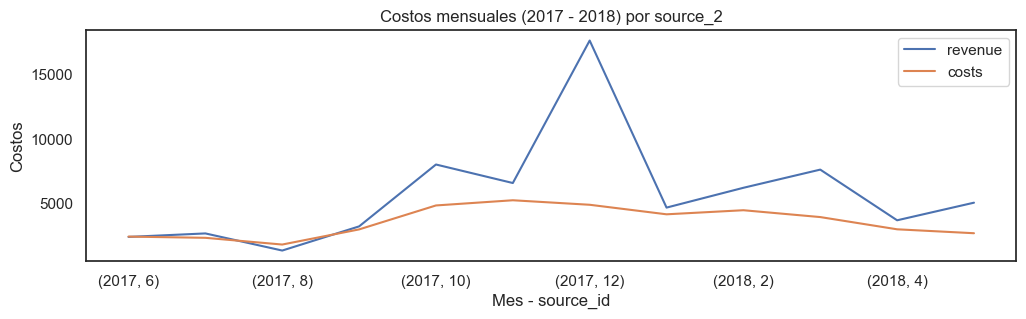

In [595]:
# Gráfico revenue mensual vs costos mensuales

revenue_mes_source_2 = orders_source_2.groupby(
    ['year_order', 'month_order']).agg({'revenue': 'sum'}).reset_index()

costs_mes_source_2 = costs_source_2.groupby(['year_cost', 'month_cost']).agg({'costs': 'sum'}).reset_index()

revenue_costs_mes_source_2 = revenue_mes_source_2.merge(costs_mes_source_2, left_on=['year_order','month_order'], right_on=['year_cost','month_cost'], how='inner')

revenue_costs_mes_source_2 = revenue_costs_mes_source_2.drop(columns=['year_cost','month_cost'])

revenue_costs_mes_source_2.columns = ['year', 'month', 'revenue', 'costs']

print(revenue_costs_mes_source_2)

grafica_revenue_costs_mes_source_2 =  revenue_costs_mes_source_2.groupby(['year', 'month']).agg({'revenue':'sum','costs':'sum'})

grafica_revenue_costs_mes_source_2.plot(kind='line', figsize=(12, 3))

plt.xlabel('Mes - source_id')

plt.ylabel('Costos')

plt.title('Costos mensuales (2017 - 2018) por source_2')

##### **LVT**

In [596]:
# Nuevos clientes para cada mes

nuevos_clientes_2 = orders_source_2.groupby(
    'first_order_month').agg({'uid': 'nunique'}).reset_index()

nuevos_clientes_2.columns = ['first_order_month','n_buyers']

print(nuevos_clientes_2.head())

  first_order_month  n_buyers
0        2017-06-01       318
1        2017-07-01       266
2        2017-08-01       154
3        2017-09-01       329
4        2017-10-01       537


In [597]:
# Agrupar primera compra, mes de compra y revenue del mes

cohorts_2 = orders_source_2.groupby(['first_order_month', 'order_month']).agg({
    'revenue': 'sum'}).reset_index()

cohorts_2.head()

first_order_month order_month  revenue
0        2017-06-01  2017-06-01  2403.05
1        2017-06-01  2017-07-01   256.85
2        2017-06-01  2017-08-01   519.87
3        2017-06-01  2017-09-01   935.77
4        2017-06-01  2017-10-01   875.45

In [598]:
# Reporte de cohort

reporte_2 = pd.merge(nuevos_clientes_2, cohorts_2, on='first_order_month')

reporte_2.head()

first_order_month  n_buyers order_month  revenue
0        2017-06-01       318  2017-06-01  2403.05
1        2017-06-01       318  2017-07-01   256.85
2        2017-06-01       318  2017-08-01   519.87
3        2017-06-01       318  2017-09-01   935.77
4        2017-06-01       318  2017-10-01   875.45

In [599]:
# Determinar la edad del cohorte

reporte_2['age'] = (reporte_2['order_month'].dt.to_period('M') - reporte_2['first_order_month'].dt.to_period('M'))

reporte_2['age'] = reporte_2['age'].apply(lambda x: x.n)

reporte_2['age'] = reporte_2['age'].astype('int')

reporte_2.head(5)

print(reporte_2.head())
print()
print(reporte_2['age'].unique())

  first_order_month  n_buyers order_month  revenue  age
0        2017-06-01       318  2017-06-01  2403.05    0
1        2017-06-01       318  2017-07-01   256.85    1
2        2017-06-01       318  2017-08-01   519.87    2
3        2017-06-01       318  2017-09-01   935.77    3
4        2017-06-01       318  2017-10-01   875.45    4

[ 0  1  2  3  4  5  6  7  8  9 10 11]


**IMPORTANTE:** En la información proporcionada no se indica el margen de cada orden, se considera el 'revenue' como el ingreso bruto.

In [600]:
# Calcular LTV

reporte_2['ltv'] = reporte_2['revenue'] / reporte_2['n_buyers']

print('LTV por mes y tiempo de vida:')

print()

print(reporte_2.head())

LTV por mes y tiempo de vida:

  first_order_month  n_buyers order_month  revenue  age       ltv
0        2017-06-01       318  2017-06-01  2403.05    0  7.556761
1        2017-06-01       318  2017-07-01   256.85    1  0.807704
2        2017-06-01       318  2017-08-01   519.87    2  1.634811
3        2017-06-01       318  2017-09-01   935.77    3  2.942673
4        2017-06-01       318  2017-10-01   875.45    4  2.752987


In [601]:
# Tabla dinámica

pivot_ltv_2 = reporte_2.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='mean').round()

pivot_ltv_2 = pivot_ltv_2.fillna('')

print(pivot_ltv_2)

age                  0    1    2     3    4    5    6    7    8    9    10  \
first_order_month                                                            
2017-06-01          8.0  1.0  2.0   3.0  3.0  1.0  3.0  2.0  2.0  1.0  1.0   
2017-07-01          9.0  0.0  1.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2017-08-01          5.0  1.0  1.0   1.0  1.0  0.0  1.0  0.0  0.0  1.0        
2017-09-01          6.0  7.0  2.0  32.0  2.0  4.0  4.0  1.0  0.0             
2017-10-01          8.0  2.0  0.0   1.0  0.0  0.0  0.0  0.0                  
2017-11-01          8.0  1.0  1.0   0.0  0.0  0.0  0.0                       
2017-12-01         10.0  2.0  3.0   5.0  0.0  0.0                            
2018-01-01          5.0  1.0  1.0   0.0  0.0                                 
2018-02-01          5.0  0.0  0.0   0.0                                      
2018-03-01          7.0  2.0  1.0                                            
2018-04-01          6.0  1.0                                    

In [602]:
# LTV por cohorte de primer_order_month

ltv_cohorte_2 = reporte_2.groupby(['first_order_month','age']).agg({'ltv':'mean'}).reset_index()

ltv_mean_cohorte_2 = ltv_cohorte_2.groupby('first_order_month').agg({'ltv':'sum'}).round()

ltv_mean_cohorte_2.columns = ['ltv_prom_usuario']

print(ltv_mean_cohorte_2)

                   ltv_prom_usuario
first_order_month                  
2017-06-01                     26.0
2017-07-01                     11.0
2017-08-01                     10.0
2017-09-01                     59.0
2017-10-01                     12.0
2017-11-01                     10.0
2017-12-01                     21.0
2018-01-01                      8.0
2018-02-01                      5.0
2018-03-01                     11.0
2018-04-01                      7.0
2018-05-01                      7.0


##### **CAC**

In [603]:
# Costos por mes

costs_mes_2 = costs_source_2.groupby('first_day_cost').agg({'costs':'sum'}).reset_index()

# Calcular los n_buyers del mes de la cohorte

n_buyers_mes_cohorte_2 = reporte_2.groupby('first_order_month').agg({'n_buyers':'sum'}).reset_index()

# Unir costos del mes y n_buyers

cac_data_2 = costs_mes_2.merge(n_buyers_mes_cohorte_2, left_on='first_day_cost', right_on='first_order_month')

cac_data_2['cac'] = cac_data_2['costs'] / cac_data_2['n_buyers']

print(cac_data_2)

   first_day_cost    costs first_order_month  n_buyers       cac
0      2017-06-01  2427.38        2017-06-01      3816  0.636106
1      2017-07-01  2333.11        2017-07-01      2926  0.797372
2      2017-08-01  1811.05        2017-08-01      1540  1.176006
3      2017-09-01  2985.66        2017-09-01      2961  1.008328
4      2017-10-01  4845.00        2017-10-01      4296  1.127793
5      2017-11-01  5247.68        2017-11-01      4067  1.290307
6      2017-12-01  4897.80        2017-12-01      3174  1.543100
7      2018-01-01  4157.74        2018-01-01      1785  2.329266
8      2018-02-01  4474.34        2018-02-01      1588  2.817594
9      2018-03-01  3943.14        2018-03-01      1224  3.221520
10     2018-04-01  2993.70        2018-04-01       504  5.939881
11     2018-05-01  2689.44        2018-05-01       463  5.808726


##### **LTV & CAC por ususario**

In [604]:
# LTV & CAC

cac_ltv_2 = pd.merge(
    ltv_mean_cohorte_2, cac_data_2[['first_order_month','cac']], on='first_order_month', how='left')

print('LTV & CAC por cohorte:')

print()

print(cac_ltv_2)

LTV & CAC por cohorte:

   first_order_month  ltv_prom_usuario       cac
0         2017-06-01              26.0  0.636106
1         2017-07-01              11.0  0.797372
2         2017-08-01              10.0  1.176006
3         2017-09-01              59.0  1.008328
4         2017-10-01              12.0  1.127793
5         2017-11-01              10.0  1.290307
6         2017-12-01              21.0  1.543100
7         2018-01-01               8.0  2.329266
8         2018-02-01               5.0  2.817594
9         2018-03-01              11.0  3.221520
10        2018-04-01               7.0  5.939881
11        2018-05-01               7.0  5.808726


##### **ROMI**

In [605]:
# Calcular los costos por mes

reporte2_2 = reporte_2.merge(
    costs_mes_2, left_on='first_order_month', right_on='first_day_cost')

reporte2_2['cac'] = reporte2_2['costs'] / reporte2_2['n_buyers']

print(reporte2_2.head())

  first_order_month  n_buyers order_month  revenue  age       ltv  \
0        2017-06-01       318  2017-06-01  2403.05    0  7.556761   
1        2017-06-01       318  2017-07-01   256.85    1  0.807704   
2        2017-06-01       318  2017-08-01   519.87    2  1.634811   
3        2017-06-01       318  2017-09-01   935.77    3  2.942673   
4        2017-06-01       318  2017-10-01   875.45    4  2.752987   

  first_day_cost    costs      cac  
0     2017-06-01  2427.38  7.63327  
1     2017-06-01  2427.38  7.63327  
2     2017-06-01  2427.38  7.63327  
3     2017-06-01  2427.38  7.63327  
4     2017-06-01  2427.38  7.63327  


In [606]:
# Calcular ROMI

reporte2_2['romi'] = reporte2_2['ltv'] / reporte2_2['cac']

romi_output_2 = reporte2_2.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')

romi_output_2 = romi_output_2.cumsum(axis=1).round(2)

romi_output_2 = romi_output_2.fillna('')

print('ROMI mensual por cohorte:')

print()

print(romi_output_2)



ROMI mensual por cohorte:

age                  0     1     2     3     4     5     6     7     8     9   \
first_order_month                                                               
2017-06-01         0.99   1.1  1.31   1.7  2.06  2.21  2.58  2.85  3.09  3.21   
2017-07-01         1.04  1.05  1.13  1.16  1.18   1.2   1.2  1.21  1.21  1.21   
2017-08-01         0.44   0.5  0.59  0.67  0.71  0.74   0.8  0.81  0.84  0.89   
2017-09-01         0.66  1.47   1.7  5.23  5.42  5.87  6.28   6.4  6.45         
2017-10-01         0.93  1.13  1.17  1.24  1.25  1.28  1.29  1.31               
2017-11-01         0.83  0.92  0.98  1.03  1.04  1.05  1.06                     
2017-12-01         1.11  1.31  1.64  2.15  2.18  2.22                           
2018-01-01         0.43  0.54  0.61  0.64  0.65                                 
2018-02-01         0.40  0.43  0.45  0.46                                       
2018-03-01         0.73  0.97  1.11                                             
2

In [607]:
# Recuperación de inversión por cohorte (promedio)

romi_output2_2 = reporte2_2.pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean')

romi_output2_2 = romi_output2_2.cumsum(axis=1).round(2)

romi_output2_2 = romi_output2_2.cumsum(axis=1).mean(axis=0)

print('Mes de recuperación de inversión:')

print(romi_output2_2)

Mes de recuperación de inversión:
age
0      0.775833
1      1.642727
2      2.767000
3      4.348889
4      6.486250
5      9.084286
6     11.031667
7     14.372000
8     18.462500
9     13.226667
10    18.665000
11    27.920000
dtype: float64


#### **Source_id: 3 - LTV / CAC / ROMI**

##### **Preparar los datos**

In [608]:
# Filtro de source_id en los datasets

orders_source_3 = orders_source3[orders_source3['source_id'] == 3]

costs_source_3 = costs2[costs2['source_id'] == 3]

print('Valores en orders-soruce_id:', orders_source_3['source_id'].unique())
print()
print('Valores en costs-source_id:', costs_source_3['source_id'].unique())

Valores en orders-soruce_id: [3]

Valores en costs-source_id: [3]


##### **Volumen de ventas**

In [609]:
# Volumen de ventas

orders_total_source_3 = orders_source_3['revenue'].sum()

costs_total_source_3 = costs_source_3['costs'].sum()

print('Revenue total: $', orders_total_source_3)

print('Costos total: $', costs_total_source_3)

print('Total despúes de costos: $', round(orders_total_source_3 - costs_total_source_3),2)

Revenue total: $ 42124.75
Costos total: $ 141321.63
Total despúes de costos: $ -99197 2


##### **Revenue vs Costos mensuales**

    year  month  revenue     costs
0   2017      6  2536.34   7731.65
1   2017      7  2396.16   7674.37
2   2017      8  1624.08   6143.54
3   2017      9  3601.03   9963.55
4   2017     10  4424.51  15737.24
5   2017     11  5247.30  17025.34
6   2017     12  5737.80  16219.52
7   2018      1  3411.72  14808.78
8   2018      2  4057.37  14228.56
9   2018      3  3656.38  13080.85
10  2018      4  2185.82   9296.81
11  2018      5  3246.24   9411.42


Text(0.5, 1.0, 'Costos mensuales (2017 - 2018) por source_3 ')

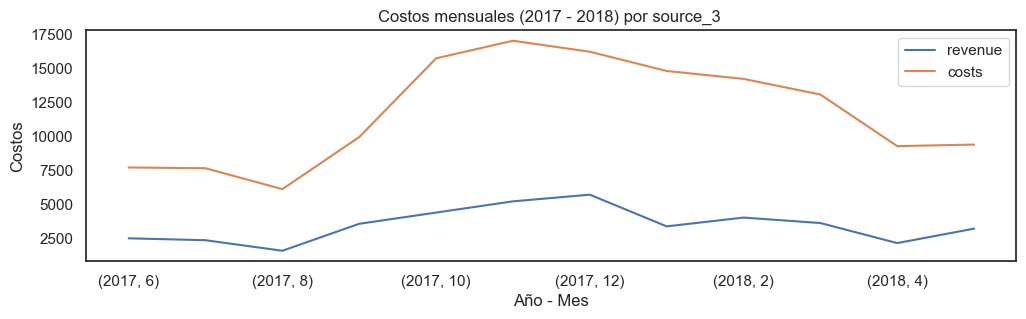

In [610]:
# Gráfico revenue mensual vs costos mensuales

revenue_mes_source_3 = orders_source_3.groupby(
    ['year_order', 'month_order']).agg({'revenue': 'sum'}).reset_index()

costs_mes_source_3 = costs_source_3.groupby(['year_cost', 'month_cost']).agg({'costs': 'sum'}).reset_index()

revenue_costs_mes_source_3 = revenue_mes_source_3.merge(costs_mes_source_3, left_on=['year_order','month_order'], right_on=['year_cost','month_cost'], how='inner')

revenue_costs_mes_source_3 = revenue_costs_mes_source_3.drop(columns=['year_cost','month_cost'])

revenue_costs_mes_source_3.columns = ['year', 'month', 'revenue', 'costs']

print(revenue_costs_mes_source_3)

grafica_revenue_costs_mes_source_3 =  revenue_costs_mes_source_3.groupby(['year', 'month']).agg({'revenue':'sum','costs':'sum'})

grafica_revenue_costs_mes_source_3.plot(kind='line', figsize=(12, 3))

plt.xlabel('Año - Mes')

plt.ylabel('Costos')

plt.title('Costos mensuales (2017 - 2018) por source_3 ')

##### **LVT**

In [611]:
# Nuevos clientes para cada mes

nuevos_clientes_3 = orders_source_3.groupby(
    'first_order_month').agg({'uid': 'nunique'}).reset_index()

nuevos_clientes_3.columns = ['first_order_month','n_buyers']

print(nuevos_clientes_3.head())

  first_order_month  n_buyers
0        2017-06-01       653
1        2017-07-01       459
2        2017-08-01       330
3        2017-09-01       667
4        2017-10-01      1039


In [612]:
# Agrupar primera compra, mes de compra y revenue del mes

cohorts_3 = orders_source_3.groupby(['first_order_month', 'order_month']).agg({
    'revenue': 'sum'}).reset_index()

cohorts_3.head()

first_order_month order_month  revenue
0        2017-06-01  2017-06-01  2536.34
1        2017-06-01  2017-07-01    43.25
2        2017-06-01  2017-08-01    54.04
3        2017-06-01  2017-09-01     7.33
4        2017-06-01  2017-10-01    45.63

In [613]:
# Reporte de cohort

reporte_3 = pd.merge(nuevos_clientes_3, cohorts_3, on='first_order_month')

reporte_3.head()

first_order_month  n_buyers order_month  revenue
0        2017-06-01       653  2017-06-01  2536.34
1        2017-06-01       653  2017-07-01    43.25
2        2017-06-01       653  2017-08-01    54.04
3        2017-06-01       653  2017-09-01     7.33
4        2017-06-01       653  2017-10-01    45.63

In [614]:
# Determinar la edad del cohorte

reporte_3['age'] = (reporte_3['order_month'].dt.to_period('M') - reporte_3['first_order_month'].dt.to_period('M'))

reporte_3['age'] = reporte_3['age'].apply(lambda x: x.n)

reporte_3['age'] = reporte_3['age'].astype('int')

reporte_3.head(5)

print(reporte_3.head())
print()
print(reporte_3['age'].unique())

  first_order_month  n_buyers order_month  revenue  age
0        2017-06-01       653  2017-06-01  2536.34    0
1        2017-06-01       653  2017-07-01    43.25    1
2        2017-06-01       653  2017-08-01    54.04    2
3        2017-06-01       653  2017-09-01     7.33    3
4        2017-06-01       653  2017-10-01    45.63    4

[ 0  1  2  3  4  5  6  7  8  9 10 11]


**IMPORTANTE:** En la información proporcionada no se indica el margen de cada orden, se considera el 'revenue' como el ingreso bruto.

In [615]:
# Calcular LTV

reporte_3['ltv'] = reporte_3['revenue'] / reporte_3['n_buyers']

print('LTV por mes y tiempo de vida:')

print()

print(reporte_3.head())

LTV por mes y tiempo de vida:

  first_order_month  n_buyers order_month  revenue  age       ltv
0        2017-06-01       653  2017-06-01  2536.34    0  3.884135
1        2017-06-01       653  2017-07-01    43.25    1  0.066233
2        2017-06-01       653  2017-08-01    54.04    2  0.082757
3        2017-06-01       653  2017-09-01     7.33    3  0.011225
4        2017-06-01       653  2017-10-01    45.63    4  0.069877


In [616]:
# Tabla dinámica

pivot_ltv_3 = reporte_3.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='mean').round()

pivot_ltv_3 = pivot_ltv_3.fillna('')

print(pivot_ltv_3)

age                 0    1    2    3    4    5    6    7    8    9    10   11
first_order_month                                                            
2017-06-01         4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2017-07-01         5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     
2017-08-01         5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0          
2017-09-01         5.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0               
2017-10-01         4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0                    
2017-11-01         5.0  0.0  0.0  0.0  0.0  0.0  0.0                         
2017-12-01         4.0  0.0  0.0  0.0  0.0  0.0                              
2018-01-01         4.0  0.0  0.0  0.0  0.0                                   
2018-02-01         4.0  0.0  0.0  0.0                                        
2018-03-01         4.0  0.0  0.0                                             
2018-04-01         4.0  0.0                                     

In [617]:
# LTV por cohorte de primer_order_month

ltv_cohorte_3 = reporte_3.groupby(['first_order_month','age']).agg({'ltv':'mean'}).reset_index()

ltv_mean_cohorte_3 = ltv_cohorte_3.groupby('first_order_month').agg({'ltv':'sum'}).round()

ltv_mean_cohorte_3.columns = ['ltv_prom_usuario']

print(ltv_mean_cohorte_3)

                   ltv_prom_usuario
first_order_month                  
2017-06-01                      4.0
2017-07-01                      7.0
2017-08-01                      5.0
2017-09-01                      6.0
2017-10-01                      4.0
2017-11-01                      5.0
2017-12-01                      4.0
2018-01-01                      4.0
2018-02-01                      4.0
2018-03-01                      4.0
2018-04-01                      4.0
2018-05-01                      4.0


##### **CAC**

In [618]:
# Costos por mes

costs_mes_3 = costs_source_3.groupby('first_day_cost').agg({'costs':'sum'}).reset_index()

# Calcular los n_buyers del mes de la cohorte

n_buyers_mes_cohorte_3 = reporte_3.groupby('first_order_month').agg({'n_buyers':'sum'}).reset_index()

# Unir costos del mes y n_buyers

cac_data_3 = costs_mes_3.merge(n_buyers_mes_cohorte_3, left_on='first_day_cost', right_on='first_order_month')

cac_data_3['cac'] = cac_data_3['costs'] / cac_data_3['n_buyers']

print(cac_data_3)

   first_day_cost     costs first_order_month  n_buyers        cac
0      2017-06-01   7731.65        2017-06-01      7836   0.986683
1      2017-07-01   7674.37        2017-07-01      5049   1.519978
2      2017-08-01   6143.54        2017-08-01      3300   1.861679
3      2017-09-01   9963.55        2017-09-01      6003   1.659762
4      2017-10-01  15737.24        2017-10-01      8312   1.893316
5      2017-11-01  17025.34        2017-11-01      7301   2.331919
6      2017-12-01  16219.52        2017-12-01      6540   2.480049
7      2018-01-01  14808.78        2018-01-01      4135   3.581325
8      2018-02-01  14228.56        2018-02-01      3672   3.874880
9      2018-03-01  13080.85        2018-03-01      2415   5.416501
10     2018-04-01   9296.81        2018-04-01       978   9.505941
11     2018-05-01   9411.42        2018-05-01       675  13.942844


##### **LTV & CAC por ususario**

In [619]:
# LTV & CAC

cac_ltv_3 = pd.merge(
    ltv_mean_cohorte_3, cac_data_3[['first_order_month','cac']], on='first_order_month', how='left')

print('LTV & CAC por cohorte:')

print()

print(cac_ltv_3)

LTV & CAC por cohorte:

   first_order_month  ltv_prom_usuario        cac
0         2017-06-01               4.0   0.986683
1         2017-07-01               7.0   1.519978
2         2017-08-01               5.0   1.861679
3         2017-09-01               6.0   1.659762
4         2017-10-01               4.0   1.893316
5         2017-11-01               5.0   2.331919
6         2017-12-01               4.0   2.480049
7         2018-01-01               4.0   3.581325
8         2018-02-01               4.0   3.874880
9         2018-03-01               4.0   5.416501
10        2018-04-01               4.0   9.505941
11        2018-05-01               4.0  13.942844


##### **ROMI**

In [620]:
# Calcular los costos por mes

reporte2_3 = reporte_3.merge(
    costs_mes_3, left_on='first_order_month', right_on='first_day_cost')

reporte2_3['cac'] = reporte2_3['costs'] / reporte2_3['n_buyers']

print(reporte2_3.head())

  first_order_month  n_buyers order_month  revenue  age       ltv  \
0        2017-06-01       653  2017-06-01  2536.34    0  3.884135   
1        2017-06-01       653  2017-07-01    43.25    1  0.066233   
2        2017-06-01       653  2017-08-01    54.04    2  0.082757   
3        2017-06-01       653  2017-09-01     7.33    3  0.011225   
4        2017-06-01       653  2017-10-01    45.63    4  0.069877   

  first_day_cost    costs        cac  
0     2017-06-01  7731.65  11.840199  
1     2017-06-01  7731.65  11.840199  
2     2017-06-01  7731.65  11.840199  
3     2017-06-01  7731.65  11.840199  
4     2017-06-01  7731.65  11.840199  


In [621]:
# Calcular ROMI

reporte2_3['romi'] = reporte2_3['ltv'] / reporte2_3['cac']

romi_output_3 = reporte2_3.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')

romi_output_3 = romi_output_3.cumsum(axis=1).round(2)

romi_output_3 = romi_output_3.fillna('')

print('ROMI mensual por cohorte:')

print()

print(romi_output_3)


ROMI mensual por cohorte:

age                  0     1     2     3     4     5     6     7     8     9   \
first_order_month                                                               
2017-06-01         0.33  0.33  0.34  0.34  0.35  0.35  0.35  0.35  0.36  0.37   
2017-07-01         0.31  0.31  0.33  0.33  0.34  0.37  0.38  0.38  0.38  0.39   
2017-08-01         0.25  0.25  0.26  0.27  0.27  0.28  0.28  0.29  0.29  0.29   
2017-09-01         0.35  0.35  0.36  0.41  0.41  0.41  0.42  0.42  0.42         
2017-10-01         0.27  0.28  0.29  0.29  0.29  0.29  0.29   0.3               
2017-11-01         0.29  0.31  0.31  0.32  0.32  0.32  0.32                     
2017-12-01         0.28  0.29  0.29  0.29  0.29   0.3                           
2018-01-01         0.21  0.22  0.22  0.23  0.23                                 
2018-02-01         0.25  0.25  0.25  0.25                                       
2018-03-01         0.25  0.26  0.26                                             
2

In [622]:
# Recuperación de inversión por cohorte (promedio)

romi_output2_3 = reporte2_3.pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean')

romi_output2_3 = romi_output2_3.cumsum(axis=1).round(2)

romi_output2_3 = romi_output2_3.cumsum(axis=1).mean(axis=0)

print('Mes de recuperación de inversión:')

print(romi_output2_3)

Mes de recuperación de inversión:
age
0     0.274167
1     0.550000
2     0.855000
3     1.167778
4     1.501250
5     1.888571
6     2.253333
7     2.614000
8     3.055000
9     3.240000
10    3.880000
11    4.210000
dtype: float64


#### **Source_id: 4 - LTV / CAC / ROMI**

##### **Preparar los datos**

In [623]:
# Filtro de source_id en los datasets

orders_source_4 = orders_source3[orders_source3['source_id'] == 4]

costs_source_4 = costs2[costs2['source_id'] == 4]

print('Valores en orders-soruce_id:', orders_source_4['source_id'].unique())
print()
print('Valores en costs-source_id:', costs_source_4['source_id'].unique())

Valores en orders-soruce_id: [4]

Valores en costs-source_id: [4]


##### **Volumen de ventas**

In [624]:
# Volumen de ventas

orders_total_source_4 = orders_source_4['revenue'].sum()

costs_total_source_4 = costs_source_4['costs'].sum()

print('Revenue total: $', orders_total_source_4)

print('Costos total: $', costs_total_source_4)

print('Total despúes de costos: $', round(orders_total_source_4 - costs_total_source_4),2)

Revenue total: $ 48314.909999999996
Costos total: $ 61073.600000000006
Total despúes de costos: $ -12759 2


##### **Revenue vs Costos mensuales**

    year  month  revenue    costs
0   2017      6  1863.02  3514.80
1   2017      7  2788.55  3529.73
2   2017      8  1907.78  3217.36
3   2017      9  2515.98  5192.26
4   2017     10  5797.00  6420.84
5   2017     11  6158.20  5388.82
6   2017     12  5928.47  7680.47
7   2018      1  4626.34  5832.79
8   2018      2  4894.00  5711.96
9   2018      3  4978.82  5961.87
10  2018      4  3548.57  4408.49
11  2018      5  3308.18  4214.21


Text(0.5, 1.0, 'Costos mensuales (2017 - 2018) por source_4 ')

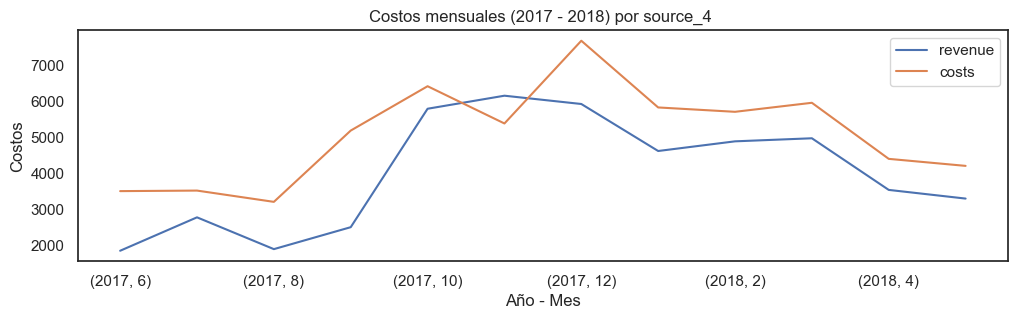

In [625]:
# Gráfico revenue mensual vs costos mensuales

revenue_mes_source_4 = orders_source_4.groupby(
    ['year_order', 'month_order']).agg({'revenue': 'sum'}).reset_index()

costs_mes_source_4 = costs_source_4.groupby(['year_cost', 'month_cost']).agg({'costs': 'sum'}).reset_index()

revenue_costs_mes_source_4 = revenue_mes_source_4.merge(costs_mes_source_4, left_on=['year_order','month_order'], right_on=['year_cost','month_cost'], how='inner')

revenue_costs_mes_source_4 = revenue_costs_mes_source_4.drop(columns=['year_cost','month_cost'])

revenue_costs_mes_source_4.columns = ['year', 'month', 'revenue', 'costs']

print(revenue_costs_mes_source_4)

grafica_revenue_costs_mes_source_4 =  revenue_costs_mes_source_4.groupby(['year', 'month']).agg({'revenue':'sum','costs':'sum'})

grafica_revenue_costs_mes_source_4.plot(kind='line', figsize=(12, 3))

plt.xlabel('Año - Mes')

plt.ylabel('Costos')

plt.title('Costos mensuales (2017 - 2018) por source_4 ')

##### **LVT**

In [626]:
# Nuevos clientes para cada mes

nuevos_clientes_4 = orders_source_4.groupby(
    'first_order_month').agg({'uid': 'nunique'}).reset_index()

nuevos_clientes_4.columns = ['first_order_month','n_buyers']

print(nuevos_clientes_4.head())

  first_order_month  n_buyers
0        2017-06-01       458
1        2017-07-01       511
2        2017-08-01       340
3        2017-09-01       570
4        2017-10-01      1164


In [627]:
# Agrupar primera compra, mes de compra y revenue del mes

cohorts_4 = orders_source_4.groupby(['first_order_month', 'order_month']).agg({
    'revenue': 'sum'}).reset_index()

cohorts_4.head()

first_order_month order_month  revenue
0        2017-06-01  2017-06-01  1863.02
1        2017-06-01  2017-07-01    76.93
2        2017-06-01  2017-08-01    83.22
3        2017-06-01  2017-09-01    67.80
4        2017-06-01  2017-10-01   278.40

In [628]:
# Reporte de cohort

reporte_4 = pd.merge(nuevos_clientes_4, cohorts_4, on='first_order_month')

reporte_4.head()

first_order_month  n_buyers order_month  revenue
0        2017-06-01       458  2017-06-01  1863.02
1        2017-06-01       458  2017-07-01    76.93
2        2017-06-01       458  2017-08-01    83.22
3        2017-06-01       458  2017-09-01    67.80
4        2017-06-01       458  2017-10-01   278.40

In [629]:
# Determinar la edad del cohorte

reporte_4['age'] = (reporte_4['order_month'].dt.to_period('M') - reporte_4['first_order_month'].dt.to_period('M'))

reporte_4['age'] = reporte_4['age'].apply(lambda x: x.n)

reporte_4['age'] = reporte_4['age'].astype('int')

reporte_4.head(5)

print(reporte_4.head())
print()
print(reporte_4['age'].unique())

  first_order_month  n_buyers order_month  revenue  age
0        2017-06-01       458  2017-06-01  1863.02    0
1        2017-06-01       458  2017-07-01    76.93    1
2        2017-06-01       458  2017-08-01    83.22    2
3        2017-06-01       458  2017-09-01    67.80    3
4        2017-06-01       458  2017-10-01   278.40    4

[ 0  1  2  3  4  5  6  7  8  9 10 11]


**IMPORTANTE:** En la información proporcionada no se indica el margen de cada orden, se considera el 'revenue' como el ingreso bruto.

In [630]:
# Calcular LTV

reporte_4['ltv'] = reporte_4['revenue'] / reporte_4['n_buyers']

print('LTV por mes y tiempo de vida:')

print()

print(reporte_4.head())

LTV por mes y tiempo de vida:

  first_order_month  n_buyers order_month  revenue  age       ltv
0        2017-06-01       458  2017-06-01  1863.02    0  4.067729
1        2017-06-01       458  2017-07-01    76.93    1  0.167969
2        2017-06-01       458  2017-08-01    83.22    2  0.181703
3        2017-06-01       458  2017-09-01    67.80    3  0.148035
4        2017-06-01       458  2017-10-01   278.40    4  0.607860


In [631]:
# Tabla dinámica

pivot_ltv_4 = reporte_4.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='mean').round()

pivot_ltv_4 = pivot_ltv_4.fillna('')

print(pivot_ltv_4)

age                 0    1    2    3    4    5    6    7    8    9    10   11
first_order_month                                                            
2017-06-01         4.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0
2017-07-01         5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     
2017-08-01         5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0          
2017-09-01         4.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0               
2017-10-01         5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0                    
2017-11-01         5.0  0.0  0.0  0.0  0.0  0.0  0.0                         
2017-12-01         4.0  0.0  0.0  0.0  0.0  0.0                              
2018-01-01         4.0  0.0  0.0  0.0  0.0                                   
2018-02-01         4.0  0.0  0.0  0.0                                        
2018-03-01         5.0  0.0  0.0                                             
2018-04-01         5.0  0.0                                     

In [632]:
# LTV por cohorte de primer_order_month

ltv_cohorte_4 = reporte_4.groupby(['first_order_month','age']).agg({'ltv':'mean'}).reset_index()

ltv_mean_cohorte_4 = ltv_cohorte_4.groupby('first_order_month').agg({'ltv':'sum'}).round()

ltv_mean_cohorte_4.columns = ['ltv_prom_usuario']

print(ltv_mean_cohorte_4)

                   ltv_prom_usuario
first_order_month                  
2017-06-01                      7.0
2017-07-01                      6.0
2017-08-01                      6.0
2017-09-01                      6.0
2017-10-01                      5.0
2017-11-01                      5.0
2017-12-01                      4.0
2018-01-01                      5.0
2018-02-01                      4.0
2018-03-01                      5.0
2018-04-01                      5.0
2018-05-01                      4.0


##### **CAC**

In [633]:
# Costos por mes

costs_mes_4 = costs_source_4.groupby('first_day_cost').agg({'costs':'sum'}).reset_index()

# Calcular los n_buyers del mes de la cohorte

n_buyers_mes_cohorte_4 = reporte_4.groupby('first_order_month').agg({'n_buyers':'sum'}).reset_index()

# Unir costos del mes y n_buyers

cac_data_4 = costs_mes_4.merge(n_buyers_mes_cohorte_4, left_on='first_day_cost', right_on='first_order_month')

cac_data_4['cac'] = cac_data_4['costs'] / cac_data_4['n_buyers']

print(cac_data_4)

   first_day_cost    costs first_order_month  n_buyers       cac
0      2017-06-01  3514.80        2017-06-01      5496  0.639520
1      2017-07-01  3529.73        2017-07-01      5621  0.627954
2      2017-08-01  3217.36        2017-08-01      3400  0.946282
3      2017-09-01  5192.26        2017-09-01      5130  1.012136
4      2017-10-01  6420.84        2017-10-01      9312  0.689523
5      2017-11-01  5388.82        2017-11-01      8029  0.671170
6      2017-12-01  7680.47        2017-12-01      7740  0.992309
7      2018-01-01  5832.79        2018-01-01      4750  1.227956
8      2018-02-01  5711.96        2018-02-01      3908  1.461607
9      2018-03-01  5961.87        2018-03-01      2898  2.057236
10     2018-04-01  4408.49        2018-04-01      1244  3.543802
11     2018-05-01  4214.21        2018-05-01       707  5.960693


##### **LTV & CAC por ususario**

In [634]:
# LTV & CAC

cac_ltv_4 = pd.merge(
    ltv_mean_cohorte_4, cac_data_4[['first_order_month','cac']], on='first_order_month', how='left')

print('LTV & CAC por cohorte:')

print()

print(cac_ltv_4)

LTV & CAC por cohorte:

   first_order_month  ltv_prom_usuario       cac
0         2017-06-01               7.0  0.639520
1         2017-07-01               6.0  0.627954
2         2017-08-01               6.0  0.946282
3         2017-09-01               6.0  1.012136
4         2017-10-01               5.0  0.689523
5         2017-11-01               5.0  0.671170
6         2017-12-01               4.0  0.992309
7         2018-01-01               5.0  1.227956
8         2018-02-01               4.0  1.461607
9         2018-03-01               5.0  2.057236
10        2018-04-01               5.0  3.543802
11        2018-05-01               4.0  5.960693


##### **ROMI**

In [635]:
# Calcular los costos por mes

reporte2_4 = reporte_4.merge(
    costs_mes_4, left_on='first_order_month', right_on='first_day_cost')

reporte2_4['cac'] = reporte2_4['costs'] / reporte2_4['n_buyers']

print(reporte2_4.head())

  first_order_month  n_buyers order_month  revenue  age       ltv  \
0        2017-06-01       458  2017-06-01  1863.02    0  4.067729   
1        2017-06-01       458  2017-07-01    76.93    1  0.167969   
2        2017-06-01       458  2017-08-01    83.22    2  0.181703   
3        2017-06-01       458  2017-09-01    67.80    3  0.148035   
4        2017-06-01       458  2017-10-01   278.40    4  0.607860   

  first_day_cost   costs       cac  
0     2017-06-01  3514.8  7.674236  
1     2017-06-01  3514.8  7.674236  
2     2017-06-01  3514.8  7.674236  
3     2017-06-01  3514.8  7.674236  
4     2017-06-01  3514.8  7.674236  


In [636]:
# Calcular ROMI

reporte2_4['romi'] = reporte2_4['ltv'] / reporte2_4['cac']

romi_output_4 = reporte2_4.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')

romi_output_4 = romi_output_4.cumsum(axis=1).round(2)

romi_output_4 = romi_output_4.fillna('')

print('ROMI mensual por cohorte:')

print()

print(romi_output_4)


ROMI mensual por cohorte:

age                  0     1     2     3     4     5     6     7     8     9   \
first_order_month                                                               
2017-06-01         0.53  0.55  0.58  0.59  0.67  0.74  0.81  0.82  0.84  0.85   
2017-07-01         0.77  0.78  0.81  0.85  0.87  0.88  0.89  0.89  0.91  0.92   
2017-08-01         0.55  0.56  0.57  0.58   0.6  0.61  0.61  0.62  0.62  0.63   
2017-09-01         0.45  0.46  0.49  0.52  0.58  0.59  0.59   0.6  0.61         
2017-10-01         0.82  0.86  0.87  0.88  0.89  0.89   0.9   0.9               
2017-11-01         1.00  1.04  1.06   1.1  1.12  1.13  1.13                     
2017-12-01         0.67  0.69   0.7  0.71  0.71  0.72                           
2018-01-01         0.68  0.74  0.74  0.75  0.75                                 
2018-02-01         0.71  0.73  0.73  0.73                                       
2018-03-01         0.75  0.77  0.78                                             
2

In [637]:
# Recuperación de inversión por cohorte (promedio)

romi_output2_4 = reporte2_4.pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean')

romi_output2_4 = romi_output2_4.cumsum(axis=1).round(2)

romi_output2_4 = romi_output2_4.cumsum(axis=1).mean(axis=0)

print('Mes de recuperación de inversión:')

print(romi_output2_4)

Mes de recuperación de inversión:
age
0     0.694167
1     1.411818
2     2.144000
3     2.872222
4     3.642500
5     4.434286
6     5.295000
7     5.604000
8     5.997500
9     7.166667
10    8.680000
11    8.770000
dtype: float64


#### **Source_id: 5 - LTV / CAC / ROMI**

##### **Preparar los datos**

In [638]:
# Filtro de source_id en los datasets

orders_source_5 = orders_source3[orders_source3['source_id'] == 5]

costs_source_5 = costs2[costs2['source_id'] == 5]

print('Valores en orders-soruce_id:', orders_source_5['source_id'].unique())
print()
print('Valores en costs-source_id:', costs_source_5['source_id'].unique())

Valores en orders-soruce_id: [5]

Valores en costs-source_id: [5]


##### **Volumen de ventas**

In [639]:
# Volumen de ventas

orders_total_source_5 = orders_source_5['revenue'].sum()

costs_total_source_5 = costs_source_5['costs'].sum()

print('Revenue total: $', orders_total_source_5)

print('Costos total: $', costs_total_source_5)

print('Total despúes de costos: $', round(orders_total_source_5 - costs_total_source_5),2)

Revenue total: $ 57089.68
Costos total: $ 51757.09999999999
Total despúes de costos: $ 5333 2


##### **Revenue vs Costos mensuales**

    year  month  revenue    costs
0   2017      6  2322.62  2616.12
1   2017      7  2849.49  2998.14
2   2017      8  2349.45  2185.28
3   2017      9  9781.63  3849.14
4   2017     10  6623.18  5767.40
5   2017     11  4532.07  6325.34
6   2017     12  5487.51  5872.52
7   2018      1  3910.42  5371.52
8   2018      2  5672.81  5071.31
9   2018      3  5956.08  4529.62
10  2018      4  3141.58  3501.15
11  2018      5  4462.84  3669.56


Text(0.5, 1.0, 'Costos mensuales (2017 - 2018) por source_5 ')

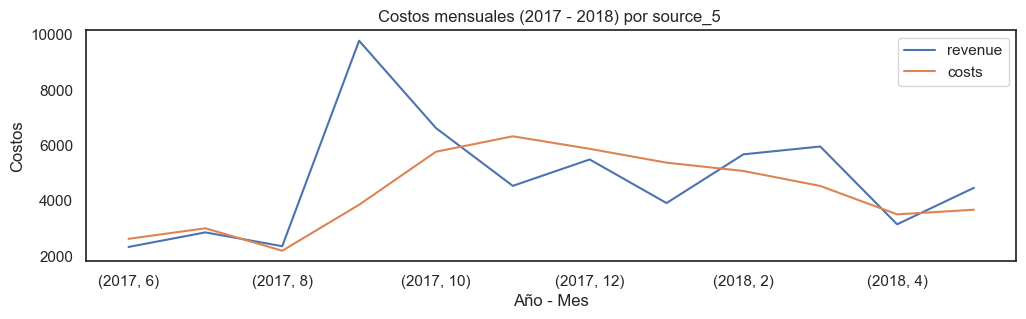

In [640]:
# Gráfico revenue mensual vs costos mensuales

revenue_mes_source_5 = orders_source_5.groupby(
    ['year_order', 'month_order']).agg({'revenue': 'sum'}).reset_index()

costs_mes_source_5 = costs_source_5.groupby(['year_cost', 'month_cost']).agg({'costs': 'sum'}).reset_index()

revenue_costs_mes_source_5 = revenue_mes_source_5.merge(costs_mes_source_5, left_on=['year_order','month_order'], right_on=['year_cost','month_cost'], how='inner')

revenue_costs_mes_source_5 = revenue_costs_mes_source_5.drop(columns=['year_cost','month_cost'])

revenue_costs_mes_source_5.columns = ['year', 'month', 'revenue', 'costs']

print(revenue_costs_mes_source_5)

grafica_revenue_costs_mes_source_5 =  revenue_costs_mes_source_5.groupby(['year', 'month']).agg({'revenue':'sum','costs':'sum'})

grafica_revenue_costs_mes_source_5.plot(kind='line', figsize=(12, 3))

plt.xlabel('Año - Mes')

plt.ylabel('Costos')

plt.title('Costos mensuales (2017 - 2018) por source_5 ')

##### **LVT**

In [641]:
# Nuevos clientes para cada mes

nuevos_clientes_5 = orders_source_5.groupby(
    'first_order_month').agg({'uid': 'nunique'}).reset_index()

nuevos_clientes_5.columns = ['first_order_month','n_buyers']

print(nuevos_clientes_5.head())

  first_order_month  n_buyers
0        2017-06-01       444
1        2017-07-01       455
2        2017-08-01       357
3        2017-09-01       648
4        2017-10-01      1001


In [642]:
# Agrupar primera compra, mes de compra y revenue del mes

cohorts_5 = orders_source_5.groupby(['first_order_month', 'order_month']).agg({
    'revenue': 'sum'}).reset_index()

cohorts_5.head()

first_order_month order_month  revenue
0        2017-06-01  2017-06-01  2322.62
1        2017-06-01  2017-07-01   277.71
2        2017-06-01  2017-08-01   190.70
3        2017-06-01  2017-09-01  1000.65
4        2017-06-01  2017-10-01   654.78

In [643]:
# Reporte de cohort

reporte_5 = pd.merge(nuevos_clientes_5, cohorts_5, on='first_order_month')

reporte_5.head()

first_order_month  n_buyers order_month  revenue
0        2017-06-01       444  2017-06-01  2322.62
1        2017-06-01       444  2017-07-01   277.71
2        2017-06-01       444  2017-08-01   190.70
3        2017-06-01       444  2017-09-01  1000.65
4        2017-06-01       444  2017-10-01   654.78

In [644]:
# Determinar la edad del cohorte

reporte_5['age'] = (reporte_5['order_month'].dt.to_period('M') - reporte_5['first_order_month'].dt.to_period('M'))

reporte_5['age'] = reporte_5['age'].apply(lambda x: x.n)

reporte_5['age'] = reporte_5['age'].astype('int')

reporte_5.head(5)

print(reporte_5.head())
print()
print(reporte_5['age'].unique())

  first_order_month  n_buyers order_month  revenue  age
0        2017-06-01       444  2017-06-01  2322.62    0
1        2017-06-01       444  2017-07-01   277.71    1
2        2017-06-01       444  2017-08-01   190.70    2
3        2017-06-01       444  2017-09-01  1000.65    3
4        2017-06-01       444  2017-10-01   654.78    4

[ 0  1  2  3  4  5  6  7  8  9 10 11]


**IMPORTANTE:** En la información proporcionada no se indica el margen de cada orden, se considera el 'revenue' como el ingreso bruto.

In [645]:
# Calcular LTV

reporte_5['ltv'] = reporte_5['revenue'] / reporte_5['n_buyers']

print('LTV por mes y tiempo de vida:')

print()

print(reporte_5.head())

LTV por mes y tiempo de vida:

  first_order_month  n_buyers order_month  revenue  age       ltv
0        2017-06-01       444  2017-06-01  2322.62    0  5.231126
1        2017-06-01       444  2017-07-01   277.71    1  0.625473
2        2017-06-01       444  2017-08-01   190.70    2  0.429505
3        2017-06-01       444  2017-09-01  1000.65    3  2.253716
4        2017-06-01       444  2017-10-01   654.78    4  1.474730


In [646]:
# Tabla dinámica

pivot_ltv_5 = reporte_5.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='mean').round()

pivot_ltv_5 = pivot_ltv_5.fillna('')

print(pivot_ltv_5)

age                  0    1    2    3    4    5    6    7    8    9    10   11
first_order_month                                                             
2017-06-01          5.0  1.0  0.0  2.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0
2017-07-01          6.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     
2017-08-01          6.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0          
2017-09-01         13.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0               
2017-10-01          6.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0                    
2017-11-01          5.0  0.0  0.0  1.0  0.0  0.0  0.0                         
2017-12-01          5.0  0.0  0.0  2.0  0.0  0.0                              
2018-01-01          5.0  1.0  0.0  0.0  0.0                                   
2018-02-01          5.0  0.0  0.0  0.0                                        
2018-03-01          6.0  0.0  1.0                                             
2018-04-01          5.0  1.0                        

In [647]:
# LTV por cohorte de primer_order_month

ltv_cohorte_5 = reporte_5.groupby(['first_order_month','age']).agg({'ltv':'mean'}).reset_index()

ltv_mean_cohorte_5 = ltv_cohorte_5.groupby('first_order_month').agg({'ltv':'sum'}).round()

ltv_mean_cohorte_5.columns = ['ltv_prom_usuario']

print(ltv_mean_cohorte_5)

                   ltv_prom_usuario
first_order_month                  
2017-06-01                     14.0
2017-07-01                      7.0
2017-08-01                     10.0
2017-09-01                     14.0
2017-10-01                      6.0
2017-11-01                      7.0
2017-12-01                      8.0
2018-01-01                      6.0
2018-02-01                      5.0
2018-03-01                      7.0
2018-04-01                      6.0
2018-05-01                      5.0


##### **CAC**

In [648]:
# Costos por mes

costs_mes_5 = costs_source_5.groupby('first_day_cost').agg({'costs':'sum'}).reset_index()

# Calcular los n_buyers del mes de la cohorte

n_buyers_mes_cohorte_5 = reporte_5.groupby('first_order_month').agg({'n_buyers':'sum'}).reset_index()

# Unir costos del mes y n_buyers

cac_data_5 = costs_mes_5.merge(n_buyers_mes_cohorte_5, left_on='first_day_cost', right_on='first_order_month')

cac_data_5['cac'] = cac_data_5['costs'] / cac_data_5['n_buyers']

print(cac_data_5)

   first_day_cost    costs first_order_month  n_buyers       cac
0      2017-06-01  2616.12        2017-06-01      5328  0.491014
1      2017-07-01  2998.14        2017-07-01      5005  0.599029
2      2017-08-01  2185.28        2017-08-01      3570  0.612123
3      2017-09-01  3849.14        2017-09-01      5832  0.660003
4      2017-10-01  5767.40        2017-10-01      8008  0.720205
5      2017-11-01  6325.34        2017-11-01      5061  1.249820
6      2017-12-01  5872.52        2017-12-01      4602  1.276080
7      2018-01-01  5371.52        2018-01-01      3295  1.630203
8      2018-02-01  5071.31        2018-02-01      2820  1.798337
9      2018-03-01  4529.62        2018-03-01      1845  2.455079
10     2018-04-01  3501.15        2018-04-01       928  3.772791
11     2018-05-01  3669.56        2018-05-01       553  6.635732


##### **LTV & CAC por ususario**

In [649]:
# LTV & CAC

cac_ltv_5 = pd.merge(
    ltv_mean_cohorte_5, cac_data_5[['first_order_month','cac']], on='first_order_month', how='left')

print('LTV & CAC por cohorte:')

print()

print(cac_ltv_5)

LTV & CAC por cohorte:

   first_order_month  ltv_prom_usuario       cac
0         2017-06-01              14.0  0.491014
1         2017-07-01               7.0  0.599029
2         2017-08-01              10.0  0.612123
3         2017-09-01              14.0  0.660003
4         2017-10-01               6.0  0.720205
5         2017-11-01               7.0  1.249820
6         2017-12-01               8.0  1.276080
7         2018-01-01               6.0  1.630203
8         2018-02-01               5.0  1.798337
9         2018-03-01               7.0  2.455079
10        2018-04-01               6.0  3.772791
11        2018-05-01               5.0  6.635732


##### **ROMI**

In [650]:
# Calcular los costos por mes

reporte2_5 = reporte_5.merge(
    costs_mes_5, left_on='first_order_month', right_on='first_day_cost')

reporte2_5['cac'] = reporte2_5['costs'] / reporte2_5['n_buyers']

print(reporte2_5.head())

  first_order_month  n_buyers order_month  revenue  age       ltv  \
0        2017-06-01       444  2017-06-01  2322.62    0  5.231126   
1        2017-06-01       444  2017-07-01   277.71    1  0.625473   
2        2017-06-01       444  2017-08-01   190.70    2  0.429505   
3        2017-06-01       444  2017-09-01  1000.65    3  2.253716   
4        2017-06-01       444  2017-10-01   654.78    4  1.474730   

  first_day_cost    costs       cac  
0     2017-06-01  2616.12  5.892162  
1     2017-06-01  2616.12  5.892162  
2     2017-06-01  2616.12  5.892162  
3     2017-06-01  2616.12  5.892162  
4     2017-06-01  2616.12  5.892162  


In [651]:
# Calcular ROMI

reporte2_5['romi'] = reporte2_5['ltv'] / reporte2_5['cac']

romi_output_5 = reporte2_5.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')

romi_output_5 = romi_output_5.cumsum(axis=1).round(2)

romi_output_5 = romi_output_5.fillna('')

print('ROMI mensual por cohorte:')

print()

print(romi_output_5)


ROMI mensual por cohorte:

age                  0     1     2     3     4     5     6     7     8     9   \
first_order_month                                                               
2017-06-01         0.89  0.99  1.07  1.45   1.7  1.83  2.01  2.13  2.24  2.35   
2017-07-01         0.86  0.91  0.97  0.97  0.99  0.99   1.0   1.0  1.03  1.03   
2017-08-01         0.92   1.1  1.17   1.3  1.47  1.52  1.59  1.65  1.67  1.69   
2017-09-01         2.13  2.16  2.18  2.27  2.28  2.34  2.35  2.36  2.39         
2017-10-01         0.99   1.0  1.01  1.02  1.04  1.07  1.08   1.1               
2017-11-01         0.59  0.61  0.63  0.74  0.75  0.75  0.75                     
2017-12-01         0.70  0.73  0.77  0.98  0.99  1.01                           
2018-01-01         0.56  0.65  0.67  0.71  0.73                                 
2018-02-01         0.68  0.69  0.71  0.73                                       
2018-03-01         0.84  0.87   1.0                                             
2

In [652]:
# Recuperación de inversión por cohorte (promedio)

romi_output2_5 = reporte2_5.pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean')

romi_output2_5 = romi_output2_5.cumsum(axis=1).round(2)

romi_output2_5 = romi_output2_5.cumsum(axis=1).mean(axis=0)

print('Mes de recuperación de inversión:')

print(romi_output2_5)

Mes de recuperación de inversión:
age
0      0.882500
1      1.852727
2      2.905000
3      4.056667
4      5.456250
5      7.120000
6      8.906667
7     11.372000
8     13.970000
9     13.496667
10    14.910000
11    21.450000
dtype: float64


#### **Source_id: 9 - LTV / CAC / ROMI**

##### **Preparar los datos**

In [653]:
# Filtro de source_id en los datasets

orders_source_9 = orders_source3[orders_source3['source_id'] == 9]

costs_source_9 = costs2[costs2['source_id'] == 9]

print('Valores en orders-soruce_id:', orders_source_9['source_id'].unique())
print()
print('Valores en costs-source_id:', costs_source_9['source_id'].unique())

Valores en orders-soruce_id: [9]

Valores en costs-source_id: [9]


##### **Volumen de ventas**

In [654]:
# Volumen de ventas

orders_total_source_9 = orders_source_9['revenue'].sum()

costs_total_source_9 = costs_source_9['costs'].sum()

print('Revenue total: $', orders_total_source_9)

print('Costos total: $', costs_total_source_9)

print('Total despúes de costos: $', round(orders_total_source_9 - costs_total_source_9),2)

Revenue total: $ 3802.8100000000004
Costos total: $ 5517.49
Total despúes de costos: $ -1715 2


##### **Revenue vs Costos mensuales**

    year  month  revenue   costs
0   2017      6   180.35  285.22
1   2017      7   270.35  302.54
2   2017      8   193.56  248.93
3   2017      9   286.01  415.62
4   2017     10   417.14  609.41
5   2017     11   505.42  683.18
6   2017     12   346.81  657.98
7   2018      1   208.98  547.16
8   2018      2   366.82  551.50
9   2018      3   564.17  480.29
10  2018      4   273.79  373.49
11  2018      5   189.41  362.17


Text(0.5, 1.0, 'Costos mensuales (2017 - 2018) por source_9 ')

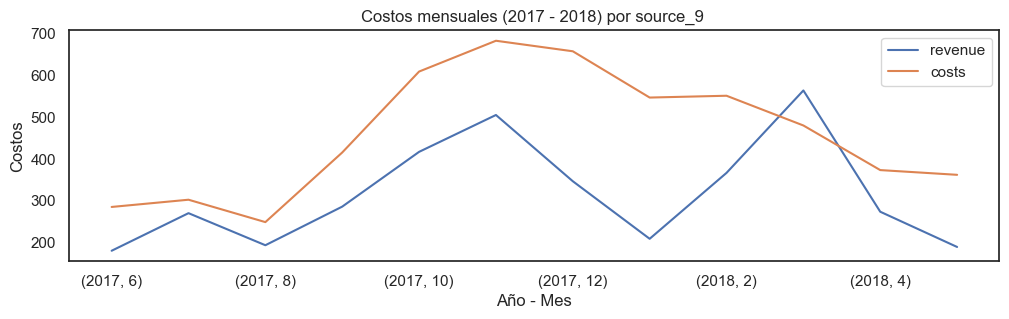

In [655]:
# Gráfico revenue mensual vs costos mensuales

revenue_mes_source_9 = orders_source_9.groupby(
    ['year_order', 'month_order']).agg({'revenue': 'sum'}).reset_index()

costs_mes_source_9 = costs_source_9.groupby(
    ['year_cost', 'month_cost']).agg({'costs': 'sum'}).reset_index()

revenue_costs_mes_source_9 = revenue_mes_source_9.merge(costs_mes_source_9, left_on=[
                                                        'year_order', 'month_order'], right_on=['year_cost', 'month_cost'], how='inner')

revenue_costs_mes_source_9 = revenue_costs_mes_source_9.drop(columns=['year_cost','month_cost'])

revenue_costs_mes_source_9.columns = ['year', 'month', 'revenue', 'costs']

print(revenue_costs_mes_source_9)

grafica_revenue_costs_mes_source_9 =  revenue_costs_mes_source_9.groupby(['year', 'month']).agg({'revenue':'sum','costs':'sum'})

grafica_revenue_costs_mes_source_9.plot(kind='line', figsize=(12, 3))

plt.xlabel('Año - Mes')

plt.ylabel('Costos')

plt.title('Costos mensuales (2017 - 2018) por source_9 ')

##### **LVT**

In [656]:
# Nuevos clientes para cada mes

nuevos_clientes_9 = orders_source_9.groupby(
    'first_order_month').agg({'uid': 'nunique'}).reset_index()

nuevos_clientes_9.columns = ['first_order_month','n_buyers']

print(nuevos_clientes_9.head())

  first_order_month  n_buyers
0        2017-06-01        65
1        2017-07-01        63
2        2017-08-01        58
3        2017-09-01        77
4        2017-10-01       118


In [657]:
# Agrupar primera compra, mes de compra y revenue del mes

cohorts_9 = orders_source_9.groupby(['first_order_month', 'order_month']).agg({
    'revenue': 'sum'}).reset_index()

cohorts_9.head()

first_order_month order_month  revenue
0        2017-06-01  2017-06-01   180.35
1        2017-06-01  2017-08-01    14.67
2        2017-06-01  2017-09-01     6.38
3        2017-06-01  2017-10-01     5.87
4        2017-06-01  2017-11-01    11.36

In [658]:
# Reporte de cohort

reporte_9 = pd.merge(nuevos_clientes_9, cohorts_9, on='first_order_month')

reporte_9.head()

first_order_month  n_buyers order_month  revenue
0        2017-06-01        65  2017-06-01   180.35
1        2017-06-01        65  2017-08-01    14.67
2        2017-06-01        65  2017-09-01     6.38
3        2017-06-01        65  2017-10-01     5.87
4        2017-06-01        65  2017-11-01    11.36

In [659]:
# Determinar la edad del cohorte

reporte_9['age'] = (reporte_9['order_month'].dt.to_period(
    'M') - reporte_9['first_order_month'].dt.to_period('M'))

reporte_9['age'] = reporte_9['age'].apply(lambda x: x.n)

reporte_9['age'] = reporte_9['age'].astype('int')

reporte_9.head(5)

print(reporte_9.head())
print()
print(reporte_9['age'].unique())

  first_order_month  n_buyers order_month  revenue  age
0        2017-06-01        65  2017-06-01   180.35    0
1        2017-06-01        65  2017-08-01    14.67    2
2        2017-06-01        65  2017-09-01     6.38    3
3        2017-06-01        65  2017-10-01     5.87    4
4        2017-06-01        65  2017-11-01    11.36    5

[ 0  2  3  4  5  6  8  9 10  1  7]


**IMPORTANTE:** En la información proporcionada no se indica el margen de cada orden, se considera el 'revenue' como el ingreso bruto.

In [660]:
# Calcular LTV

reporte_9['ltv'] = reporte_9['revenue'] / reporte_9['n_buyers']

print('LTV por mes y tiempo de vida:')

print()

print(reporte_9.head())

LTV por mes y tiempo de vida:

  first_order_month  n_buyers order_month  revenue  age       ltv
0        2017-06-01        65  2017-06-01   180.35    0  2.774615
1        2017-06-01        65  2017-08-01    14.67    2  0.225692
2        2017-06-01        65  2017-09-01     6.38    3  0.098154
3        2017-06-01        65  2017-10-01     5.87    4  0.090308
4        2017-06-01        65  2017-11-01    11.36    5  0.174769


In [661]:
# Tabla dinámica

pivot_ltv_9 = reporte_9.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='mean').round()

pivot_ltv_9 = pivot_ltv_9.fillna('')

print(pivot_ltv_9)

age                 0    1    2    3    4    5    6    7    8    9    10
first_order_month                                                       
2017-06-01         3.0       0.0  0.0  0.0  0.0  0.0       0.0  0.0  2.0
2017-07-01         4.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     
2017-08-01         3.0       0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0     
2017-09-01         3.0  1.0  0.0       0.0  0.0  0.0  0.0               
2017-10-01         3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0               
2017-11-01         3.0  0.0  0.0  0.0  0.0       0.0                    
2017-12-01         3.0  0.0  0.0  0.0  0.0  0.0                         
2018-01-01         2.0  0.0  0.0  0.0  0.0                              
2018-02-01         5.0  1.0  0.0  0.0                                   
2018-03-01         3.0  0.0                                             
2018-04-01         6.0  0.0                                             
2018-05-01         3.0                             

In [662]:
# LTV por cohorte de primer_order_month

ltv_cohorte_9 = reporte_9.groupby(['first_order_month','age']).agg({'ltv':'mean'}).reset_index()

ltv_mean_cohorte_9 = ltv_cohorte_9.groupby('first_order_month').agg({'ltv':'sum'}).round()

ltv_mean_cohorte_9.columns = ['ltv_prom_usuario']

print(ltv_mean_cohorte_9)

                   ltv_prom_usuario
first_order_month                  
2017-06-01                      6.0
2017-07-01                      6.0
2017-08-01                      5.0
2017-09-01                      4.0
2017-10-01                      4.0
2017-11-01                      4.0
2017-12-01                      4.0
2018-01-01                      3.0
2018-02-01                      5.0
2018-03-01                      3.0
2018-04-01                      7.0
2018-05-01                      3.0


##### **CAC**

In [663]:
# Costos por mes

costs_mes_9 = costs_source_9.groupby('first_day_cost').agg({'costs':'sum'}).reset_index()

# Calcular los n_buyers del mes de la cohorte

n_buyers_mes_cohorte_9 = reporte_9.groupby('first_order_month').agg({'n_buyers':'sum'}).reset_index()

# Unir costos del mes y n_buyers

cac_data_9 = costs_mes_9.merge(n_buyers_mes_cohorte_9, left_on='first_day_cost', right_on='first_order_month')

cac_data_9['cac'] = cac_data_9['costs'] / cac_data_9['n_buyers']

print(cac_data_9)

   first_day_cost   costs first_order_month  n_buyers        cac
0      2017-06-01  285.22        2017-06-01       585   0.487556
1      2017-07-01  302.54        2017-07-01       630   0.480222
2      2017-08-01  248.93        2017-08-01       522   0.476877
3      2017-09-01  415.62        2017-09-01       539   0.771095
4      2017-10-01  609.41        2017-10-01       944   0.645561
5      2017-11-01  683.18        2017-11-01       780   0.875872
6      2017-12-01  657.98        2017-12-01       594   1.107710
7      2018-01-01  547.16        2018-01-01       330   1.658061
8      2018-02-01  551.50        2018-02-01       260   2.121154
9      2018-03-01  480.29        2018-03-01       296   1.622601
10     2018-04-01  373.49        2018-04-01        34  10.985000
11     2018-05-01  362.17        2018-05-01        42   8.623095


##### **LTV & CAC por ususario**

In [664]:
# LTV & CAC

cac_ltv_9 = pd.merge(
    ltv_mean_cohorte_9, cac_data_9[['first_order_month', 'cac']], on='first_order_month', how='left')

print('LTV & CAC por cohorte:')

print()

print(cac_ltv_9)

LTV & CAC por cohorte:

   first_order_month  ltv_prom_usuario        cac
0         2017-06-01               6.0   0.487556
1         2017-07-01               6.0   0.480222
2         2017-08-01               5.0   0.476877
3         2017-09-01               4.0   0.771095
4         2017-10-01               4.0   0.645561
5         2017-11-01               4.0   0.875872
6         2017-12-01               4.0   1.107710
7         2018-01-01               3.0   1.658061
8         2018-02-01               5.0   2.121154
9         2018-03-01               3.0   1.622601
10        2018-04-01               7.0  10.985000
11        2018-05-01               3.0   8.623095


##### **ROMI**

In [665]:
# Calcular los costos por mes

reporte2_9 = reporte_9.merge(
    costs_mes_9, left_on='first_order_month', right_on='first_day_cost')

reporte2_9['cac'] = reporte2_9['costs'] / reporte2_9['n_buyers']

print(reporte2_9.head())

  first_order_month  n_buyers order_month  revenue  age       ltv  \
0        2017-06-01        65  2017-06-01   180.35    0  2.774615   
1        2017-06-01        65  2017-08-01    14.67    2  0.225692   
2        2017-06-01        65  2017-09-01     6.38    3  0.098154   
3        2017-06-01        65  2017-10-01     5.87    4  0.090308   
4        2017-06-01        65  2017-11-01    11.36    5  0.174769   

  first_day_cost   costs    cac  
0     2017-06-01  285.22  4.388  
1     2017-06-01  285.22  4.388  
2     2017-06-01  285.22  4.388  
3     2017-06-01  285.22  4.388  
4     2017-06-01  285.22  4.388  


In [666]:
# Calcular ROMI

reporte2_9['romi'] = reporte2_9['ltv'] / reporte2_9['cac']

romi_output_9 = reporte2_9.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')

romi_output_9 = romi_output_9.cumsum(axis=1).round(2)

romi_output_9 = romi_output_9.fillna('')

print('ROMI mensual por cohorte:')

print()

print(romi_output_9)

ROMI mensual por cohorte:

age                  0     1     2     3     4     5     6     7     8     9   \
first_order_month                                                               
2017-06-01         0.63        0.68  0.71  0.73  0.77   0.8        0.89  0.93   
2017-07-01         0.89  0.92  1.05  1.06  1.08  1.08  1.13  1.15  1.15  1.16   
2017-08-01         0.68         0.7  0.78  0.79  0.81  0.81  1.07  1.11  1.14   
2017-09-01         0.58  0.68  0.71        0.71  0.71  0.72  0.72               
2017-10-01         0.59  0.64  0.68   0.7   0.7  0.71  0.71  0.72               
2017-11-01         0.63  0.64  0.65  0.67  0.69         0.7                     
2017-12-01         0.46  0.48   0.5  0.55  0.59  0.62                           
2018-01-01         0.29  0.31  0.35  0.35  0.35                                 
2018-02-01         0.54   0.6   0.6   0.6                                       
2018-03-01         0.78   0.8                                                   
2

In [667]:
# Recuperación de inversión por cohorte (promedio)

romi_output2_9 = reporte2_9.pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean')

romi_output2_9 = romi_output2_9.cumsum(axis=1).round(2)

romi_output2_9 = romi_output2_9.cumsum(axis=1).mean(axis=0)

print('Mes de recuperación de inversión:')

print(romi_output2_9)

Mes de recuperación de inversión:
age
0     0.562500
1     1.157778
2     1.720000
3     2.366250
4     3.025000
5     3.995000
6     4.820000
7     6.070000
8     7.156667
9     8.233333
10    7.450000
dtype: float64


#### **Source_id: 10 - LTV / CAC / ROMI**

##### **Preparar los datos**

In [668]:
# Filtro de source_id en los datasets

orders_source_10 = orders_source3[orders_source3['source_id'] == 10]

costs_source_10 = costs2[costs2['source_id'] == 10]

print('Valores en orders-soruce_id:', orders_source_10['source_id'].unique())
print()
print('Valores en costs-source_id:', costs_source_10['source_id'].unique())

Valores en orders-soruce_id: [10]

Valores en costs-source_id: [10]


##### **Volumen de ventas**

In [669]:
# Volumen de ventas

orders_total_source_10 = orders_source_10['revenue'].sum()

costs_total_source_10 = costs_source_10['costs'].sum()

print('Revenue total: $', orders_total_source_10)

print('Costos total: $', costs_total_source_10)

print('Total despúes de costos: $', round(orders_total_source_10 - costs_total_source_10),2)

Revenue total: $ 4367.6900000000005
Costos total: $ 5822.49
Total despúes de costos: $ -1455 2


##### **Revenue vs Costos mensuales**

    year  month  revenue   costs
0   2017      6   238.38  314.22
1   2017      7   175.58  329.82
2   2017      8   339.14  232.57
3   2017      9   174.07  460.67
4   2017     10   564.39  627.24
5   2017     11   562.34  792.36
6   2017     12   262.68  645.86
7   2018      1   277.05  614.35
8   2018      2   357.53  480.88
9   2018      3   586.59  526.41
10  2018      4   292.78  388.25
11  2018      5   537.16  409.86


Text(0.5, 1.0, 'Costos mensuales (2017 - 2018) por source_10 ')

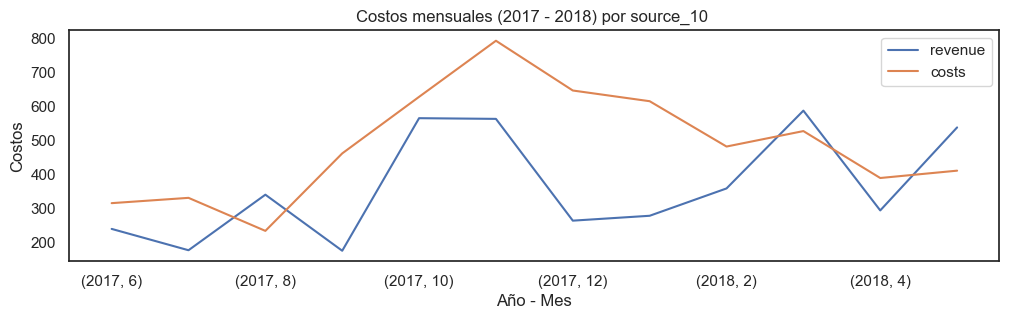

In [670]:
# Gráfico revenue mensual vs costos mensuales

revenue_mes_source_10 = orders_source_10.groupby(
    ['year_order', 'month_order']).agg({'revenue': 'sum'}).reset_index()

costs_mes_source_10 = costs_source_10.groupby(
    ['year_cost', 'month_cost']).agg({'costs': 'sum'}).reset_index()

revenue_costs_mes_source_10 = revenue_mes_source_10.merge(costs_mes_source_10, left_on=[
                                                        'year_order', 'month_order'], right_on=['year_cost', 'month_cost'], how='inner')

revenue_costs_mes_source_10 = revenue_costs_mes_source_10.drop(columns=['year_cost','month_cost'])

revenue_costs_mes_source_10.columns = ['year', 'month', 'revenue', 'costs']

print(revenue_costs_mes_source_10)

grafica_revenue_costs_mes_source_10 = revenue_costs_mes_source_10.groupby(
    ['year', 'month']).agg({'revenue': 'sum', 'costs': 'sum'})

grafica_revenue_costs_mes_source_10.plot(kind='line', figsize=(12, 3))

plt.xlabel('Año - Mes')

plt.ylabel('Costos')

plt.title('Costos mensuales (2017 - 2018) por source_10 ')

##### **LVT**

In [671]:
# Nuevos clientes para cada mes

nuevos_clientes_10 = orders_source_10.groupby(
    'first_order_month').agg({'uid': 'nunique'}).reset_index()

nuevos_clientes_10.columns = ['first_order_month','n_buyers']

print(nuevos_clientes_10.head())

  first_order_month  n_buyers
0        2017-06-01        99
1        2017-07-01        49
2        2017-08-01        40
3        2017-09-01        76
4        2017-10-01       201


In [672]:
# Agrupar primera compra, mes de compra y revenue del mes

cohorts_10 = orders_source_10.groupby(['first_order_month', 'order_month']).agg({
    'revenue': 'sum'}).reset_index()

cohorts_10.head()

first_order_month order_month  revenue
0        2017-06-01  2017-06-01   238.38
1        2017-06-01  2017-07-01    26.89
2        2017-06-01  2017-11-01     0.18
3        2017-06-01  2018-02-01     3.67
4        2017-06-01  2018-05-01     4.65

In [673]:
# Reporte de cohort

reporte_10 = pd.merge(nuevos_clientes_10, cohorts_10, on='first_order_month')

reporte_10.head()

first_order_month  n_buyers order_month  revenue
0        2017-06-01        99  2017-06-01   238.38
1        2017-06-01        99  2017-07-01    26.89
2        2017-06-01        99  2017-11-01     0.18
3        2017-06-01        99  2018-02-01     3.67
4        2017-06-01        99  2018-05-01     4.65

In [674]:
# Determinar la edad del cohorte

reporte_10['age'] = (reporte_10['order_month'].dt.to_period(
    'M') - reporte_10['first_order_month'].dt.to_period('M'))

reporte_10['age'] = reporte_10['age'].apply(lambda x: x.n)

reporte_10['age'] = reporte_10['age'].astype('int')

reporte_10.head(5)

print(reporte_10.head())
print()
print(reporte_10['age'].unique())

  first_order_month  n_buyers order_month  revenue  age
0        2017-06-01        99  2017-06-01   238.38    0
1        2017-06-01        99  2017-07-01    26.89    1
2        2017-06-01        99  2017-11-01     0.18    5
3        2017-06-01        99  2018-02-01     3.67    8
4        2017-06-01        99  2018-05-01     4.65   11

[ 0  1  5  8 11  7  2  6  3  4]


**IMPORTANTE:** En la información proporcionada no se indica el margen de cada orden, se considera el 'revenue' como el ingreso bruto.

In [675]:
# Calcular LTV

reporte_10['ltv'] = reporte_10['revenue'] / reporte_10['n_buyers']

print('LTV por mes y tiempo de vida:')

print()

print(reporte_10.head())

LTV por mes y tiempo de vida:

  first_order_month  n_buyers order_month  revenue  age       ltv
0        2017-06-01        99  2017-06-01   238.38    0  2.407879
1        2017-06-01        99  2017-07-01    26.89    1  0.271616
2        2017-06-01        99  2017-11-01     0.18    5  0.001818
3        2017-06-01        99  2018-02-01     3.67    8  0.037071
4        2017-06-01        99  2018-05-01     4.65   11  0.046970


In [676]:
# Tabla dinámica

pivot_ltv_10 = reporte_10.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='mean').round()

pivot_ltv_10 = pivot_ltv_10.fillna('')

print(pivot_ltv_10)

age                 0    1    2    3    4    5    6    7    8    11
first_order_month                                                  
2017-06-01         2.0  0.0                 0.0            0.0  0.0
2017-07-01         3.0                                0.0          
2017-08-01         8.0  0.0  0.0                                   
2017-09-01         2.0       0.0                 0.0               
2017-10-01         3.0  0.0       0.0  0.0                         
2017-11-01         5.0  0.0  0.0  0.0  0.0  0.0  0.0               
2017-12-01         4.0  0.0  0.0       0.0                         
2018-01-01         3.0  0.0  0.0  0.0                              
2018-02-01         2.0  0.0                                        
2018-03-01         3.0  0.0                                        
2018-04-01         3.0  0.0                                        
2018-05-01         4.0                                             


In [677]:
# LTV por cohorte de primer_order_month

ltv_cohorte_10 = reporte_10.groupby(['first_order_month', 'age']).agg({
    'ltv': 'mean'}).reset_index()

ltv_mean_cohorte_10 = ltv_cohorte_10.groupby('first_order_month').agg({'ltv':'sum'}).round()

ltv_mean_cohorte_10.columns = ['ltv_prom_usuario']

print(ltv_mean_cohorte_10)

                   ltv_prom_usuario
first_order_month                  
2017-06-01                      3.0
2017-07-01                      3.0
2017-08-01                      9.0
2017-09-01                      2.0
2017-10-01                      3.0
2017-11-01                      5.0
2017-12-01                      4.0
2018-01-01                      3.0
2018-02-01                      2.0
2018-03-01                      3.0
2018-04-01                      3.0
2018-05-01                      4.0


##### **CAC**

In [678]:
# Costos por mes

costs_mes_10 = costs_source_10.groupby(
    'first_day_cost').agg({'costs': 'sum'}).reset_index()

# Calcular los n_buyers del mes de la cohorte

n_buyers_mes_cohorte_10 = reporte_10.groupby('first_order_month').agg({'n_buyers':'sum'}).reset_index()

# Unir costos del mes y n_buyers

cac_data_10 = costs_mes_10.merge(
    n_buyers_mes_cohorte_10, left_on='first_day_cost', right_on='first_order_month')

cac_data_10['cac'] = cac_data_10['costs'] / cac_data_10['n_buyers']

print(cac_data_10)

   first_day_cost   costs first_order_month  n_buyers       cac
0      2017-06-01  314.22        2017-06-01       495  0.634788
1      2017-07-01  329.82        2017-07-01        98  3.365510
2      2017-08-01  232.57        2017-08-01       120  1.938083
3      2017-09-01  460.67        2017-09-01       228  2.020482
4      2017-10-01  627.24        2017-10-01       804  0.780149
5      2017-11-01  792.36        2017-11-01       833  0.951212
6      2017-12-01  645.86        2017-12-01       284  2.274155
7      2018-01-01  614.35        2018-01-01       348  1.765374
8      2018-02-01  480.88        2018-02-01       252  1.908254
9      2018-03-01  526.41        2018-03-01       334  1.576078
10     2018-04-01  388.25        2018-04-01       218  1.780963
11     2018-05-01  409.86        2018-05-01       120  3.415500


##### **LTV & CAC por ususario**

In [679]:
# LTV & CAC

cac_ltv_10 = pd.merge(
    ltv_mean_cohorte_10, cac_data_10[['first_order_month', 'cac']], on='first_order_month', how='left')

print('LTV & CAC por cohorte:')

print()

print(cac_ltv_10)

LTV & CAC por cohorte:

   first_order_month  ltv_prom_usuario       cac
0         2017-06-01               3.0  0.634788
1         2017-07-01               3.0  3.365510
2         2017-08-01               9.0  1.938083
3         2017-09-01               2.0  2.020482
4         2017-10-01               3.0  0.780149
5         2017-11-01               5.0  0.951212
6         2017-12-01               4.0  2.274155
7         2018-01-01               3.0  1.765374
8         2018-02-01               2.0  1.908254
9         2018-03-01               3.0  1.576078
10        2018-04-01               3.0  1.780963
11        2018-05-01               4.0  3.415500


##### **ROMI**

In [680]:
# Calcular los costos por mes

reporte2_10 = reporte_10.merge(
    costs_mes_10, left_on='first_order_month', right_on='first_day_cost')

reporte2_10['cac'] = reporte2_10['costs'] / reporte2_10['n_buyers']

print(reporte2_10.head())

  first_order_month  n_buyers order_month  revenue  age       ltv  \
0        2017-06-01        99  2017-06-01   238.38    0  2.407879   
1        2017-06-01        99  2017-07-01    26.89    1  0.271616   
2        2017-06-01        99  2017-11-01     0.18    5  0.001818   
3        2017-06-01        99  2018-02-01     3.67    8  0.037071   
4        2017-06-01        99  2018-05-01     4.65   11  0.046970   

  first_day_cost   costs       cac  
0     2017-06-01  314.22  3.173939  
1     2017-06-01  314.22  3.173939  
2     2017-06-01  314.22  3.173939  
3     2017-06-01  314.22  3.173939  
4     2017-06-01  314.22  3.173939  


In [681]:
# Calcular ROMI

reporte2_10['romi'] = reporte2_10['ltv'] / reporte2_10['cac']

romi_output_10 = reporte2_10.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')

romi_output_10 = romi_output_10.cumsum(axis=1).round(2)

romi_output_10 = romi_output_10.fillna('')

print('ROMI mensual por cohorte:')

print()

print(romi_output_10)

ROMI mensual por cohorte:

age                  0     1     2     3     4     5     6     7     8     11
first_order_month                                                            
2017-06-01         0.76  0.84                    0.84              0.86  0.87
2017-07-01         0.45                                      0.49            
2017-08-01         1.46  1.52  1.55                                          
2017-09-01         0.35        0.35                    0.36                  
2017-10-01         0.89  0.89         0.9  0.93                              
2017-11-01         0.70  0.71  0.71  0.73  0.73  0.73  0.74                  
2017-12-01         0.40   0.4  0.41        0.41                              
2018-01-01         0.44  0.45  0.45  0.45                                    
2018-02-01         0.62  0.65                                                
2018-03-01         1.08  1.08                                                
2018-04-01         0.74  0.79        

In [682]:
# Recuperación de inversión por cohorte (promedio)

romi_output2_10 = reporte2_10.pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean')

romi_output2_10 = romi_output2_10.cumsum(axis=1).round(2)

romi_output2_10 = romi_output2_10.cumsum(axis=1).mean(axis=0)

print('Mes de recuperación de inversión:')

print(romi_output2_10)

Mes de recuperación de inversión:
age
0     0.761667
1     1.602222
2     1.980000
3     2.440000
4     2.936667
5     3.375000
6     3.055000
7     0.940000
8     3.300000
11    4.170000
dtype: float64


### **Conclusiones dataset: costs & Economía unitaria**

**Costos totales: $329,131.62**

Promedio de costos mensuales: $27,427.64

77% de los costos provienen de las ‘source_id: 3, 4, 5’

Los costos pico mas altos se presentaron en noviembre y diciembre de 2017, que hace sentido con los meses de alta demanda de cierre de año.

Mes a mes durante todo el año el costo mas alto lo presentó la ‘source_id: 3’.

**Economía unitaria:**

* Revenue total: $ 252,057.2
* Costos totales: $ 329,131.62
* Total, después de costos: $ -77,074

La empresa presenta una perdida en el ejercicio, donde la inversión en marketing ha sido superior a los ingresos.

Mes a mes se presenta que los costos son superiores a los ingresos.

**LTV & CAC General**

Aún cuando los costos totales son mayores a los ingresos totales, encontramos que el LTV promedio para cada cohorte a lo largo del tiempo de vida es mayor que el CAC, excepto para para los usuarios del último mes del ciclo de vida.

El ROMI promedio para recuperar la inversión es de 1 mes.

**Economía Unitaria por ‘source_id’**
 
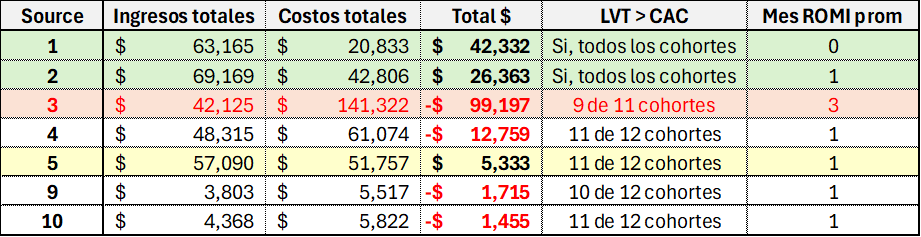


**Source:1**

Es la fuente de usuarios con mejor rendimiento, generando los mayores ingresos, mejor eficiencia de LVT y la mejor recuperación de inversión.

**Source: 2**

Es la segunda fuente con mejor rendimiento, ingresos y solo tarda un mes en promedio para recuperar la inversión.

**Source: 5**

Esta fuente genera rendimientos, sin embargo, no al mismo nivel que las dos primeras, solo 1 de sus cohortes tiene CAC mayor que LTV.

**Source: 3**

Es la fuente con peor rendimiento, aun conteniendo la mayor inversión en el periodo, los ingresos generados son cortos, sin embargo, 9 de 12 cohortes presentan LTV sobre CAC, y la recuperación de la inversión se logra hasta el mes 4 del tiempo de vida.

Prácticamente esta fuente es la que esta arrastrando la perdida total para la compañía en este ejercicio.

**Otras source_id**

Las fuentes 4, 9 y 10, aunque son las que cuentan las inversiones más pequeñas (a excepción de la 4) presentan resultados cercanos al punto de equilibrio, con recuperación de inversión al primer mes de vida y prácticamente solo 1 cohorte tuvieron el CAC mayor que el LTV.



# **Conclusiones generales**

**Objetivo:**

Crear las estrategias de optimización de los recursos de marketing basados en el análisis del comportamiento de los usuarios, los ingresos y costos históricos.

**Estrategias recomendadas:**

**1.Eficiencia de revenue:** 

Reforzar la estrategia de marketing enfocada en campañas dirigidas a usuarios de desktop, fortaleciendo la comunicación a través de las fuentes 1, 2, y 5. Estos presentan mejores indicadores de adherencia (MAU/WAU/Sticky factor/ASL). El análisis de la cohorte de usuarios que usan ‘desktop’ y provienen de las fuentes indicadas, son los que presentan los mejores indicadores (LTV/CAC/ROMI).

Los usuarios de ‘touch’ deben tener una estrategia diferenciada sobre los de ‘desktop’, basándose en el perfil del usuario, como los horarios de conexión, y las fuentes de atracción dedicadas, ya que las fuentes 1, 2 y 5, no presentan los mejores resultados para estos usuarios.

**2.Optimizar las inversiones:**  

Definir una nueva estrategia de inversiones en las fuentes de atracción de usuarios, como primer punto, se sugiere redistribuir parte de la inversión dedicada a la fuente 3, entre las fuentes 1, 2 y 5, en línea con la primera estrategia y dedicar un porcentaje de esta inversión para las fuentes dedicadas para los usuarios ‘touch’, se sugieren las fuentes 4, 9, y 10.

**3.Invertir en el consumidor:** 

Se recomienda realizar una investigación de mercado para conocer mas a fondo a los usuarios ‘touch’ para identificar su comportamiento de compras, ya que, de acuerdo a los indicadores estudiados, su comportamiento difiere del usuario de ‘desktop’ tanto en tiempos de conexión, números visita y compra. Es posible identificar factores como: percepción de las aplicaciones móviles de la empresa, seguridad, y hábitos de consumo.
